<a href="https://colab.research.google.com/github/Harshad1025/ShareBikeDemandPredictor/blob/main/Predicting_Bike_Sharing_Demand_A_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Predicting_Bike_Sharing_Demand_A_Regression_Analysis**

# **Project Summary -**



The "Bike Seoul" initiative in South Korea represents a forward-thinking approach to sustainable urban transportation, offering residents and visitors access to bike sharing services. With the goal of reducing traffic congestion and promoting eco-friendly mobility, the initiative has become integral to the city's transportation landscape. However, as the demand for bike rentals continues to rise, efficient management of bike sharing operations becomes paramount.

Our project focused on developing a machine learning model to accurately predict bike rental demand in Seoul. Leveraging historical data and relevant factors such as weather conditions, time of day, and public holidays, we employed regression analysis techniques to model bike demand patterns. The dataset, sourced from the Seoul city government's open data portal and Kaggle, provided the foundation for our analysis.

Our primary objective was to achieve a prediction accuracy of at least 85%, enabling bike sharing service providers to optimize fleet management and respond to demand fluctuations in real-time. To achieve this, we explored various regression algorithms, including linear regression, random forest, decision tree, and gradient boosting. Through rigorous hyperparameter tuning and cross-validation, we ultimately selected the XGBoost algorithm for its outstanding performance, achieving approximately 99% accuracy on the training data and 95% on the test data.

By providing insights into bike demand patterns and demonstrating the practical applications of machine learning in transportation management, our project offers a roadmap for enhancing bike sharing services not only in Seoul but also in other cities with similar initiatives. With its potential to optimize operations, reduce waste, and improve sustainability, our work contributes to the ongoing evolution of urban transportation systems worldwide.

# **GitHub Link -**

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

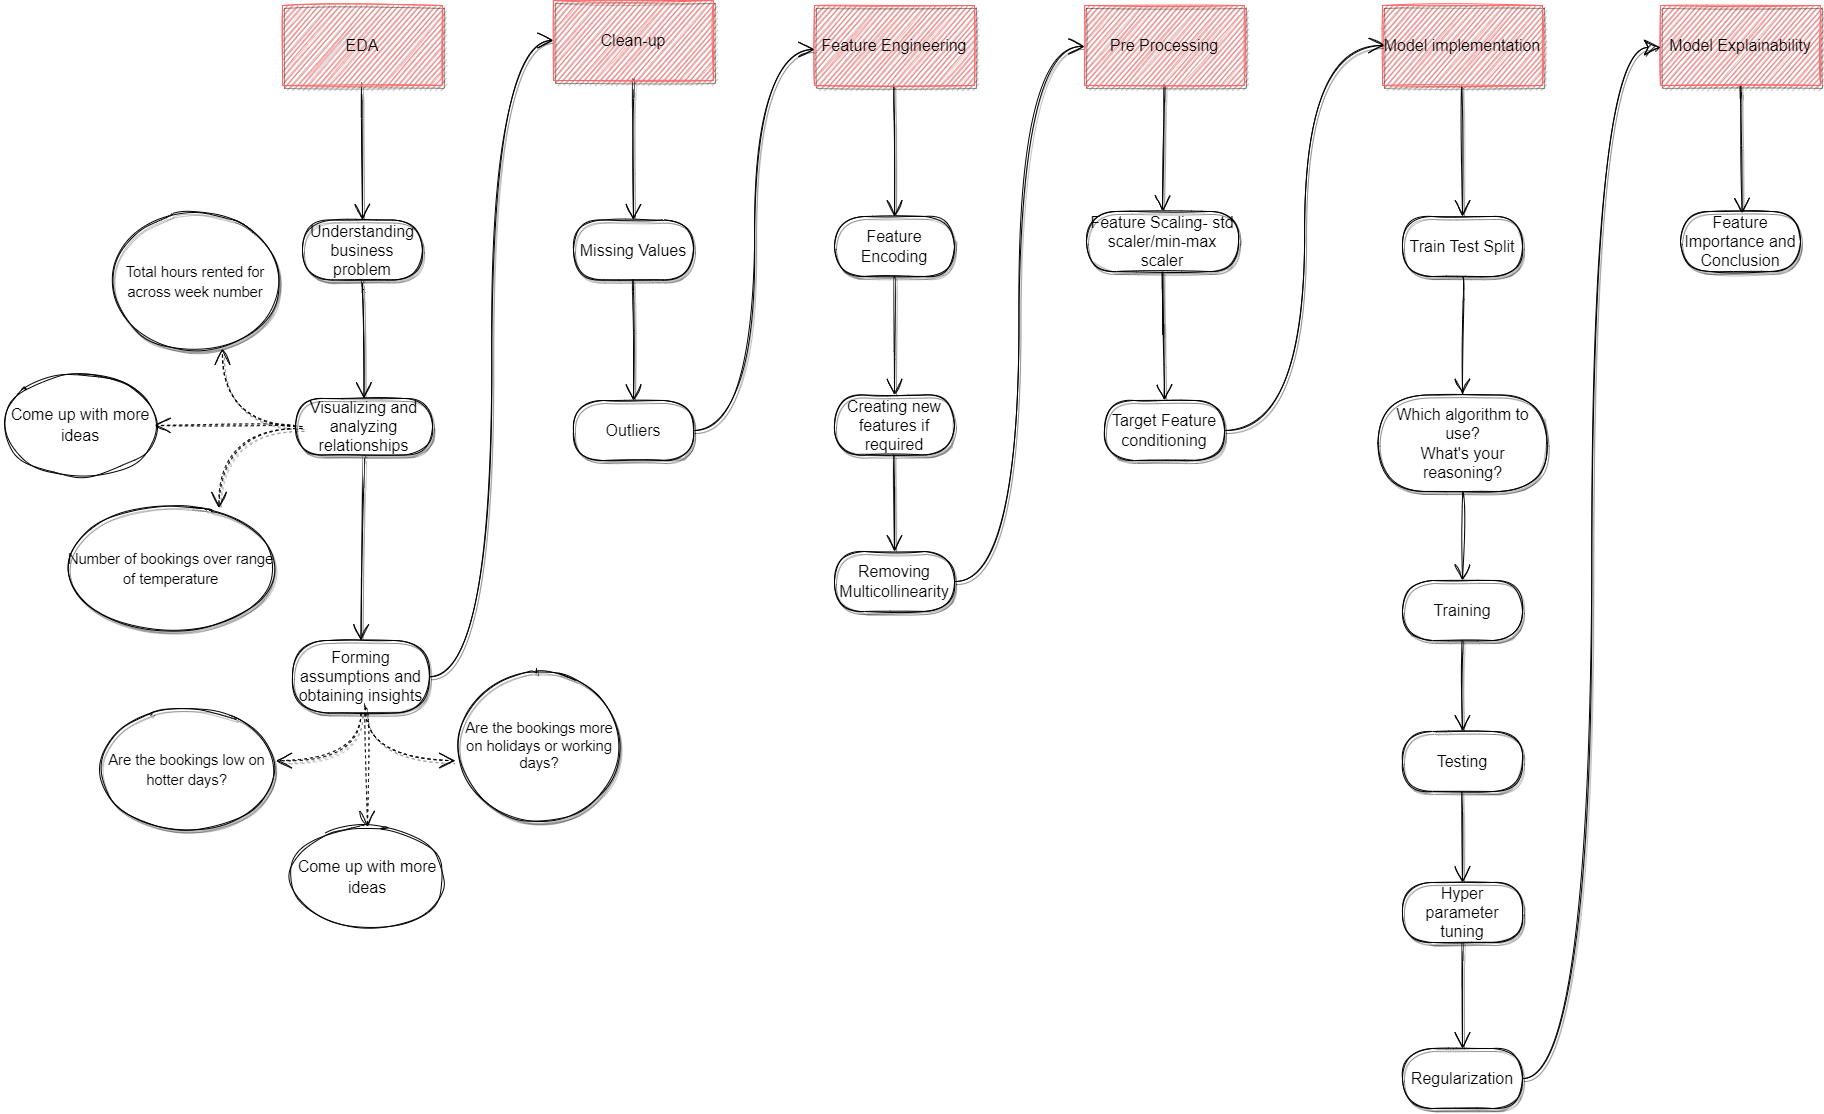

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
! pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.7 MB/s eta 0:00:00


In [1]:
# Import Libraries

# Data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Necessary imports

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import yeojohnson
from sklearn.ensemble import GradientBoostingRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'skopt'

### Dataset Loading

In [ ]:
# # Load Dataset
from google.colab import drive                #Mounting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the Seoul bike dataset from Google Drive using pd.read_csv
 #The 'encoding='latin'' parameter is used to specify the character encoding of the file, ensuring proper reading of non-English characters or special symbols
bike_df = pd.read_csv('/SeoulBikeData.csv', encoding='latin')

### Dataset First View

In [ ]:
# Top 5 rows
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Last 5 rows
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
num_rows, num_cols = bike_df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 8760
Number of columns: 14


### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

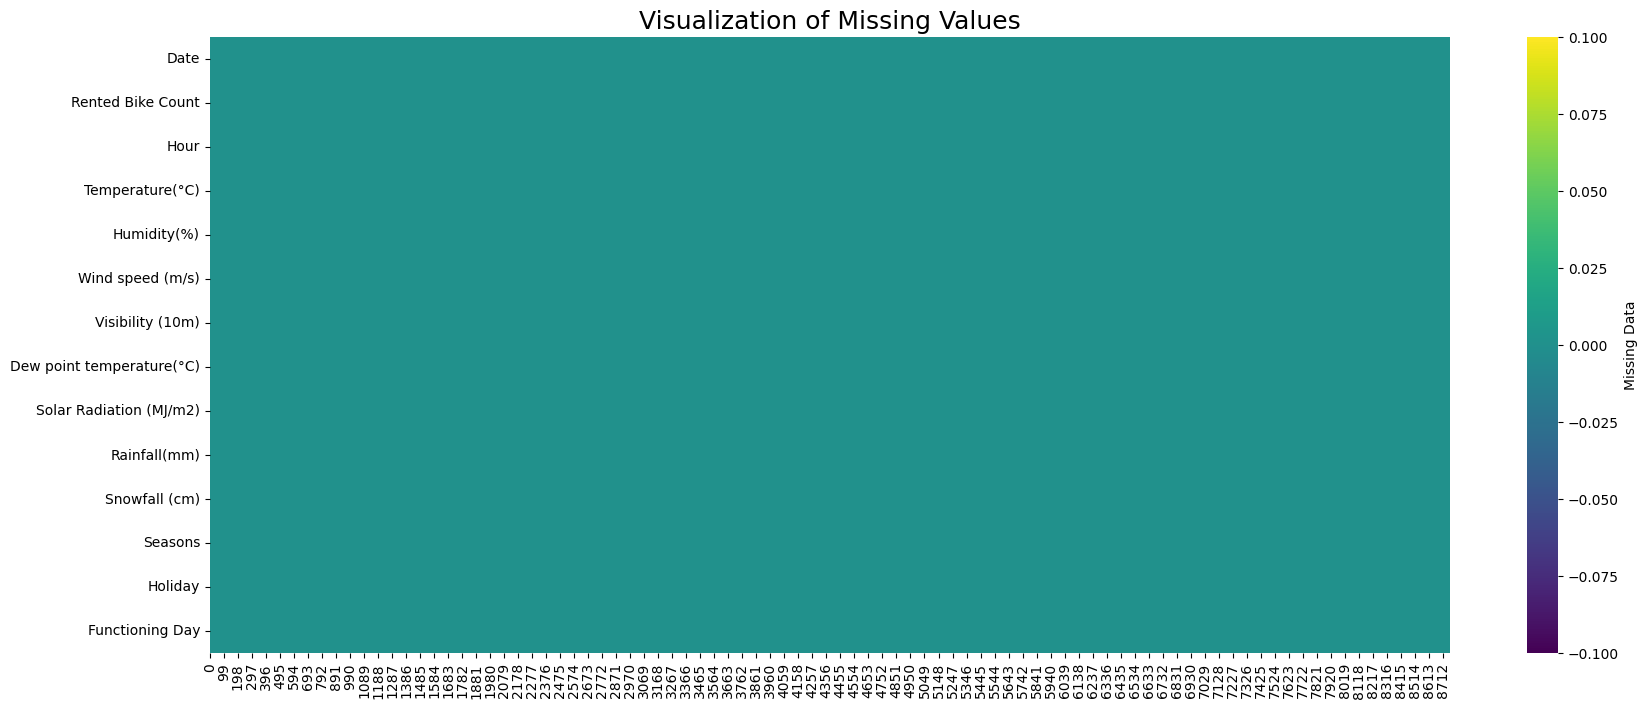

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(20,8))
sns.heatmap(bike_df.isna().transpose(), cmap="viridis", cbar_kws={'label': 'Missing Data'})
plt.title('Visualization of Missing Values', fontsize=18)
plt.show()

### What did you know about your dataset?

* There are 8760 observation and 14 features.
* In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset
* There are no null values.
* Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.
* Date has some object data types, it should be datetime data type.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
bike_df.describe(include='all').round(2)

Date  Rented Bike Count     Hour  Temperature(°C)  Humidity(%)  \
count         8760            8760.00  8760.00          8760.00      8760.00   
unique         365                NaN      NaN              NaN          NaN   
top     01/12/2017                NaN      NaN              NaN          NaN   
freq            24                NaN      NaN              NaN          NaN   
mean           NaN             704.60    11.50            12.88        58.23   
std            NaN             645.00     6.92            11.94        20.36   
min            NaN               0.00     0.00           -17.80         0.00   
25%            NaN             191.00     5.75             3.50        42.00   
50%            NaN             504.50    11.50            13.70        57.00   
75%            NaN            1065.25    17.25            22.50        74.00   
max            NaN            3556.00    23.00            39.40        98.00   

        Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count            8760.00           8760.00                    8760.00   
unique               NaN               NaN                        NaN   
top                  NaN               NaN                        NaN   
freq                 NaN               NaN                        NaN   
mean                1.72           1436.83                       4.07   
std                 1.04            608.30                      13.06   
min                 0.00             27.00                     -30.60   
25%                 0.90            940.00                      -4.70   
50%                 1.50           1698.00                       5.10   
75%                 2.30           2000.00                      14.80   
max                 7.40           2000.00                      27.20   

        Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
count                   8760.00       8760.00        8760.00    8760   
unique                      NaN           NaN            NaN       4   
top                         NaN           NaN            NaN  Spring   
freq                        NaN           NaN            NaN    2208   
mean                       0.57          0.15           0.08     NaN   
std                        0.87          1.13           0.44     NaN   
min                        0.00          0.00           0.00     NaN   
25%                        0.00          0.00           0.00     NaN   
50%                        0.01          0.00           0.00     NaN   
75%                        0.93          0.00           0.00     NaN   
max                        3.52         35.00           8.80     NaN   

           Holiday Functioning Day  
count         8760            8760  
unique           2               2  
top     No Holiday             Yes  
freq          8328            8465  
mean           NaN             NaN  
std            NaN             NaN  
min            NaN             NaN  
25%            NaN             NaN  
50%            NaN             NaN  
75%            NaN             NaN  
max            NaN             NaN

### Variables Description

####**Features Breakdown:-**

**Date:** The day's date, ranging from 01/12/2017 to 30/11/2018, formatted as DD/MM/YYYY (string). Conversion to datetime format required.

**Rented Bike Count:** Number of rented bikes per hour, our dependent variable for prediction (integer).

**Hour:** The hour of the day, ranging from 0 to 23 in digital time format (integer). Conversion to categorical data type needed.

**Temperature(°C):** Temperature in Celsius (float).

**Humidity(%):** Air humidity percentage (integer).

**Wind speed (m/s):** Wind speed in meters per second (float).

**Visibility (10m):** Visibility in meters (integer).

**Dew point temperature(°C):** Morning temperature (float).

**Solar Radiation (MJ/m2):** Sun contribution (float).

**Rainfall(mm):** Amount of rainfall in millimeters (float).

**Snowfall (cm):** Amount of snowfall in centimeters (float).

**Seasons:** Season of the year (string), limited to four seasons.

**Holiday:** Indicates if the day is a holiday period (string).

**Functioning Day:** Indicates if the day is a functioning day (string).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print(f"No. of unique values in {i} is {bike_df[i].nunique()}.")

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(°C) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 65.
No. of unique values in Visibility (10m) is 1789.
No. of unique values in Dew point temperature(°C) is 556.
No. of unique values in Solar Radiation (MJ/m2) is 345.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.


## ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Copy of the Dataset
bike_df_1 = bike_df.copy()

In [ ]:
# Some of  the columns name in the dataset are too large and clumsy so we change them into some simple name, and it don't affect our end results.
# Renaming the Columns

bike_df_1.rename(columns= {'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'}, inplace=True)

In [ ]:
bike_df_1.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

**In Python, the "Date" column is read as an object type, essentially as a string. Since the date column is crucial for analyzing user behavior, it needs to be converted into a datetime format. After this conversion, we will split it into three columns: 'year', 'month', and 'day', each as a category data type.**

In [ ]:
# converting date variable into datetime format
bike_df_1['Date'] = bike_df_1['Date'].apply(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

In [ ]:
# Split the "Date" column into three "year","month","day" columns
bike_df_1['year'] = bike_df_1['Date'].dt.year
bike_df_1['month'] = bike_df_1['Date'].dt.month
bike_df_1['day'] = bike_df_1['Date'].dt.day_name()

* **We splited the "date" column into 3 different columns: "year", "month", "day".**
* **The "year" column in our dataset contains 2 unique numbers detailing from December 2017 to November 2018. Considering this as a single year, we can drop the "year" column.**
* **The "day" column contains details about each day of the month. For our purposes, we only need to know if a day is a weekday or a weekend, so we convert it into this format and drop the "day" column.**

In [ ]:
# Creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df_1['weekdays_weekend']=bike_df_1['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )    # 0 for weekdays and 1 for weekends
bike_df_1=bike_df_1.drop(columns=['Date','day','year'], axis=1)

In [ ]:
bike_df_1.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  weekdays_weekend  
0  No Holiday             Yes     12                 0  
1  No Holiday             Yes     12                 0  
2  No Holiday             Yes     12                 0  
3  No Holiday             Yes     12                 0  
4  No Holiday             Yes     12                 0

In [ ]:
bike_df_1['weekdays_weekend'].value_counts()

weekdays_weekend
0    6264
1    2496
Name: count, dtype: int64

**As the "Hour," "month," and "weekdays_weekend" columns are currently shown as integer data types, they should actually be categorized as category data types. Failing to do so may lead to inaccurate analysis and correlations, potentially resulting in misleading conclusions.**

In [ ]:
# Change the int64 columns into category columns
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df_1[col]=bike_df_1[col].astype('category')

In [ ]:
# Check the dtypes again
bike_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [ ]:
# defining continuous independent variables separately
cont_var = ['Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature','Solar_Radiation', 'Rainfall', 'Snowfall']

In [ ]:
# defining dependent variable
dependent_variable = ['Rented_Bike_Count']

In [ ]:
# defining categorical independent variables separately
cat_var = ['Hour','Seasons', 'Holiday', 'Functioning_Day', 'month', 'weekdays_weekend']

### What all manipulations have you done and insights you found?

* Some of the columns' names in the dataset were excessively long and cumbersome, so we simplified them. This modification did not impact our final results.
* The "Date" column in the dataset was initially read as an object type in Python, essentially as a string. Recognizing the significance of the date column for analyzing user behavior, we converted it into a datetime format.
* Following this conversion, we split it into three columns: 'year', 'month', and 'day', each as a category data type.
* The "year" column in our dataset contains 2 unique numbers detailing from December 2017 to November 2018. Treating this as a single year, we dropped the "year" column.
* The "day" column contains details about each day of the month. For our purposes, we only needed to know if a day is a weekday or a weekend, so we converted it into this format and dropped the "day" column.
* The "Hour," "month," and "weekdays_weekend" columns were initially shown as integer data types. We categorized them as category data types to ensure accurate analysis and correlations, thereby avoiding potentially misleading conclusions.

# **Exploratory Data Analysis Of The Data Set**

#### Chart - 1 : Dependent variable Distribution

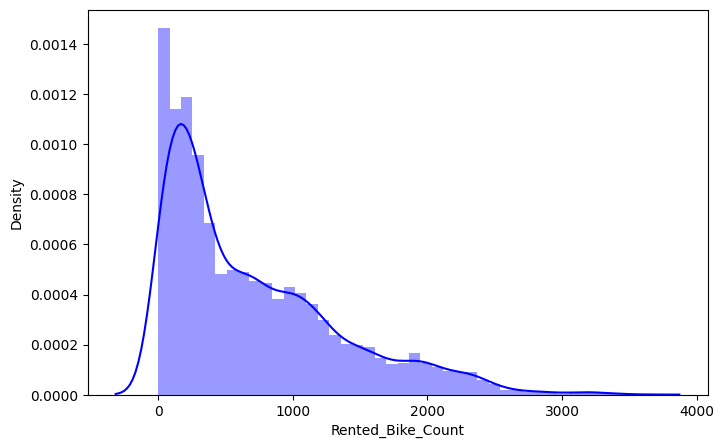

In [ ]:
# Chart-1 Visualization code for distribution of target variable
plt.figure(figsize=(8,5))
sns.distplot(bike_df_1['Rented_Bike_Count'], color='blue')
plt.show()

##### 1. Why did you pick the specific chart?

A distplot, also referred to as a histogram with a kernel density estimate (KDE) plot, is valuable as it offers a swift and straightforward method to examine data distribution, detect patterns or outliers, and compare the distribution of multiple variables. It also facilitates the assessment of whether the data adheres to a normal distribution.

Consequently, I utilized the histogram plot to analyze the distribution of variables across the entire dataset, determining symmetry.

##### 2. What is/are the insight(s) found from the chart?

Based on the distribution plot of the dependent variable "rented bike", it is evident that the distribution is positively skewed (right skewed), indicating asymmetry around the mean.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Certainly, based on this insight, it's clear that our data is not normally distributed. Therefore, prior to implementing any model on this dataset, it's essential to normalize the data.

#### Chart - 2 : Distribution V/s Box plot

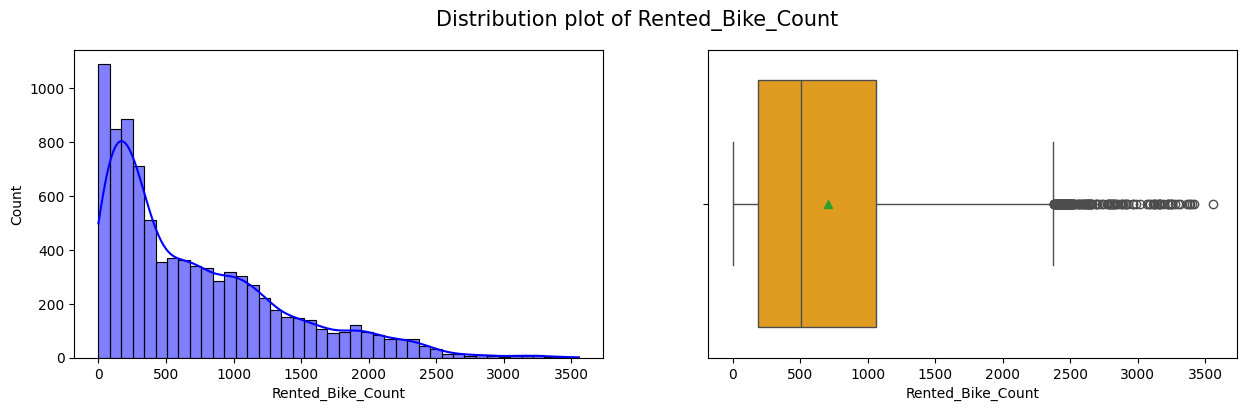

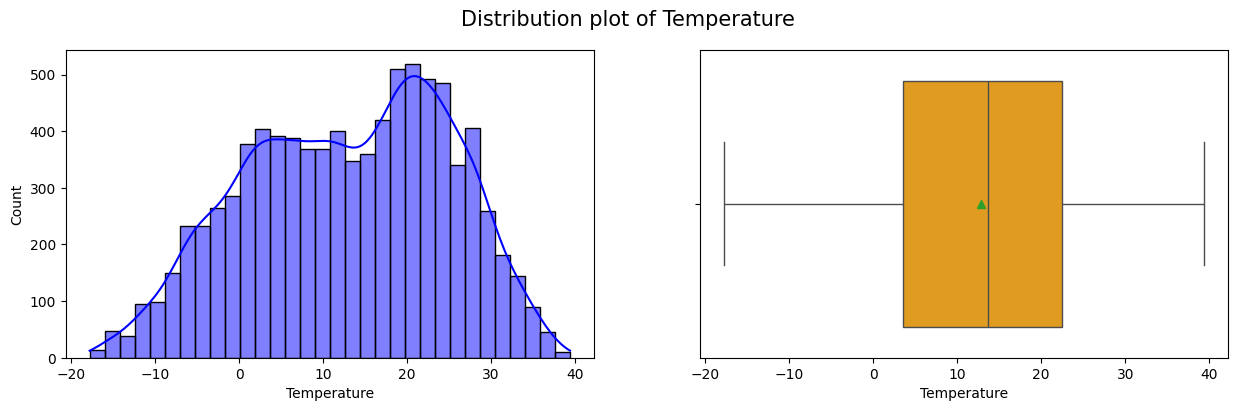

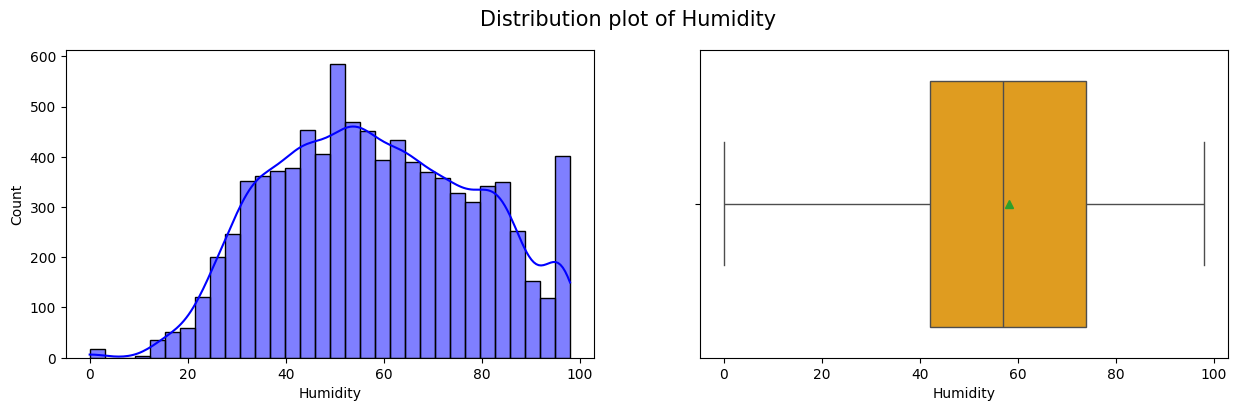

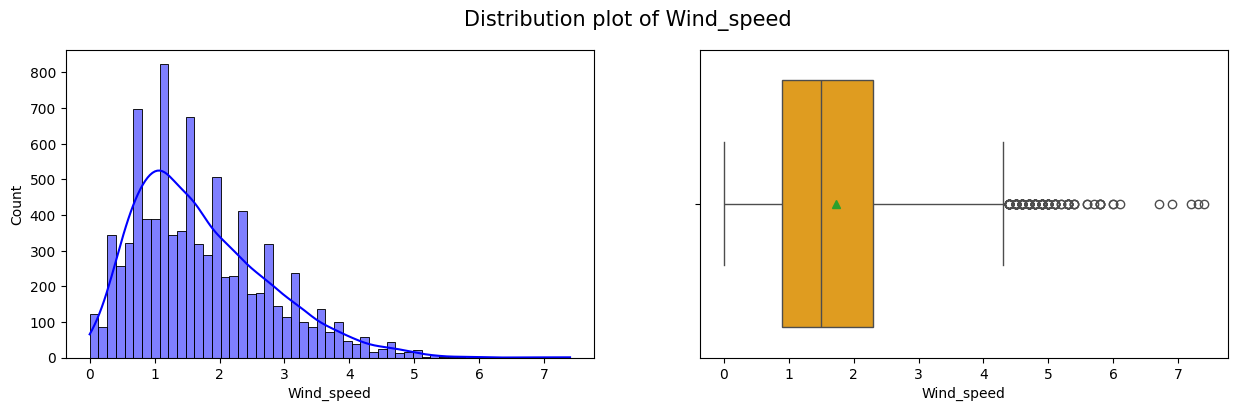

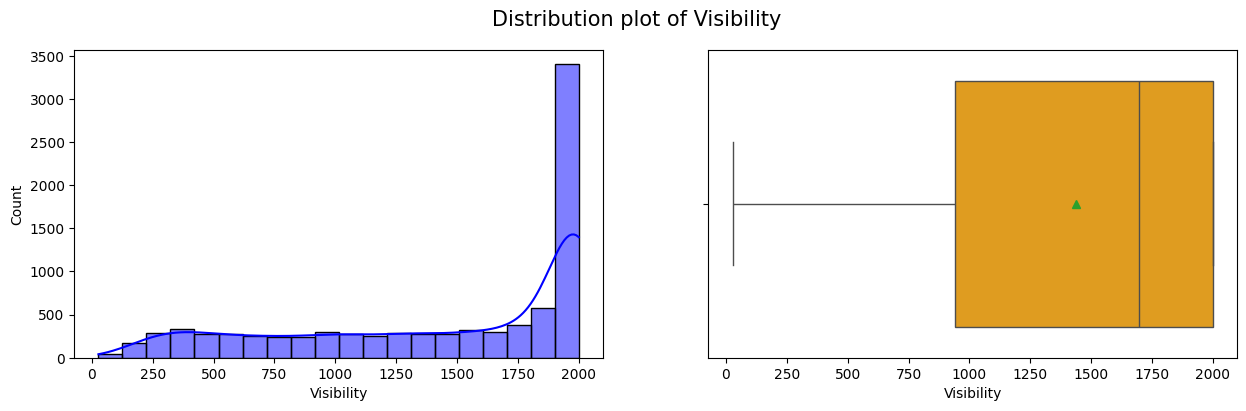

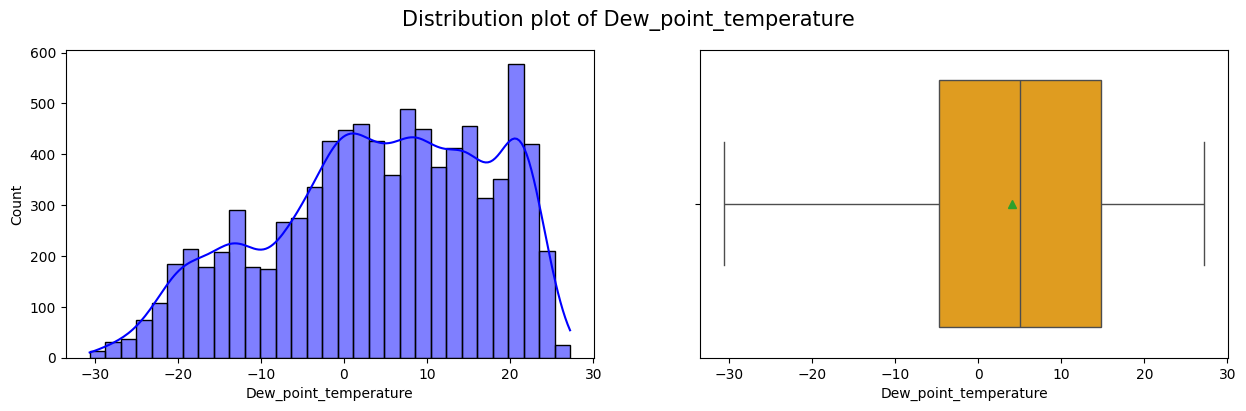

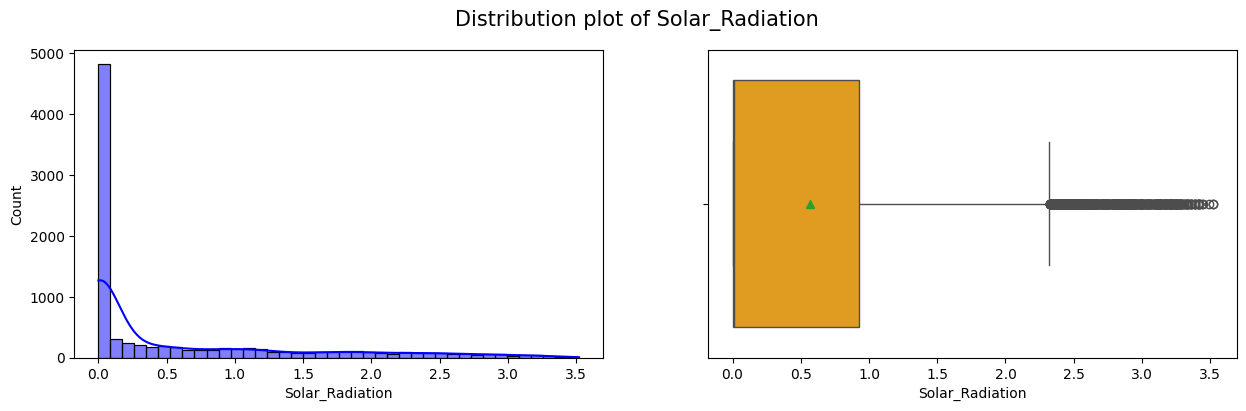

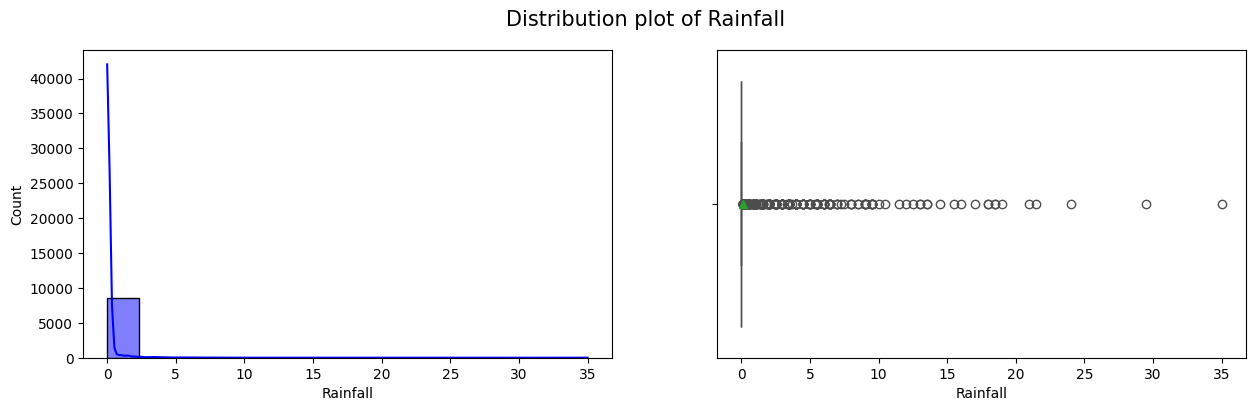

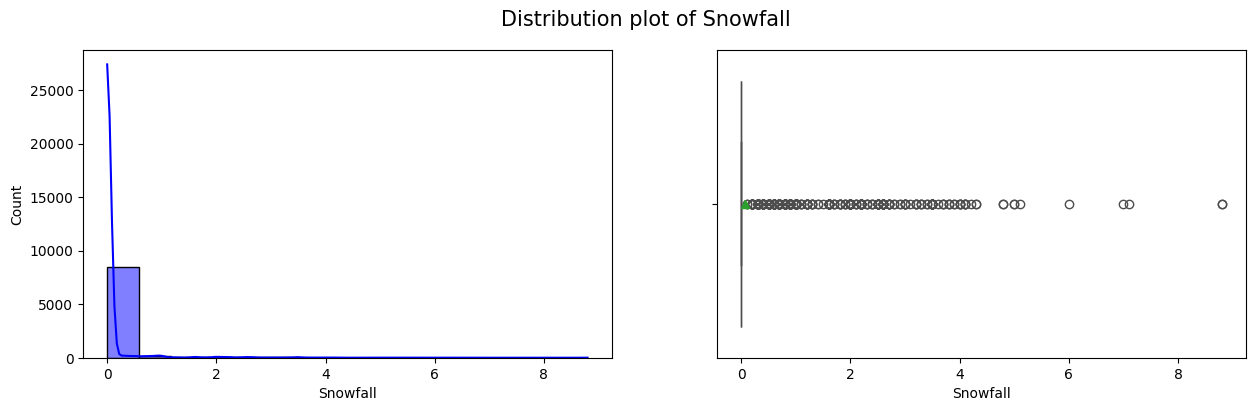

In [ ]:
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in bike_df_1.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
    sns.histplot(bike_df_1[col], ax = axes[0],kde = True, color='blue')
    sns.boxplot(bike_df_1[col], ax = axes[1],orient='h',showmeans=True,color='orange')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a chart that displays the distribution of a dataset, providing a graphical representation of how often each value or group of values occurs. It is valuable for understanding the dataset's distribution, identifying patterns or trends, and is particularly useful for large datasets (exceeding 100 observations) to detect outliers or gaps in the data.

Consequently, we utilized the histogram plot to analyze the variable distributions across the entire dataset for symmetry.

A boxplot summarizes key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. It is useful for identifying outliers, comparing multiple datasets, and understanding data dispersion, commonly employed in statistical analysis and data visualization.

Therefore, for each numerical variable in the given dataset, we used a box plot to analyze outliers and the interquartile range, encompassing mean, median, maximum, and minimum values.

##### 2. What is/are the insight(s) found from the chart?

Based on the above univariate analysis of all continuous feature variables, it is evident that only the temperature and humidity columns exhibit a normal distribution, while the others display different distributions.

Furthermore, outlier values are noticeable in the snowfall, rainfall, wind speed, and solar radiation columns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset.

#### Chart - 3 : Dependent variable with continuous variables (Bivariate)

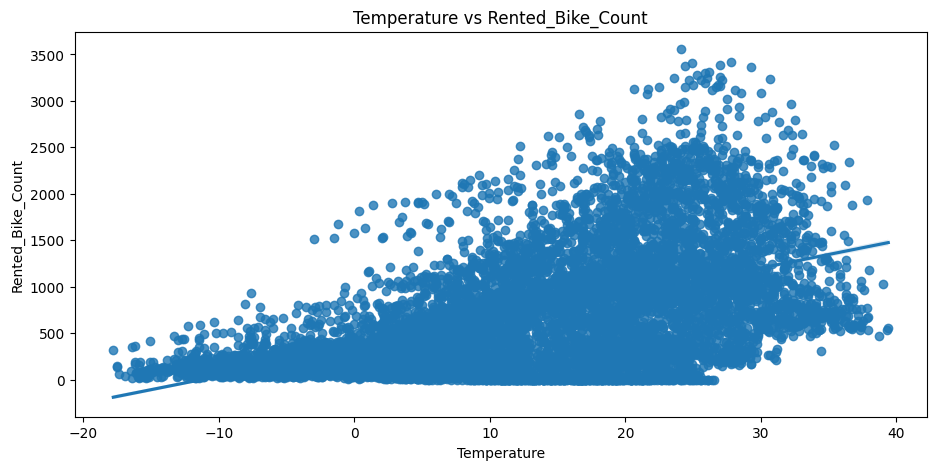

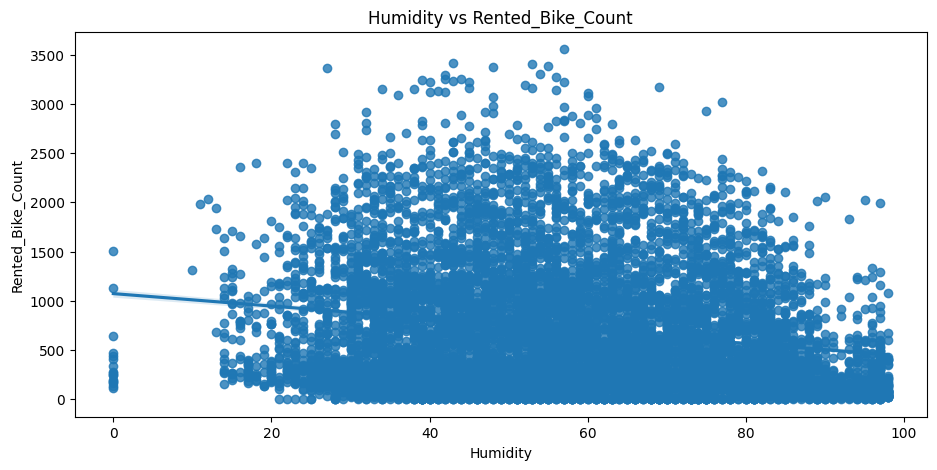

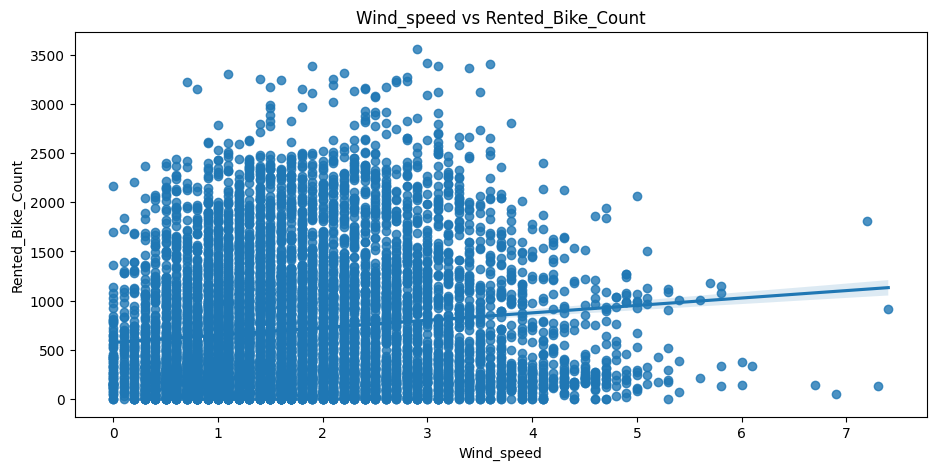

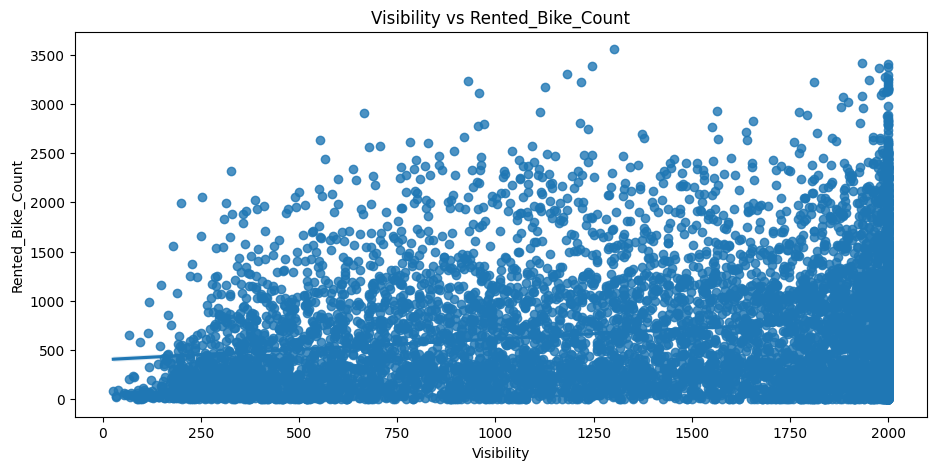

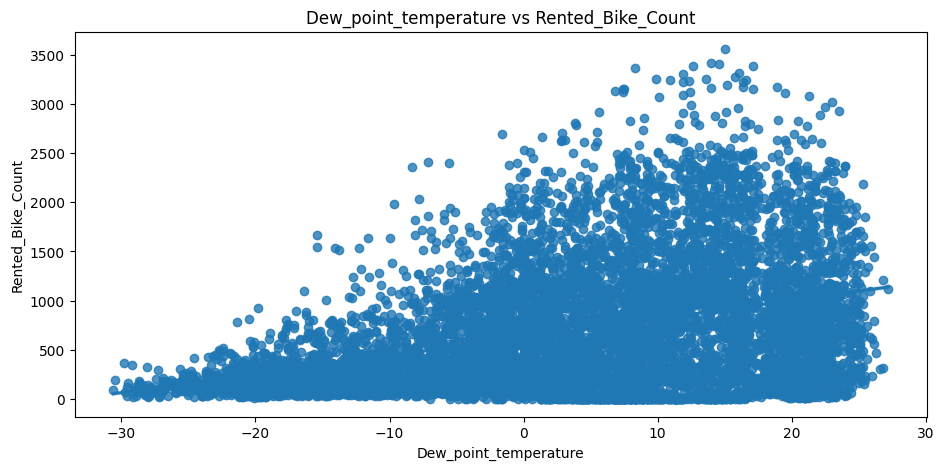

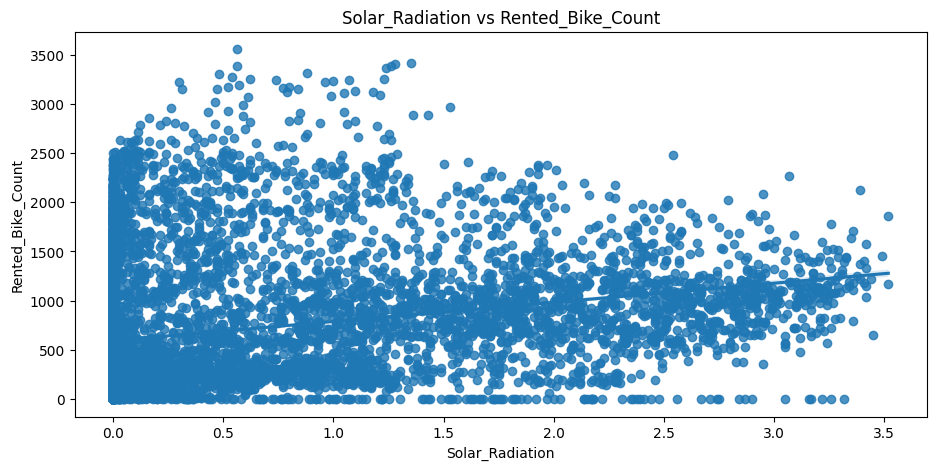

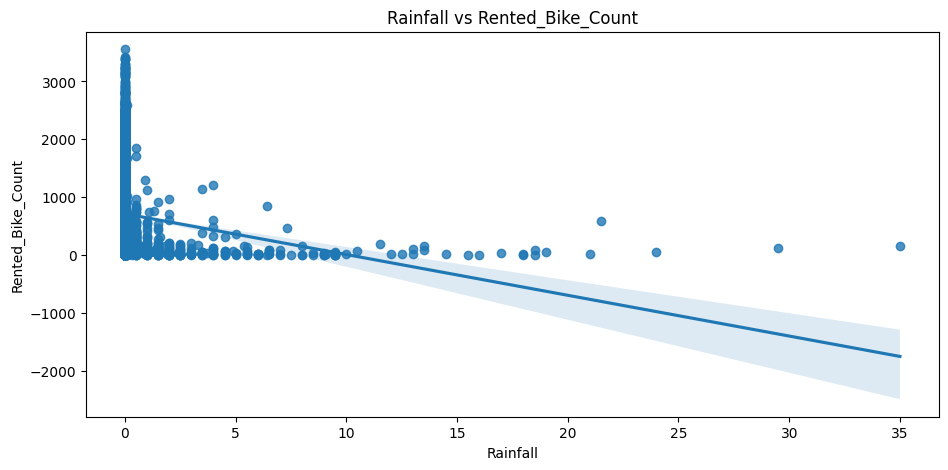

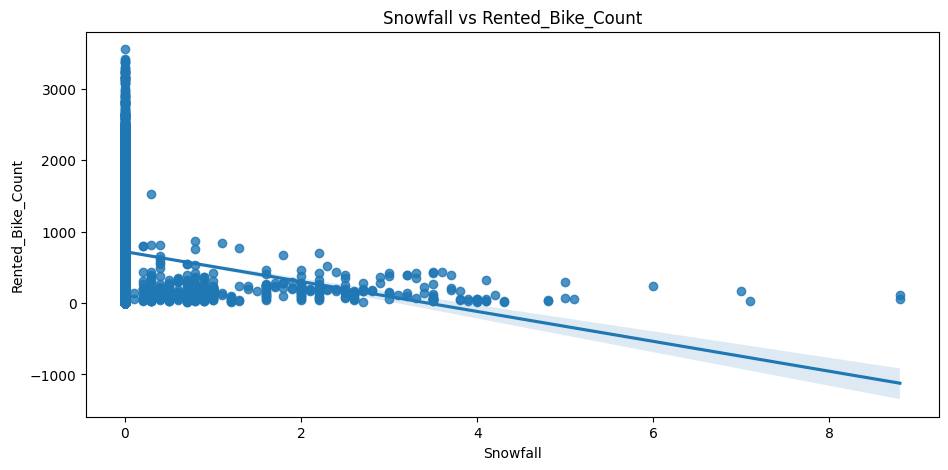

In [ ]:
# Analyzing the relationship between the dependent variable and the continuous variables
for i in cont_var:
  plt.figure(figsize=(11,5))
  sns.regplot(x=i,y=dependent_variable[0],data=bike_df_1)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

The regplot function is utilized to generate a scatter plot with a linear regression line. Its purpose is to visualize the relationship between two continuous variables, aiding in the identification of patterns and trends in the data. Additionally, it can be employed to test for linearity and independence of the variables.

We utilized this regplot to examine the patterns between the independent variable and our dependent variable, "rented bike."

##### 2. What is/are the insight(s) found from the chart?

From above regression plot we can see that there is some linearity between temperature, solar radiation & dew point temperature with dependent variable rented bike

Other variables are not showing any patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indeed, the regplot provided valuable insights, indicating that certain variables exhibit patterns with the dependent variable. These variables may be crucial features when predicting rented bike counts, warranting focused attention from the business.

#### Chart - 4 : Categorical variables with dependent variable (Bivariate)

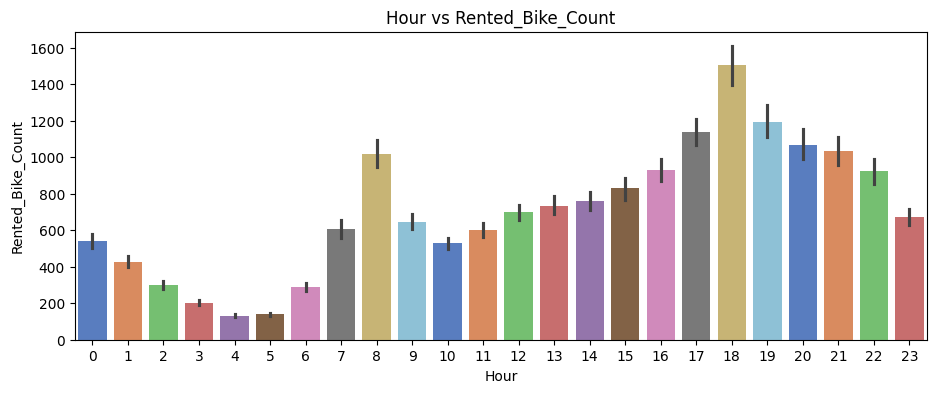

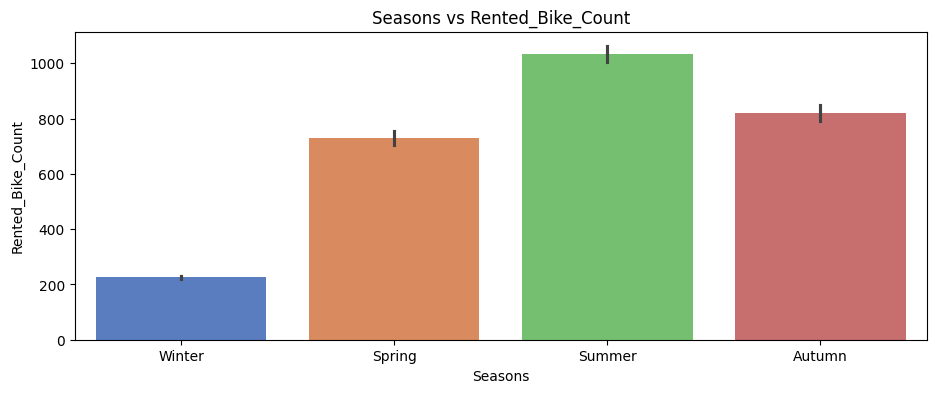

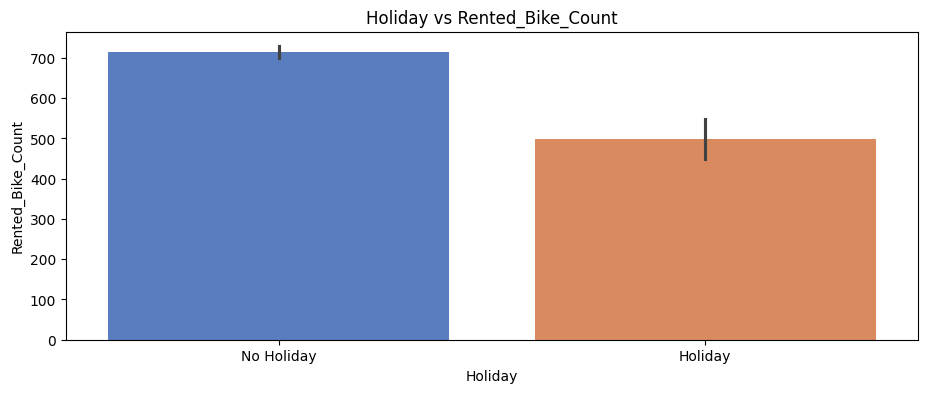

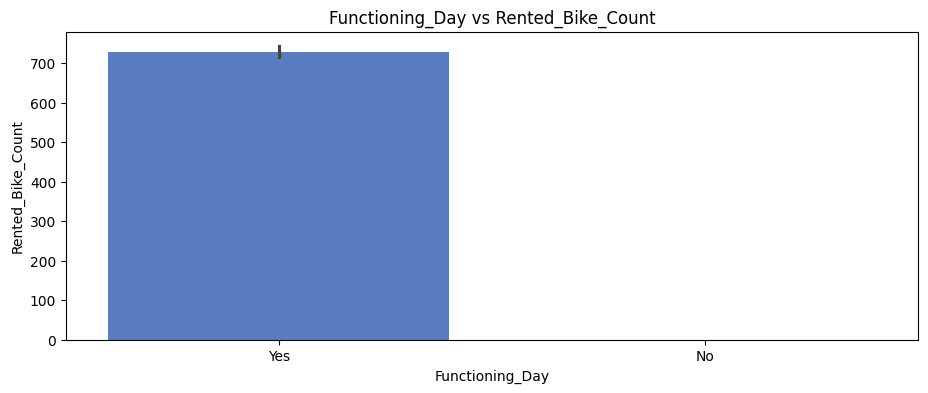

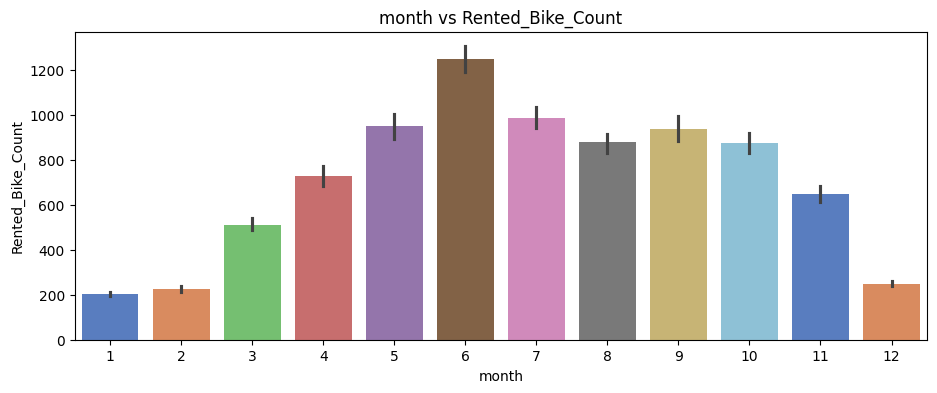

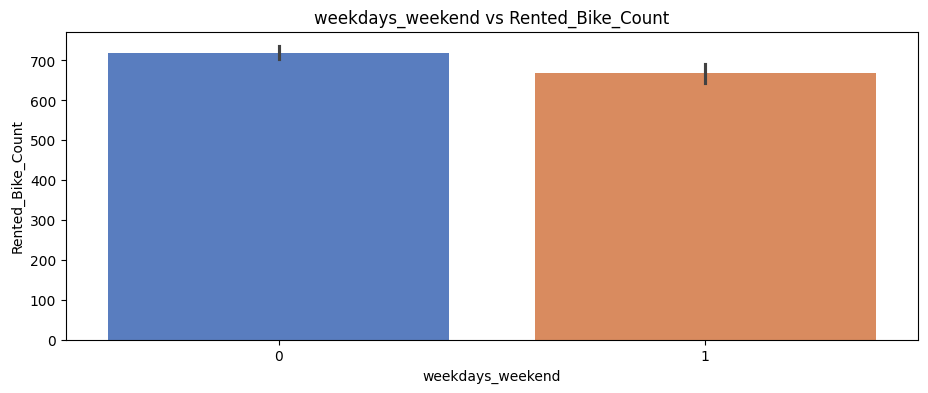

In [ ]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in cat_var:
    plt.figure(figsize=(11, 4))
    sns.barplot(x=i, y=bike_df_1[dependent_variable[0]], data=bike_df_1, palette="muted")
    plt.xlabel(i)
    plt.ylabel(dependent_variable[0])
    plt.title(i + ' vs ' + dependent_variable[0])
    plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are employed to compare the size or frequency of different categories or groups of data. They are valuable for comparing data across various categories and can effectively display a large amount of data in a small space.

We utilized bar charts to illustrate the distribution of rented bike counts with other categorical variables.

##### 2. What is/are the insight(s) found from the chart?

From above bar charts we got insights:

1. In hour vs rented bike chart there is high demand in the morning 8'o clock and evening 18'o clock
2. From season vs rented bike chart there is more demand in summer and less demand in winter.
3. There is high demand on working days.
4. From month chart we know that there is high demand in month of june.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, these insights are likely to have a positive impact on the business. By analyzing demand based on categorical variables, we can discern when bike demand is highest, allowing us to focus more resources on those specific periods.

#### Chart - 5 : Rented Bike vs Hour

Text(0.5, 1.0, 'Average bike rented per hour')

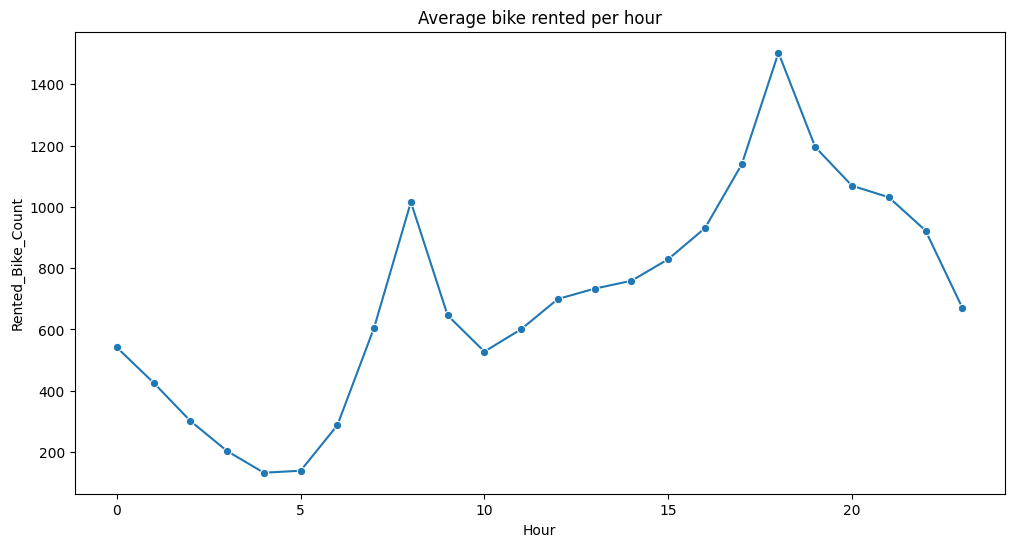

In [ ]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bike_df_1.groupby('Hour')['Rented_Bike_Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_rent_hrs, marker='o')
plt.title('Average bike rented per hour')
# a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
# a.set_xticks(range(len(avg_rent_hrs)))
# a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

##### 1. Why did you pick the specific chart?

A line plot, also referred to as a line chart or line graph, is a method to visualize the trend of a single variable over time. It connects a series of data points with a line to illustrate how the value of the variable changes over time.

Line plots are valuable as they swiftly and clearly display trends and patterns in the data, particularly showcasing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

We employed a line plot to observe the distribution of rented bike demand over a 24-hour period.

##### 2. What is/are the insight(s) found from the chart?

From above line plot we can clearly see that there is high demand in the morning and in the evening.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, the insight gleaned indicates a high demand in the morning and evening, suggesting that the business should prioritize and focus on meeting the demand during these specific time slots.

#### Chart - 6 : Bike demand throughout the day (Multivariate)

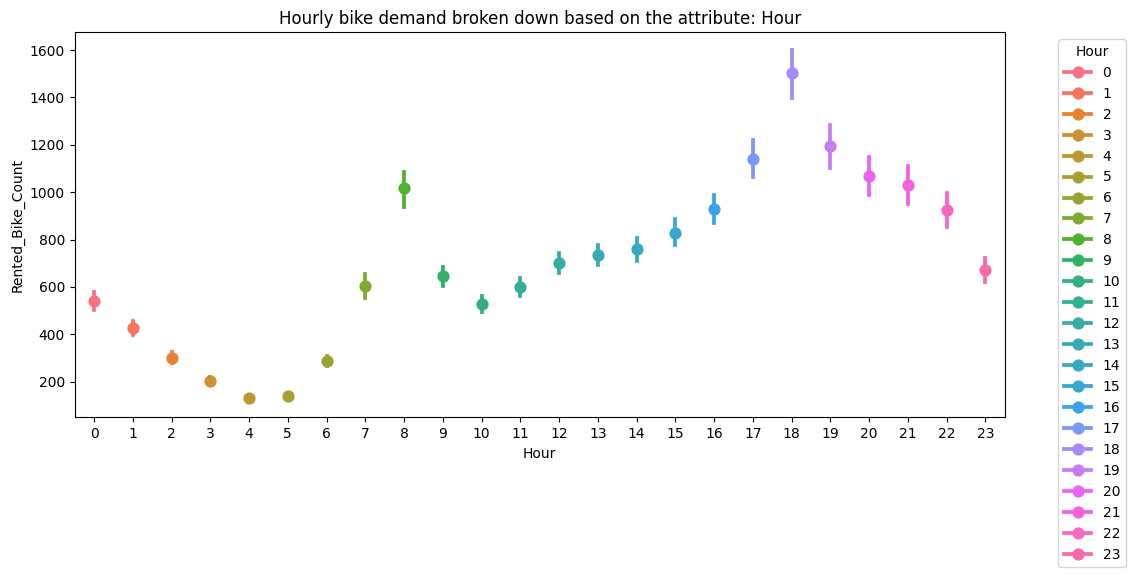

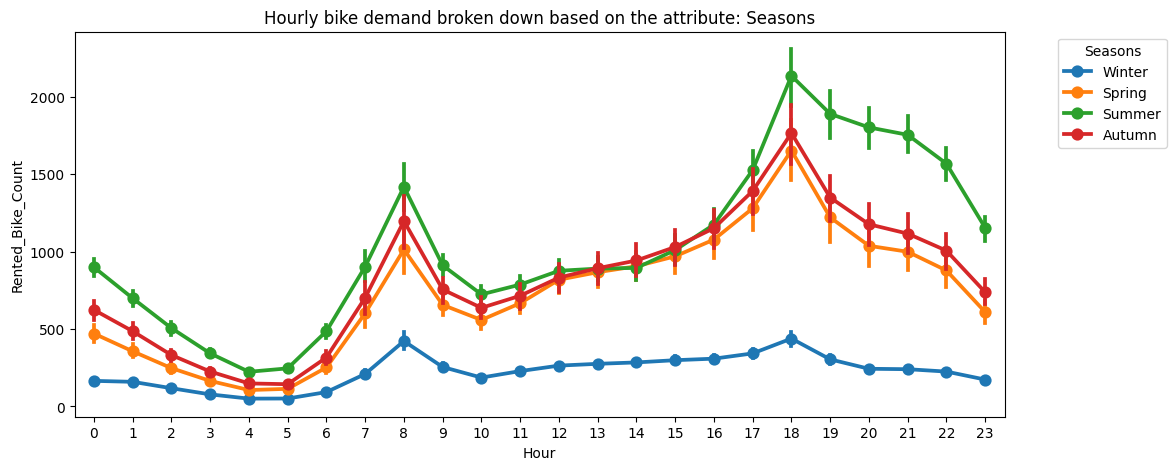

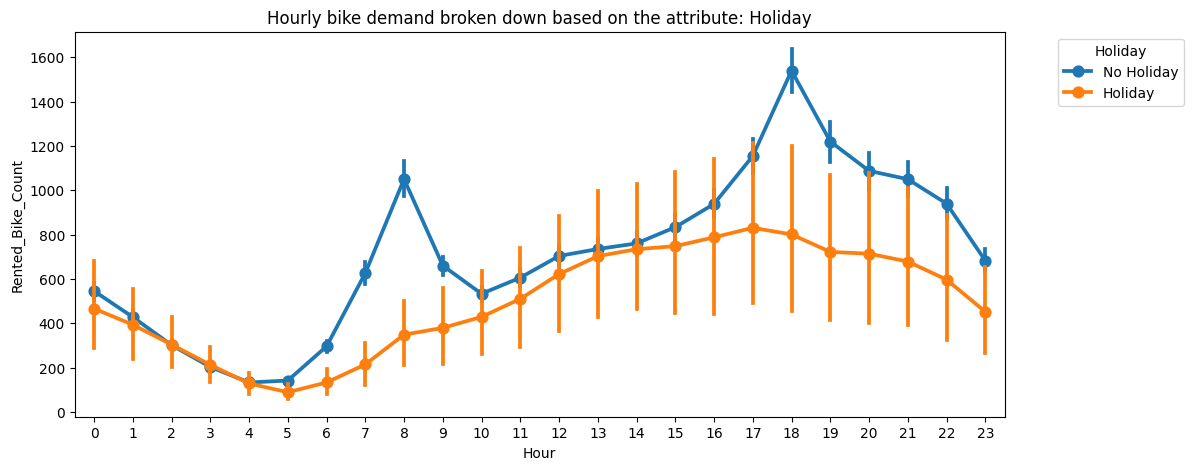

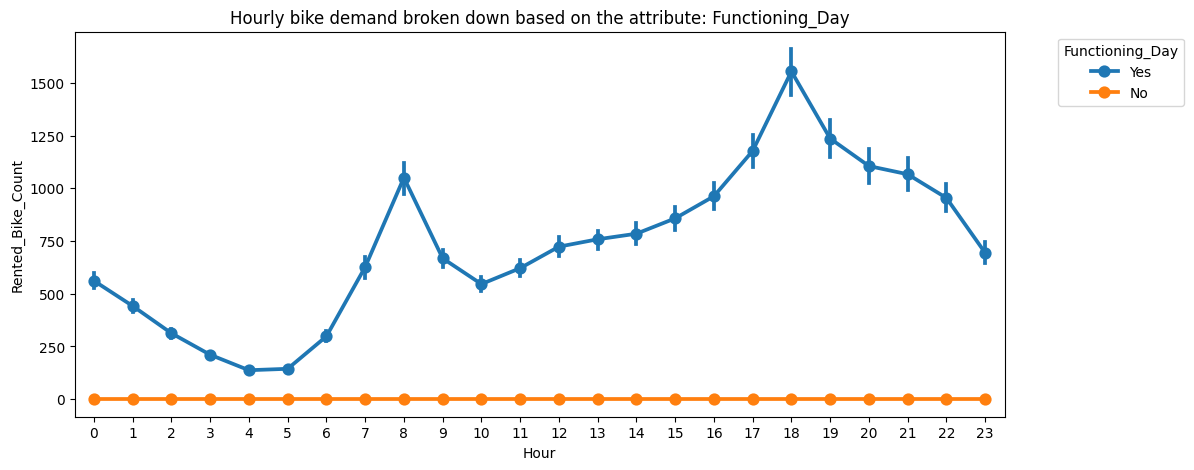

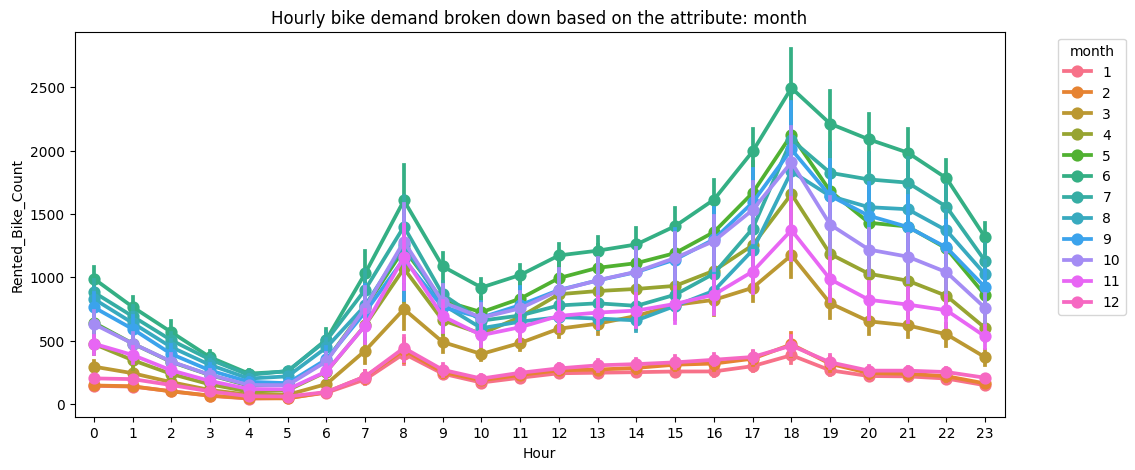

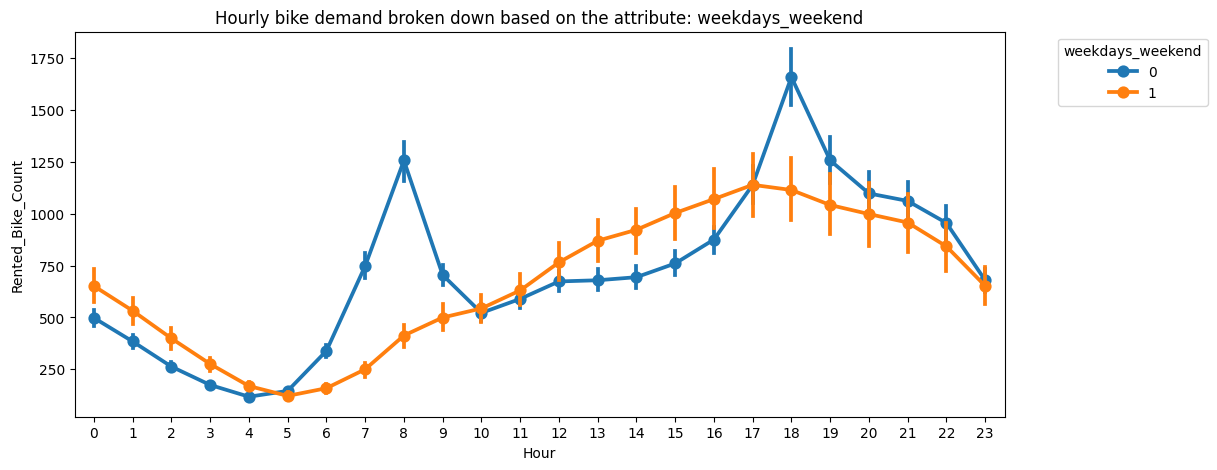

In [ ]:
# Chart - 6 visualization code
for i in cat_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(12,5))
    sns.pointplot(data=bike_df_1, x='Hour', y='Rented_Bike_Count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

##### 1. Why did you pick the specific chart?

A line plot, also referred to as a line chart or line graph, is a method to visualize the trend of a single variable over time, connecting a series of data points with a line to illustrate changes over time.

Line plots are valuable for swiftly and clearly displaying trends and patterns in the data, particularly showcasing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

We utilized a line plot, drawing multiple lines on charts, to illustrate the demand for rented bikes throughout the day based on other categorical variables.

##### 2. What is/are the insight(s) found from the chart?

From above line plots we see that :

1. In winter season there is no significant demand even in the morning or in the evening.
2. On the functional day (i.e No Holiday) there is spike in morning and in evening, but that is not there on Holidays.
3. Around 3 months in winter season (i.e December, January & February) there is low demand.
4. On weekend almost throught the day there is demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this analysis we figure out some key factors such as high demand in morning and evening slot in all the seasons.

#### Chart - 7 : Categorical plot for seasons

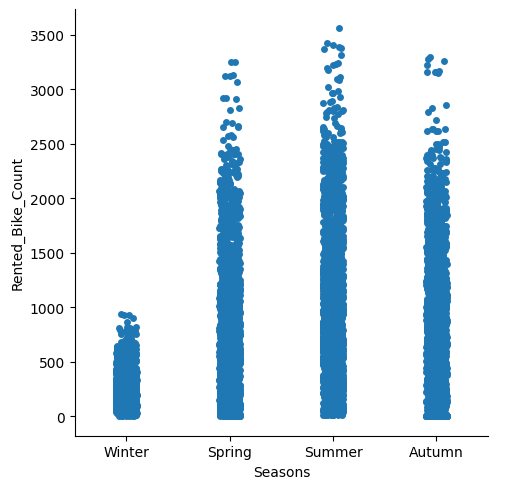

In [ ]:
#plot for rented bike count seasonly
sns.catplot(x='Seasons',y='Rented_Bike_Count',data=bike_df_1)

##### 1. Why did you pick the specific chart?

The catplot function is utilized to create a categorical plot, which is employed to visualize the distribution of a categorical variable. These plots can illustrate how a variable is related to a categorical variable and can also compare the distribution of multiple categorical variables.

We used the catplot to observe the distribution of rented bikes based on the "season" column.

##### 2. What is/are the insight(s) found from the chart?

From above catplot we got know that:

1. There is low demand in winter
2. Also in all seasons upto the 2500 bike counts distribution is seen dense.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this catplot we know that there is high bike count upto the 2500 so, above that there maybe outliers present. business needs to evaluate that.

#### Chart - 8 : Pie Chart

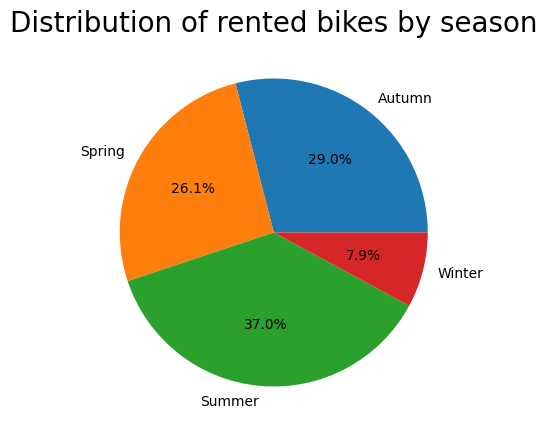

In [ ]:
# Chart - 8 visualization code

# Grouping by season and summing the rented bike count
season_counts = bike_df_1.groupby('Seasons')['Rented_Bike_Count'].sum()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%')
plt.title("Distribution of rented bikes by season", fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are commonly employed to display the proportions of a whole, particularly useful for presenting data that has been calculated as a percentage of the whole.

In this case, we utilized a pie chart to illustrate the percentage distribution of rented bikes based on different seasons.

##### 2. What is/are the insight(s) found from the chart?

From above pie chart:

1. In year data season summer contributes around 37% then autumn around 29%
2. Lowest demand in winter, it contributes around only 8%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insights only tell about percentage contribution of year data of season varible, which clearly gave indication about demand.

#### Chart - 9 : Correlation Heatmap

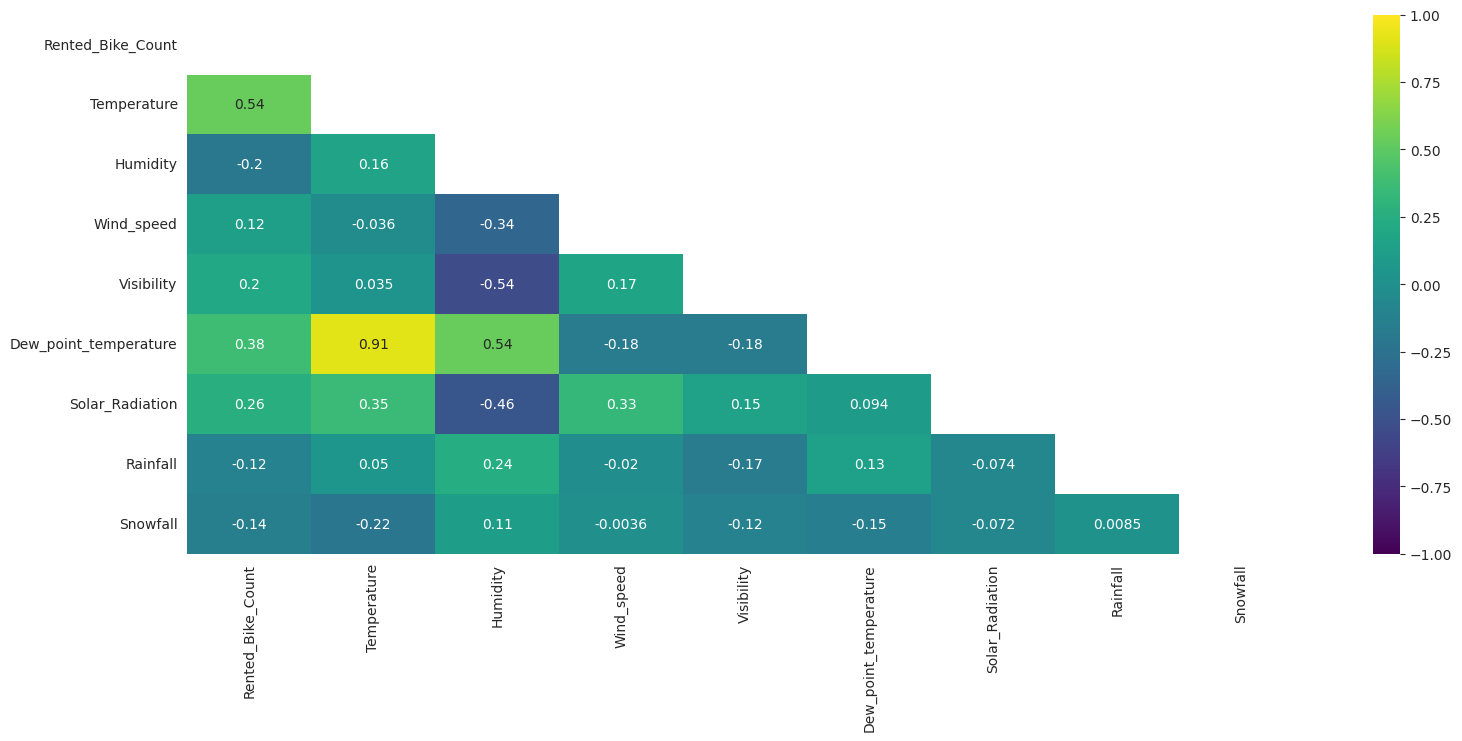

In [ ]:

# Select only numeric columns for correlation calculation
numeric_columns = bike_df_1.select_dtypes(include=[np.number])

corr = numeric_columns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 7))
    ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="viridis")

##### 1. Why did you pick the specific chart?

The correlation coefficient serves as a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is employed to summarize the relationships among a set of variables, serving as a crucial tool for data exploration and for selecting which variables to include in a model. The correlation range is between -1 and 1.

To understand the correlation between all the variables, along with the correlation coefficients, we utilized a correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From above correlation map we can clearly see that:

1. There is high multicolinearity between independent variable (i.e temperature & dew point temp, humidity & dew point temp, weekend & day of week).
2. There is correlation of temperature, hour, dew point temp & solar radiation with dependent variable rented bike.
3. Other than that we didnt see any correlation.

#### Chart - 10 : Pair Plot

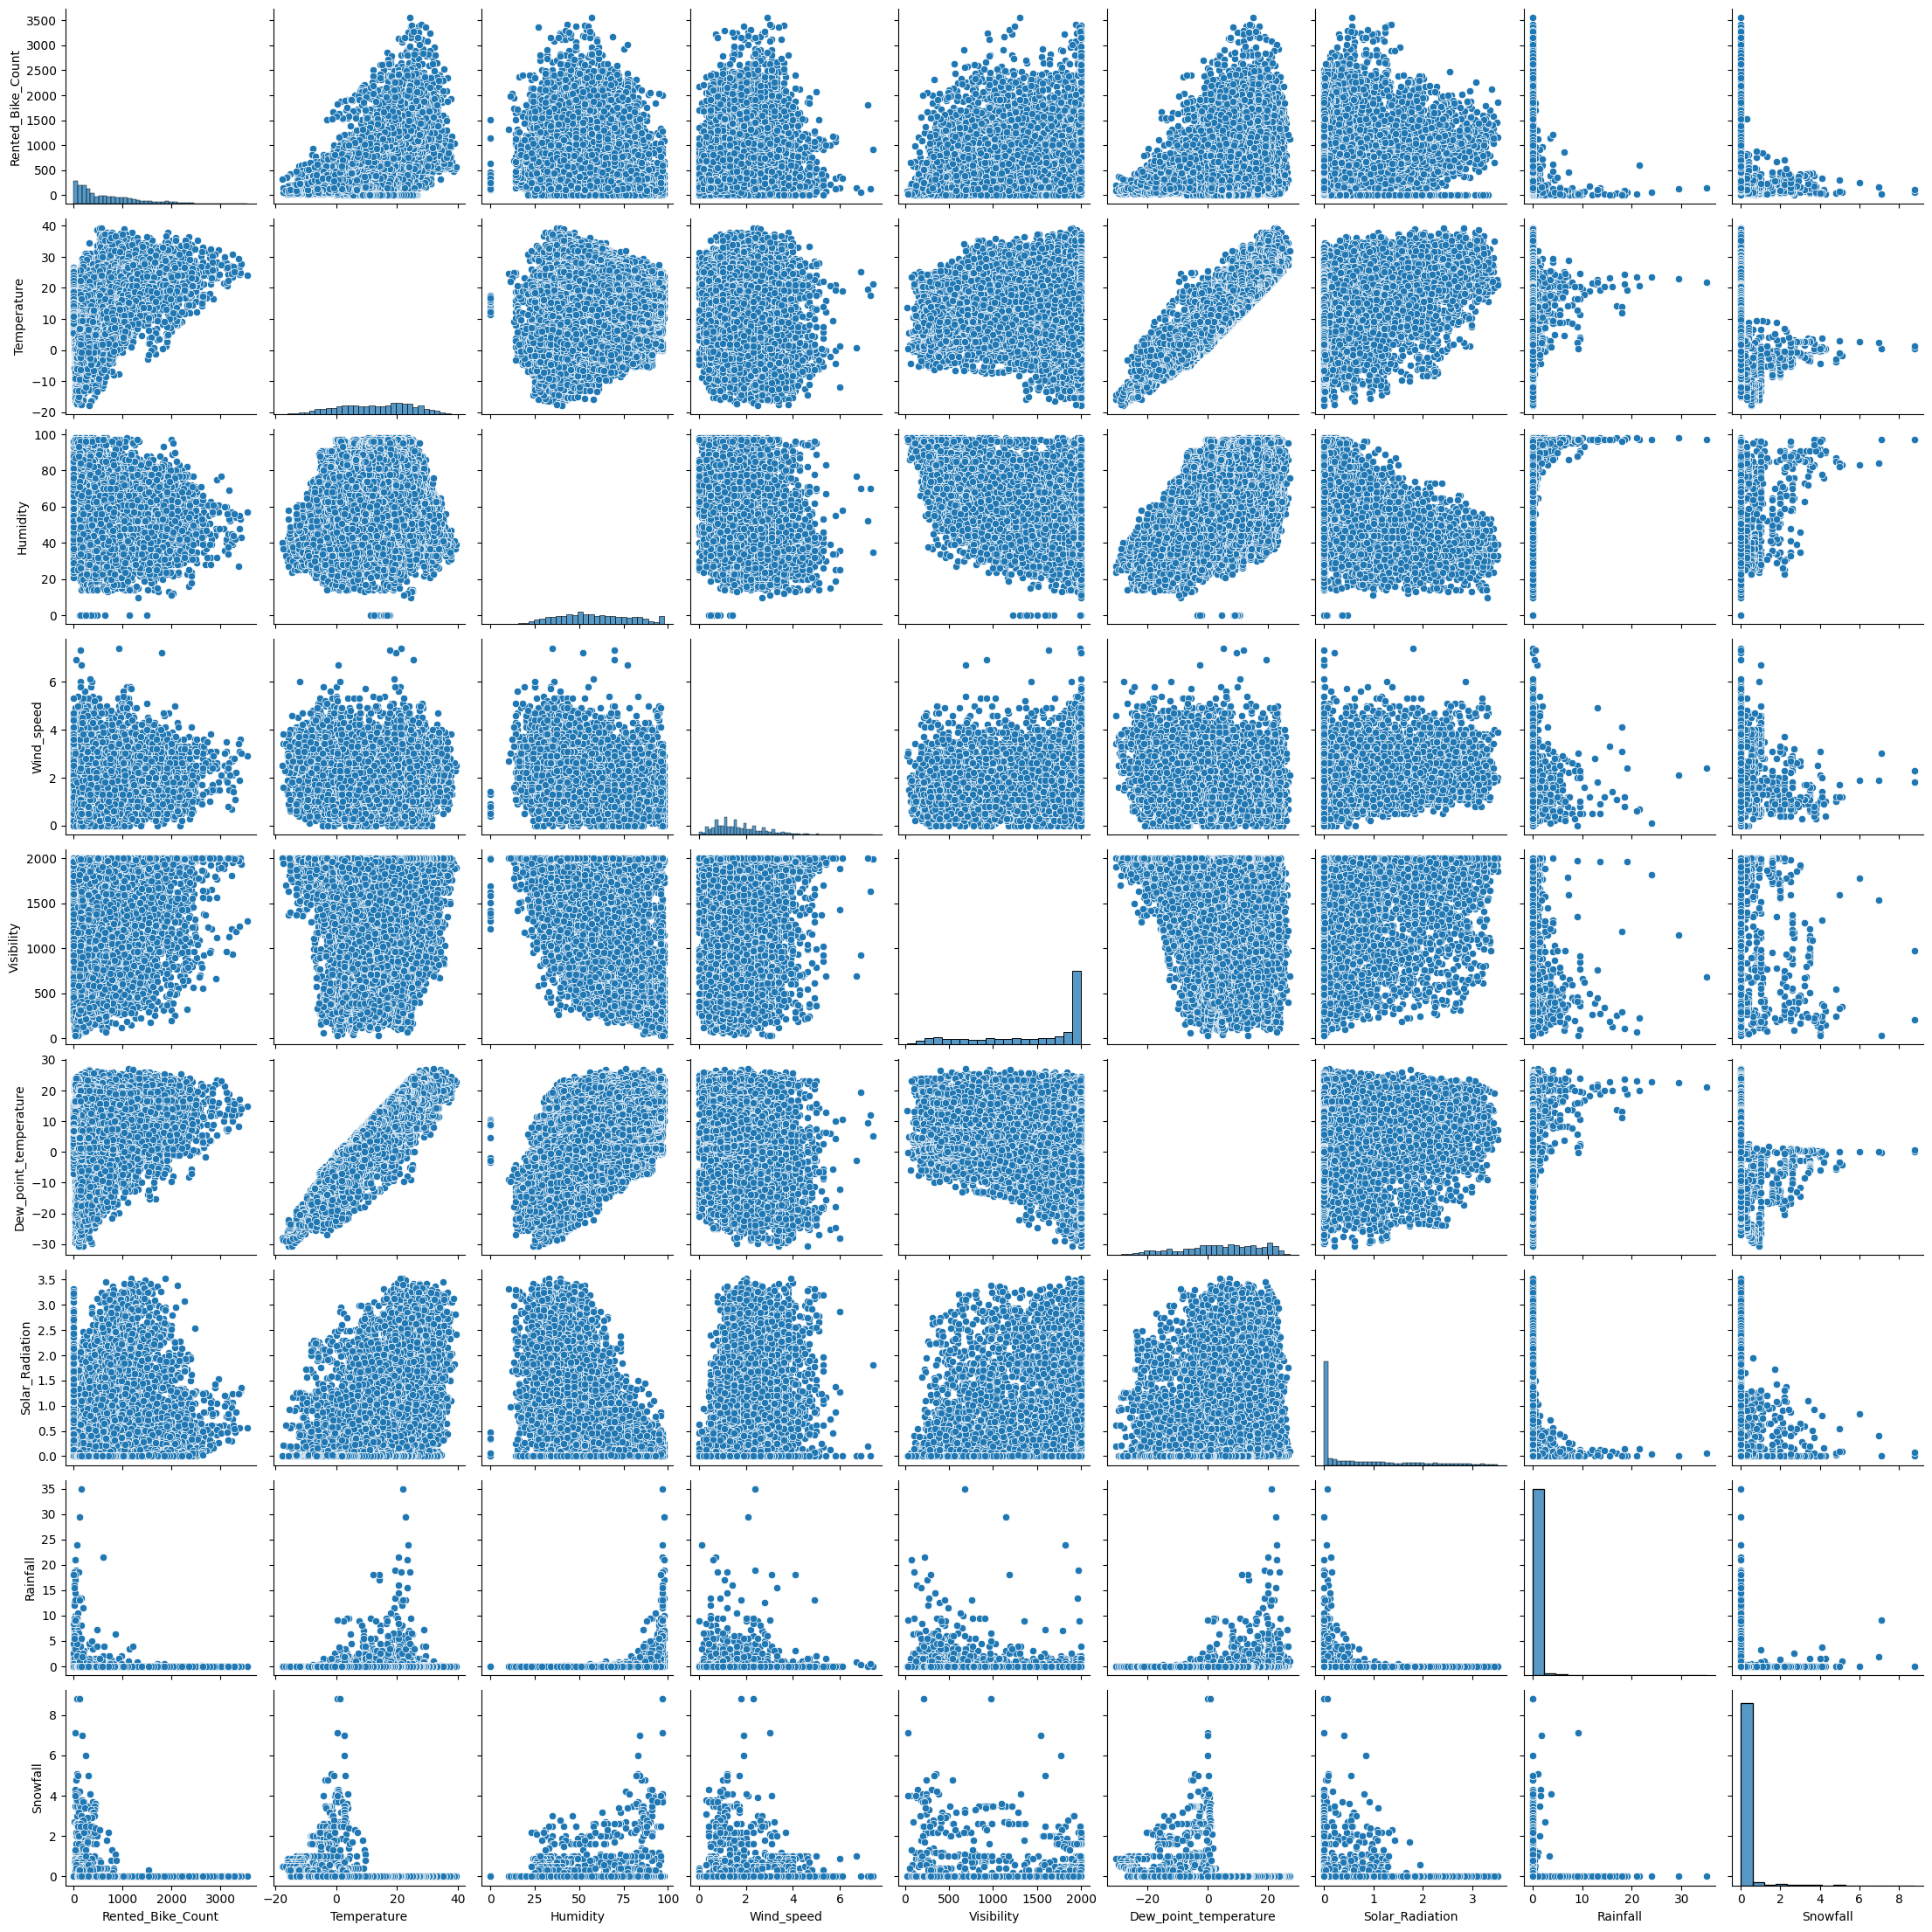

In [ ]:
# Pair Plot
sns.pairplot(bike_df_1)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From above pair plot we got to know that, there is not clear linear relationship between variables. other than dew point temp, temperature & solar radiation there is not any reationship.

### Pays little attention to the skewness of our numerical features

In [ ]:
bike_df = bike_df_1.copy()

In [ ]:
# separate numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])


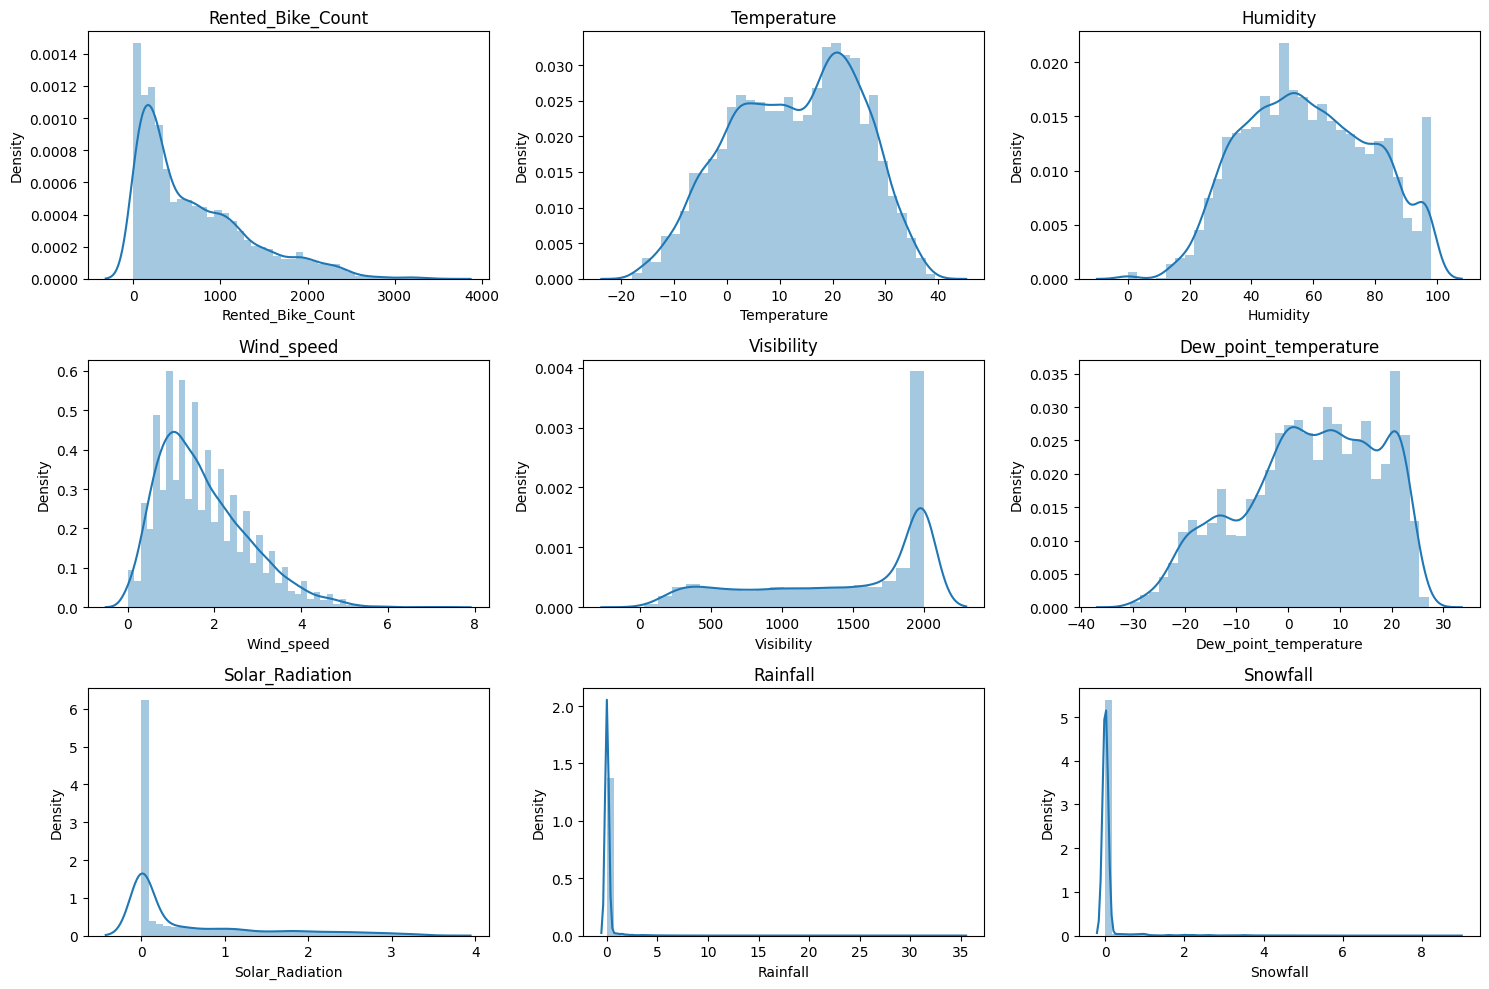

In [ ]:
# printing displots to analyze the distribution of all numerical features

n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()

## Right skewed columns are
Rented Bike Count (Its also our Dependent variable),
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m),
Dew point temperature(°C)

# ***Hypothesis Testing***

#### **Hypothetical Statement - 1**

Based on above chart experiments we have noticed that our dependent variable does not seems to normally distributed so we have made hypothetical assumption that our data is normally distributed and for that we have decided to do statistical analysis.



**Normality test**

for normality test we decided
1. Null hypothesis : Data is normally distributed
2. Alternate hypothesis : Data is not normally distributed


##### 2. Perform an appropriate statistical test.

In [ ]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
from scipy.stats import shapiro

test_data = bike_df['Rented_Bike_Count']

# Perform Shapiro-Wilk test
stats, p = shapiro(test_data)

print('Test Statistic = %.2f, p-value = %.3f' % (stats, p))

# Interpret the results
if p <= 0.05:
    print("Reject the null hypothesis: Data is not normally distributed")
else:
    print("Fail to reject the null hypothesis: Data is normally distributed")


Test Statistic = 0.88, p-value = 0.000
Reject the null hypothesis: Data is not normally distributed


##### Which statistical test have you done to obtain P-Value?

We use Shapiro-wilk statistical test to obtain the p-value and we got very less p-value which is less than 0.05.

##### Why did you choose the specific statistical test?

The Shapiro-Wilk test is used to test the normality of a sample. The test checks whether the sample data fits a normal distribution, which is often assumed for statistical analysis. The test results can help determine if the data should be transformed or if non-parametric statistical methods should be used instead of traditional parametric methods.

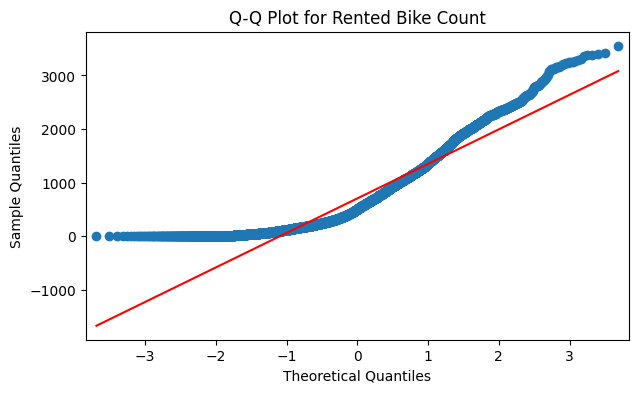

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate the Q-Q plot
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(test_data, line='s', ax=ax)
ax.set_title('Q-Q Plot for Rented Bike Count')
plt.show()



#### 2. **Effect of Weather Conditions on Bike Demand:**
   - Null Hypothesis (H0): There is no significant relationship between weather conditions (temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, rainfall, snowfall) and the number of rented bikes.
   - Alternative Hypothesis (H1): Weather conditions significantly influence the number of rented bikes.
   - Test: Multiple linear regression analysis with weather variables as independent variables and rented bike count as the dependent


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load your data into a DataFrame named bike_df

# Define independent variables (weather conditions) and dependent variable (rented bike count)
X = bike_df[['Temperature', 'Humidity', 'Wind_speed', 'Visibility',
             'Solar_Radiation', 'Rainfall', 'Snowfall']]
y = bike_df['Rented_Bike_Count']

# Add a constant term to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Determine significance level (alpha)
alpha = 0.05

# Get p-values for each coefficient
p_values = model.pvalues.drop('const')  # Drop constant term
significant_vars = p_values[p_values < alpha]

# Print significant variables
if len(significant_vars) > 0:
    print("Significant weather conditions influencing bike demand:")
    print(significant_vars)
    print("Reject null hypothesis: Weather conditions significantly influence the number of rented bikes.")
else:
    print("No significant weather conditions influencing bike demand.")
    print("Accept null hypothesis: There is no significant relationship between weather conditions and the number of rented bikes.")


Significant weather conditions influencing bike demand:
Temperature         0.000000e+00
Humidity           2.423914e-123
Wind_speed          6.576652e-26
Solar_Radiation     6.521683e-41
Rainfall            1.047783e-46
Snowfall            4.174178e-03
dtype: float64
Reject null hypothesis: Weather conditions significantly influence the number of rented bikes.



#### 3. **Impact of Time Factors on Bike Demand:**
   - Null Hypothesis (H0): There is no significant difference in bike demand across different hours of the day.
   - Alternative Hypothesis (H1): Bike demand varies significantly across different hours of the day.
   - Test: ANOVA (Analysis of Variance) to compare mean bike rental counts across different hours.



In [ ]:
from scipy.stats import f_oneway

# Split data by hour
hourly_data = [group['Rented_Bike_Count'] for _, group in bike_df.groupby('Hour')]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*hourly_data)

# Determine significance level (alpha)
alpha = 0.05

# Print result of ANOVA
if p_value < alpha:
    print("Reject null hypothesis: Bike demand varies significantly across different hours of the day.")
else:
    print("Accept null hypothesis: There is no significant difference in bike demand across different hours of the day.")


Reject null hypothesis: Bike demand varies significantly across different hours of the day.


#### 4. **Holiday and Seasonal Effects on Bike Demand:**
   - Null Hypothesis (H0): There is no significant difference in bike demand between holidays and non-holidays, as well as across different seasons.
   - Alternative Hypothesis (H1): Bike demand varies significantly between holidays and non-holidays, as well as across different seasons.
   - Test:  two-sample t-test to analyze the holiday and seasonal effects on bike demand


In [ ]:
from scipy.stats import ttest_ind

# Split data by holiday and non-holiday
holiday_data = bike_df[bike_df['Holiday'] == 'Holiday']['Rented_Bike_Count']
non_holiday_data = bike_df[bike_df['Holiday'] == 'No Holiday']['Rented_Bike_Count']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(holiday_data, non_holiday_data)

# Determine significance level (alpha)
alpha = 0.05

# Print result of two-sample t-test
if p_value < alpha:
    print("Reject null hypothesis: Bike demand varies significantly between holiday and non-holiday periods.")
else:
    print("Accept null hypothesis: There is no significant difference in bike demand between holiday and non-holiday periods.")


Reject null hypothesis: Bike demand varies significantly between holiday and non-holiday periods.


##**Normalise Rented_Bike_Count column data**

* ***The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data***

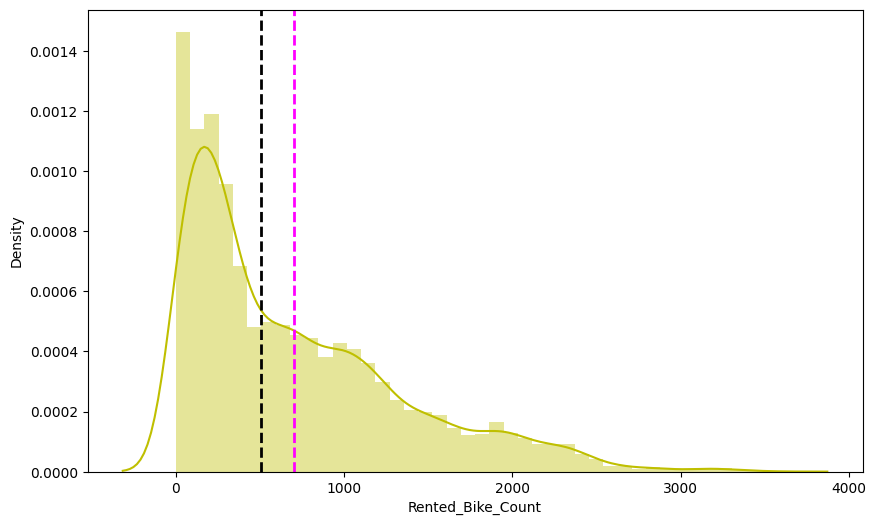

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* ***The above graph shows that, Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.***

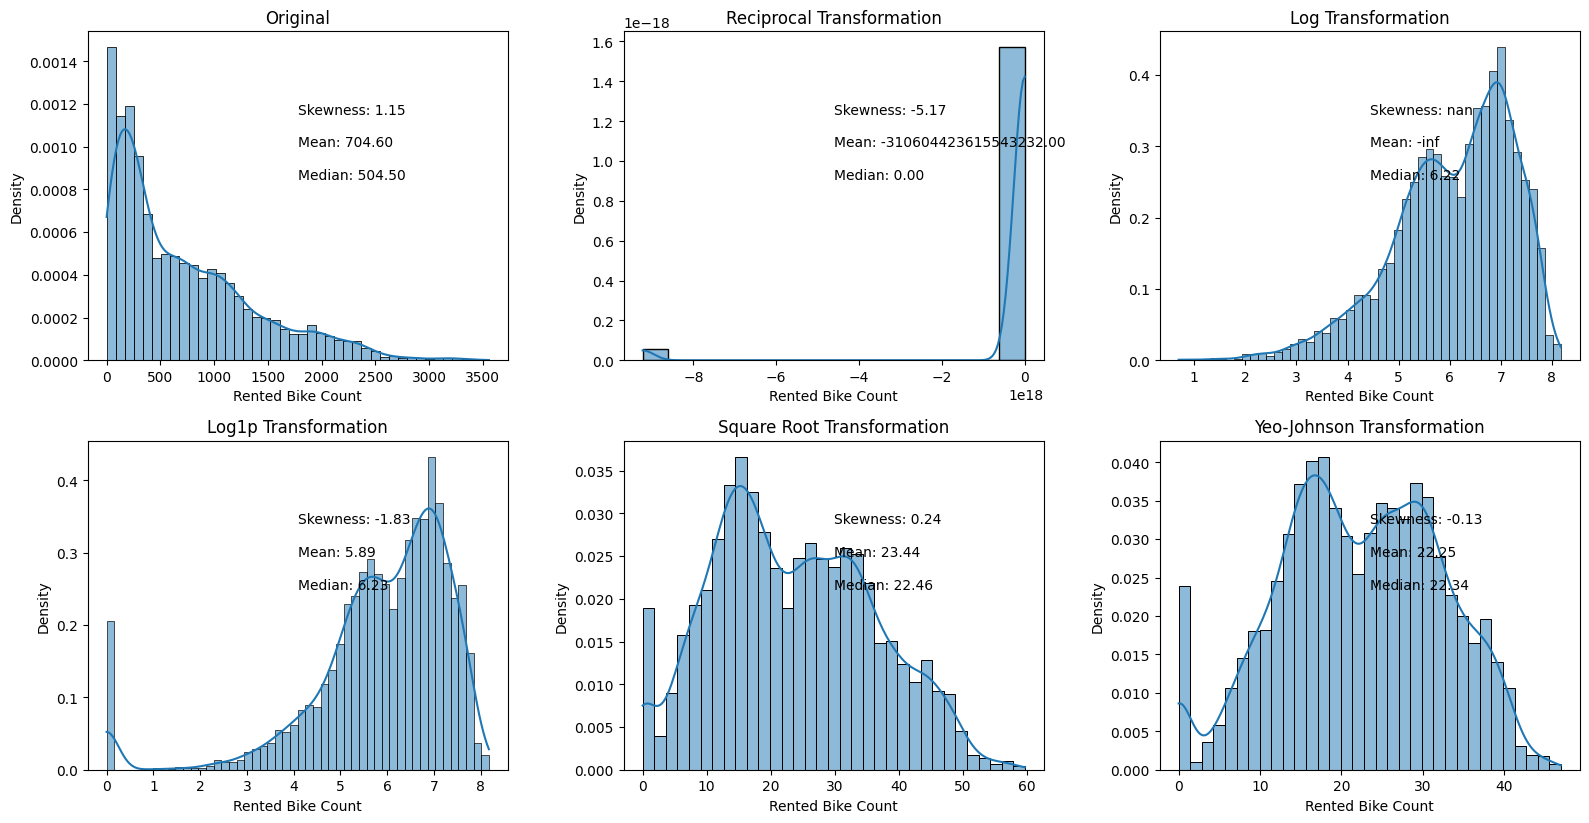

In [ ]:
from scipy.stats import boxcox
from scipy.stats import yeojohnson

# Define the data
test_data = bike_df['Rented_Bike_Count']
# test_data = bike_df['Wind_speed']

# Apply different transformations
transformations = {
    'Original': test_data,
    'Reciprocal Transformation': np.reciprocal(test_data),
    'Log Transformation': np.log(test_data),
    'Log1p Transformation': np.log1p(test_data),
    'Square Root Transformation': np.sqrt(test_data),
}

# Apply Yeo-Johnson transformation if available
try:
    transformed_data, lambda_val = yeojohnson(test_data)
    transformations['Yeo-Johnson Transformation'] = transformed_data
except Exception as e:
    print("Warning:", e)

# Apply Box-Cox transformation if data is positive
if (test_data > 0).all():
    transformed_data, lambda_val = boxcox(test_data)
    transformations['Box-Cox Transformation'] = transformed_data

# Plot the distributions
plt.figure(figsize=(16, 12))
for i, (transformation, data) in enumerate(transformations.items(), 1):
    plt.subplot(3, 3, i)
    sns.histplot(data, kde=True, stat='density')
    plt.title(transformation)
    plt.xlabel('Rented Bike Count')
    plt.ylabel('Density')

    # Calculate skewness, mean, and median
    skew = np.mean((data - np.mean(data))**3) / np.mean((data - np.mean(data))**2)**(3/2)
    mean = np.mean(data)
    median = np.median(data)

    # Print skewness, mean, and median below each histogram
    plt.text(0.5, 0.75, f'Skewness: {skew:.2f}', transform=plt.gca().transAxes)
    plt.text(0.5, 0.65, f'Mean: {mean:.2f}', transform=plt.gca().transAxes)
    plt.text(0.5, 0.55, f'Median: {median:.2f}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


In [ ]:
transformed_y, lambda_val = yeojohnson(test_data)

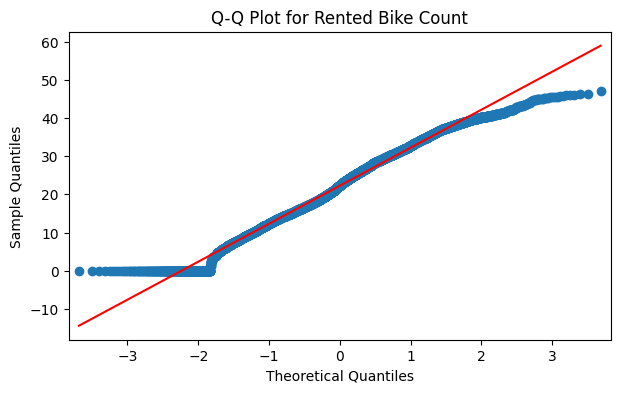

In [ ]:
# Generate the Q-Q plot
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(transformed_y, line='s', ax=ax)
ax.set_title('Q-Q Plot for Rented Bike Count')
plt.show()


In [ ]:
lambda_val

0.3494777785588123

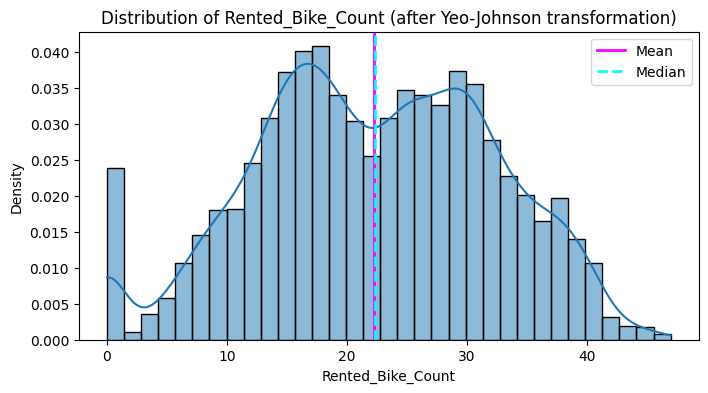

In [ ]:
# Plot the distribution
plt.figure(figsize=(8, 4))
sns.histplot(transformed_y, kde=True, stat='density')
plt.xlabel(test_data.name)
plt.title(f'Distribution of {test_data.name} (after Yeo-Johnson transformation)')
plt.axvline(np.mean(transformed_y), color='magenta', linewidth=2, label='Mean')
plt.axvline(np.median(transformed_y), color='cyan', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.show()


###  We plot distribution plot and also we did normality test using shapiro wilk and we have found that our data is not normally distributed it needs transformation.

So, first we have calculate the skewness value and we have found that rented bike attribute is positively skewed so we used log transfomation but it affected negatively

So, we finally used Yeo-Johnson transformation & now our data looks normally distrubuted & skewness is also reduced.

**Finding Outliers and treatment**

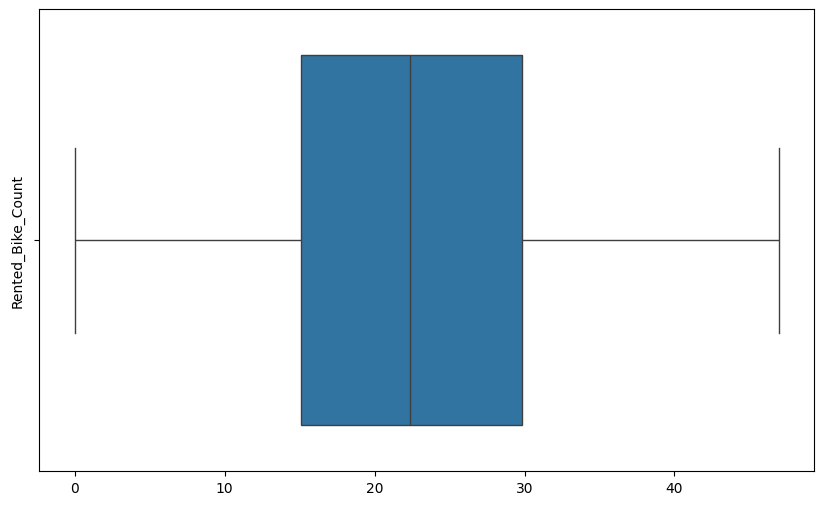

In [ ]:
# Boxplot for Rented bike Count to check outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=transformed_y)
plt.show()

In [ ]:
# outliers treatments
bike_df.loc[bike_df['Rainfall']>=4,'Rainfall']= 4
bike_df.loc[bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
bike_df.loc[bike_df['Snowfall']>2,'Snowfall']= 2
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']= 4


##**Checking of Correlation between variables**

###Checking in OLS Model

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day month weekdays_weekend  
0  No Holiday             Yes    12                0  
1  No Holiday             Yes    12                0  
2  No Holiday             Yes    12                0  
3  No Holiday             Yes    12                0  
4  No Holiday             Yes    12                0

In [ ]:
#add a constant column
X = sm.add_constant(X)
X.head()

const  Temperature  Humidity  Wind_speed  Visibility  \
0    1.0         -5.2        37         2.2        2000   
1    1.0         -5.5        38         0.8        2000   
2    1.0         -6.0        39         1.0        2000   
3    1.0         -6.2        40         0.9        2000   
4    1.0         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                  -17.6              0.0       0.0       0.0  
1                  -17.6              0.0       0.0       0.0  
2                  -17.7              0.0       0.0       0.0  
3                  -17.6              0.0       0.0       0.0  
4                  -18.6              0.0       0.0       0.0

In [ ]:
## fit an OLS model

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     744.3
Date:                Fri, 19 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:51:53   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8751   BIC:                         1.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   699.4173    106.562      6.563      0.000     490.531     908.304
Temperature              40.3283      4.160      9.695      0.000      32.175      48.482
Humidity                 -8.5913      1.193     -7.203      0.000     -10.929      -6.253
Wind_speed               62.4552      5.951     10.495      0.000      50.790      74.121
Visibility               -0.0137      0.011     -1.254      0.210      -0.035       0.008
Dew_point_temperature    -5.0068      4.394     -1.139      0.255     -13.621       3.607
Solar_Radiation        -124.1270      9.254    -13.413      0.000    -142.267    -105.987
Rainfall               -162.0914     11.237    -14.425      0.000    -184.118    -140.065
Snowfall                 53.2592     19.061      2.794      0.005      15.895      90.623
==============================================================================
Omnibus:                      965.203   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.702
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                       4.436   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is  explained by the model.**
*  **For F statistic , P value is less than 0.05 for 5% levelof significance.**
*  **P value of dew point temp and visibility are very high and they are not significant.**

*  **Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.**
*  **The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems**   
*  **Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.**

In [ ]:
X.corr()

const  Temperature  Humidity  Wind_speed  Visibility  \
const                    NaN          NaN       NaN         NaN         NaN   
Temperature              NaN     1.000000  0.159371   -0.031368    0.034794   
Humidity                 NaN     0.159371  1.000000   -0.341432   -0.543090   
Wind_speed               NaN    -0.031368 -0.341432    1.000000    0.173683   
Visibility               NaN     0.034794 -0.543090    0.173683    1.000000   
Dew_point_temperature    NaN     0.912798  0.536894   -0.174233   -0.176630   
Solar_Radiation          NaN     0.350679 -0.467236    0.342995    0.151105   
Rainfall                 NaN     0.061274  0.331631   -0.038813   -0.238378   
Snowfall                 NaN    -0.263134  0.087086    0.008140   -0.109306   

                       Dew_point_temperature  Solar_Radiation  Rainfall  \
const                                    NaN              NaN       NaN   
Temperature                         0.912798         0.350679  0.061274   
Humidity                            0.536894        -0.467236  0.331631   
Wind_speed                         -0.174233         0.342995 -0.038813   
Visibility                         -0.176630         0.151105 -0.238378   
Dew_point_temperature               1.000000         0.090541  0.168386   
Solar_Radiation                     0.090541         1.000000 -0.105920   
Rainfall                            0.168386        -0.105920  1.000000   
Snowfall                           -0.195743        -0.080470 -0.002297   

                       Snowfall  
const                       NaN  
Temperature           -0.263134  
Humidity               0.087086  
Wind_speed             0.008140  
Visibility            -0.109306  
Dew_point_temperature -0.195743  
Solar_Radiation       -0.080470  
Rainfall              -0.002297  
Snowfall               1.000000

* ***From the OLS model we find that the 'Temperature' and  'Dew_point_temperature' are highly correlated so we need to drop one of them.***
* ***For droping them we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column***
* ***For clarity, we use visualisation i.e heatmap in next step***



###**Heatmap**

#### **A correlation Heatmap is a type of graphical representation that displays the correlation matrix, which helps to determine the correlation between different variables.**

<Axes: >

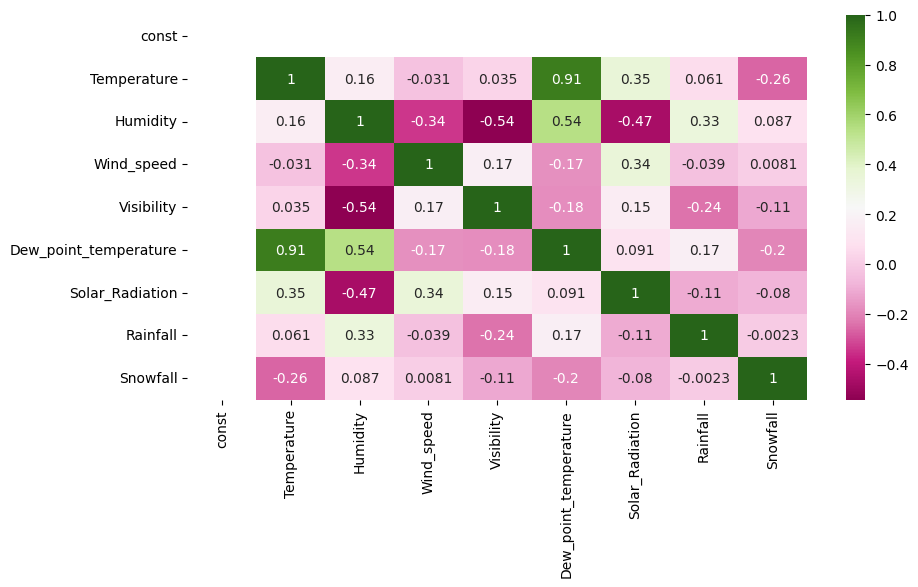

In [ ]:
#checking correlation using heatmap

plt.figure(figsize=(10,5))
sns.heatmap(X.corr(),cmap='PiYG',annot=True)

**We can observe on the heatmap that on the target variable line, the most positively correlated variables to the rent are**:
* the temperature
* the dew point temperature
* the solar radiation

**And most negatively correlated variables are**:
* humidity
* rainfall

* ***From the above correlation heatmap, We see that there is a positive
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it won't affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature(°C)'.***

In [ ]:
# drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.7+ KB


## **Feature Engineering & Data Pre-processing**

"""
**Note:**

Certain code blocks have been commented out because a custom function has been created to handle various preprocessing steps, including train-test split, transformation, one-hot encoding, scaling, and the use of function transformers and pipelines.

Instead of running individual code blocks, you can directly execute the custom function, which performs all these steps in one go for efficiency and convenience.
"""


#### Feature Selection

In [ ]:
#remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
numeric_features = bike_df.select_dtypes(include='number').columns.tolist()
numeric_features.remove('Rented_Bike_Count')

In [ ]:
numeric_features

['Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

In [ ]:
bike_df[numeric_features].head()

Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  \
0         -5.2        37         2.2        2000              0.0       0.0   
1         -5.5        38         0.8        2000              0.0       0.0   
2         -6.0        39         1.0        2000              0.0       0.0   
3         -6.2        40         0.9        2000              0.0       0.0   
4         -6.0        36         2.3        2000              0.0       0.0   

   Snowfall  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0

In [ ]:
calc_vif(bike_df[[i for i in bike_df[numeric_features]]])

variables       VIF
0      Temperature  3.231463
1         Humidity  5.053557
2       Wind_speed  4.348380
3       Visibility  4.575817
4  Solar_Radiation  2.308942
5         Rainfall  1.166518
6         Snowfall  1.153579

### Create the dummy variables

**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

###One Hot Encoding

**A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

In [ ]:

# bike_df_copy = bike_df.copy()

# # Define the one-hot encoding function
# def one_hot_encoding(data, column):
#     # Apply one-hot encoding to the specified column
#     encoded_column = pd.get_dummies(data[column], prefix=column, drop_first=True)
#     # Convert encoded values to 1 or 0
#     encoded_column = encoded_column.astype(int)
#     # Concatenate the encoded column with the original DataFrame
#     data = pd.concat([data, encoded_column], axis=1)
#     # Drop the original column after encoding
#     data = data.drop([column], axis=1)
#     return data

# # Apply one-hot encoding to each categorical feature
# for col in categorical_features:
#     bike_df_copy = one_hot_encoding(bike_df_copy, col)

# # Display the first few rows of the transformed DataFrame
# bike_df_copy.head()


### 6. Data Scaling

In [ ]:
# Assuming bike_df is your DataFrame
categorical_features = bike_df.select_dtypes(include=['object','category']).columns.tolist()

categorical_feature_indices = [bike_df.drop(columns = 'Rented_Bike_Count').columns.get_loc(col) for col in categorical_features]

print(categorical_feature_indices)



[0, 8, 9, 10, 11, 12]


In [ ]:
numeric_features_indices = [bike_df.drop(columns='Rented_Bike_Count').columns.get_loc(col) for col in numeric_features]

print(numeric_features_indices)


[1, 2, 3, 4, 5, 6, 7]


### 8. Data Splitting

In [ ]:
# from sklearn.model_selection import train_test_split
# X = df.drop(columns=['Rented_Bike_Count'])
# y = df['Rented_Bike_Count']
# # Apply Yeojohnson transformation to the target variable
# y_transformed = yeojohnson_transform(y)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.25, random_state=42)

# # Define transformers for numerical and categorical features
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())])

# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(sparse=False, drop='first'))])

# # Define the ColumnTransformer
# transformer = ColumnTransformer(transformers=[
#     ('tnf1', categorical_transformer, categorical_feature_indices),
#     ('scaler', numeric_transformer, numeric_features_indices)
# ], remainder='passthrough')

# # Append regressor to preprocessing pipeline
# rf_pipeline = Pipeline(steps=[
#     ('preprocessor', transformer),
#     ('regressor', LinearRegression())
# ])

# # Fit the pipeline on the training data
# rf_pipeline.fit(X_train, y_train)

# # Evaluate the pipeline on the testing data
# score = rf_pipeline.score(X_test, y_test)

# print("Pipeline Score:", score)


In [ ]:
# # Assuming 'transformer' is your ColumnTransformer object
# transformers = transformer.named_transformers_

# # Print the transformations applied by the categorical_transformer
# print("Categorical Transformer:")
# print(transformers['tnf1'])

# # Print the transformations applied by the numeric_transformer
# print("Numeric Transformer:")
# print(transformers['scaler'])

# # Print the remainder setting
# print("Remainder:", transformer.remainder)

##### What data splitting ratio have you used and why?

To train the model we have split the data into train and test using train_test_split method

We have split 80% of our data into train and 20% into test.

# **Model Training**

##**Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

I have done this inside a function

In [ ]:
df  = bike_df.copy()

### ***Function to apply train test split , transformation , one hot encoding , scalling***

In [ ]:
def transform_data(X, y):
    # Apply Yeojohnson transformation to the target variable
    y_transformed, lambda_ = yeojohnson(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

    # Define transformers for numerical and categorical features
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'))  # Ignore unknown categories
    ])

    # Define feature indices properly
       # Update this with the indices of your numerical features

    preprocessor = ColumnTransformer(transformers=[
        ('categorical', categorical_transformer, categorical_feature_indices),
        ('numeric', numeric_transformer, numeric_features_indices)
    ], remainder='passthrough')

    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Transform the training and testing data
    X_train_transformed = pipeline.transform(X_train)
    X_test_transformed = pipeline.transform(X_test)

    # Get feature names after transformation
    categorical_feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1]['onehot'] \
        .get_feature_names_out(input_features=X.columns[categorical_feature_indices])
    feature_names = np.concatenate((categorical_feature_names, X.columns[numeric_features_indices]))

    # Create DataFrame for transformed X_train data
    X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)

    return X_train_transformed, X_test_transformed, y_train, y_test, X_train_transformed_df

X = df.drop(columns=['Rented_Bike_Count'])
y = df['Rented_Bike_Count']
X_train_transformed, X_test_transformed, y_train, y_test, X_train_transformed_df = transform_data(X, y)

The function `transform_data` preprocesses the input data for machine learning tasks by:

1. Applying the Yeojohnson transformation to the target variable.
2. Splitting the data into training and testing sets.
3. Standardizing numerical features and performing one-hot encoding with handling of unknown categories for categorical features.
4. Constructing a pipeline to apply these transformations.
5. Fitting the pipeline to the training data and transforming both the training and testing sets accordingly.
6. Providing transformed datasets along with feature names and a DataFrame representing the transformed training data.

### ***Function to aaply preprocessing and run model***

In [ ]:


models_test_res_list = []
models_train_res_list = []

# Define a function to calculate adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_samples, n_features):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

def evaluate_model(model_name, model, X, y):
    # Apply Yeojohnson transformation to the target variable
    y_transformed, lambda_ = yeojohnson(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

    # Define transformers for numerical and categorical features
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False, drop='first'))
    ])

    # Define feature indices properly
    # categorical_feature_indices = ...
    # numeric_features_indices = ...

    preprocessor = ColumnTransformer(transformers=[
        ('categorical', categorical_transformer, categorical_feature_indices),
        ('numeric', numeric_transformer, numeric_features_indices)
    ], remainder='passthrough')

    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Obtain predictions on the training and testing datasets
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)


    # Calculate evaluation metrics for training set
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)
    adj_r2_train = adjusted_r2_score(y_train, y_pred_train, len(y_train), X.shape[1])

    # Calculate evaluation metrics for the test set
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_test = adjusted_r2_score(y_test, y_pred_test, len(y_test), X_test.shape[1])

    # Print evaluation metrics
    print("Model:", model_name)
    print("Mean Absolute Error (Train):", mae_train)
    print("Mean Squared Error (Train):", mse_train)
    print("Root Mean Squared Error (Train):", rmse_train)
    print("R-squared (Train):", r2_train)
    print("Adjusted R-squared (Train):", adj_r2_train)
    print('-'*50)
    print("Mean Absolute Error (Test):", mae_test)
    print("Mean Squared Error (Test):", mse_test)
    print("Root Mean Squared Error (Test):", rmse_test)
    print("R-squared (Test):", r2_test)
    print("Adjusted R-squared (Test):", adj_r2_test)
    print()

    # Store the test set metrics in a dictionary
    test_metrics = {
    'Model': [model_name],
    'MAE': [mae_test],
    'MSE': [mse_test],
    'RMSE': [rmse_test],
    'R-squared': [r2_test],
    'Adjusted R-squared': [adj_r2_test]
    }

    # Define train metrics
    train_metrics = {
        'Model': [model_name],
        'MAE': [mae_train],
        'MSE': [mse_train],
        'RMSE': [rmse_train],
        'R-squared': [r2_train],
        'Adjusted R-squared': [adj_r2_train]
    }

    # Create DataFrames
    df_test = pd.DataFrame(test_metrics)
    df_train = pd.DataFrame(train_metrics)

    models_test_res_list.append(df_test)
    models_train_res_list.append(df_train)


    # Return the evaluation metrics
    return df_test, df_train, y_pred_test, y_test, lambda_



# Define the features and target variable
X = df.drop(columns=['Rented_Bike_Count'])
y = df['Rented_Bike_Count']





This function, `evaluate_model`, takes a model, data, and its corresponding target variable, then performs the following tasks:

1. It transforms the target variable using the Yeojohnson transformation.
2. Splits the data into training and testing sets.
3. Preprocesses the features using standard scaling for numerical features and one-hot encoding for categorical features.
4. Fits a pipeline consisting of the preprocessor and the provided model to the training data.
5. Calculates evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared, and Adjusted R-squared for both the training and testing sets.
6. Prints and stores these evaluation metrics for further analysis.

Finally, it returns DataFrames containing the evaluation metrics for both the training and testing sets, as well as the predictions on the test set and the lambda value obtained from the Yeojohnson transformation.

### ***Function for feature importance***

In [ ]:
def get_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        return dict(zip(feature_names, importances))
    else:
        return "Feature importances are not available for this model."


### ***Function for gridsearch cv***

In [ ]:
from sklearn.model_selection import GridSearchCV

def perform_grid_search_cv(model_name, model, param_grid, X, y):
    # Apply Yeojohnson transformation to the target variable
    y_transformed, lambda_ = yeojohnson(y)

    # Define transformers for numerical and categorical features
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False, drop='first'))
    ])

    # Define feature indices properly
    # categorical_feature_indices = ...
    # numeric_features_indices = ...

    preprocessor = ColumnTransformer(transformers=[
        ('categorical', categorical_transformer, categorical_feature_indices),
        ('numeric', numeric_transformer, numeric_features_indices)
    ], remainder='passthrough')

    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Define grid search CV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Perform grid search CV
    grid_search.fit(X, y_transformed)

    # Get the best model and best parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best parameters and return them
    print("Best parameters for", model_name, ":", best_params)
    return best_model, best_params


* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned}
​
  
* R
2
 =1−
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


## **LINEAR REGRESSION**

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.


In [ ]:
# Define the model
model = LinearRegression()

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("LinearRegression", model, X, y)

Model: LinearRegression
Mean Absolute Error (Train): 3.205423593938921
Mean Squared Error (Train): 18.372734498306254
Root Mean Squared Error (Train): 4.286342788241073
R-squared (Train): 0.8149243992499549
Adjusted R-squared (Train): 0.8145803925571109
--------------------------------------------------
Mean Absolute Error (Test): 3.1608834082957302
Mean Squared Error (Test): 17.755603370592794
Root Mean Squared Error (Test): 4.2137398318587245
R-squared (Test): 0.8182441785159384
Adjusted R-squared (Test): 0.8168846700698551



In [ ]:
test_metrics

Model       MAE        MSE     RMSE  R-squared  \
0  LinearRegression  3.160883  17.755603  4.21374   0.818244   

   Adjusted R-squared  
0            0.816885

In [ ]:
train_metrics


Model       MAE        MSE      RMSE  R-squared  \
0  LinearRegression  3.205424  18.372734  4.286343   0.814924   

   Adjusted R-squared  
0             0.81458

**Looks like our train set's r2 score value is 0.81 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

**The test set's r2_score is 0.82. This means our linear model is
performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



**Heteroscedasticity**

Heteroscedasticity refers to a situation where the variance of the errors (residuals) is not constant across all levels of the independent variable(s) in a regression model.This violates one of the assumptions of linear regression, which is that the variance of the errors should be constant (homoscedastic) for all levels of the independent variable(s). If the plot shows a funnel shape, with the spread of residuals increasing or decreasing as the predicted values increase, this is an indication of heteroscedasticity.

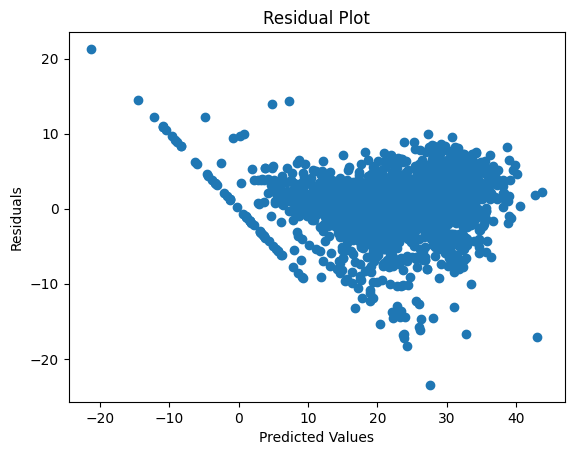

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

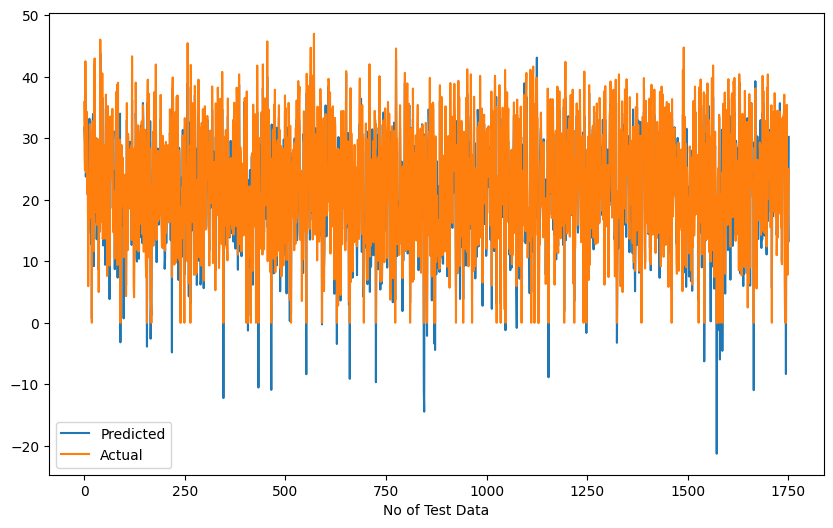

In [ ]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(10,6))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## **RIDGE AND LASSO REGRESSION**

* Ridge and Lasso Regression are types of Regularization techniques
* Regularization techniques are used to deal with overfitting and when the dataset is large
* Ridge and Lasso Regression involve adding penalties to the regression function


### **LASSO REGRESSION**

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.


In [ ]:
# Define the model
model = Lasso( alpha=1.0, max_iter=3000)

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("lasso", model, X, y)

Model: lasso
Mean Absolute Error (Train): 6.005899403428081
Mean Squared Error (Train): 62.26588708331274
Root Mean Squared Error (Train): 7.890873657796882
R-squared (Train): 0.37277183974759165
Adjusted R-squared (Train): 0.37160598814860946
--------------------------------------------------
Mean Absolute Error (Test): 5.876375366159574
Mean Squared Error (Test): 59.27583900547899
Root Mean Squared Error (Test): 7.699080399987975
R-squared (Test): 0.39322091242241386
Adjusted R-squared (Test): 0.38868228863731114



**Looks like train set's r2 score value is 0.37 that means our model is not able to capture most of the data variance.**

**The test set's r2_score is 0.39. This means our linear model is  not performing well on the data.**

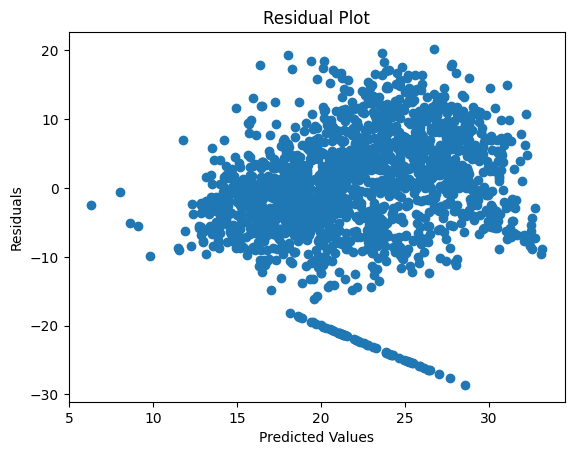

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test),(y_test-y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

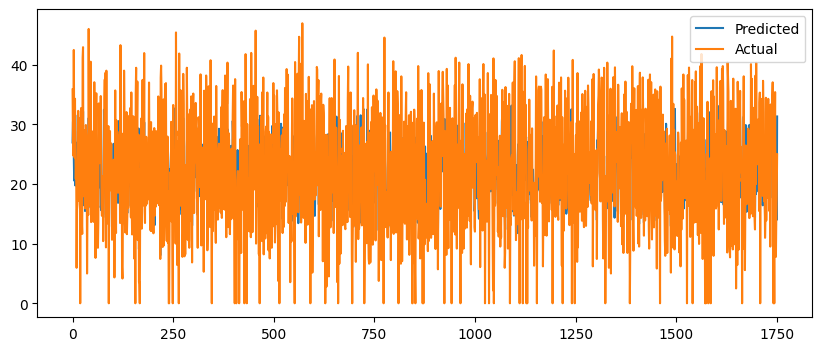

In [ ]:
#Plot the figure
plt.figure(figsize=(10,4))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### **RIDGE REGRESSION**

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

In [ ]:
# Define the model
model = Ridge()

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("Ridge", model, X, y)

Model: Ridge
Mean Absolute Error (Train): 3.206133186262129
Mean Squared Error (Train): 18.37031729692597
Root Mean Squared Error (Train): 4.286060813488998
R-squared (Train): 0.8149487486464821
Adjusted R-squared (Train): 0.8146047872127395
--------------------------------------------------
Mean Absolute Error (Test): 3.1587117398883873
Mean Squared Error (Test): 17.73035227957697
Root Mean Squared Error (Test): 4.21074248554539
R-squared (Test): 0.818502662144749
Adjusted R-squared (Test): 0.8171450871205153



**Looks like our train set's r2 score value is 0.81 that means our model is  able to capture most of the data variance.**

**The r2_score for the test set is 0.82. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


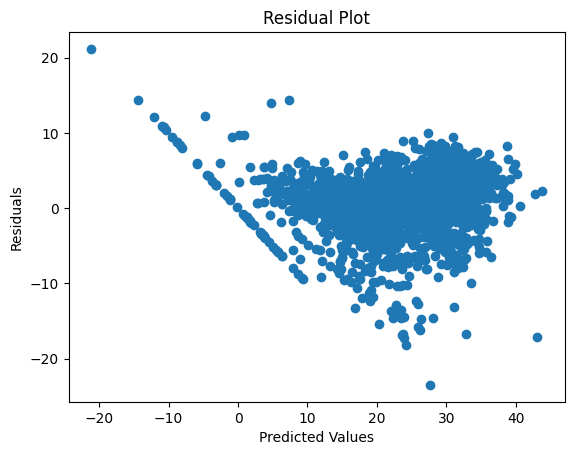

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

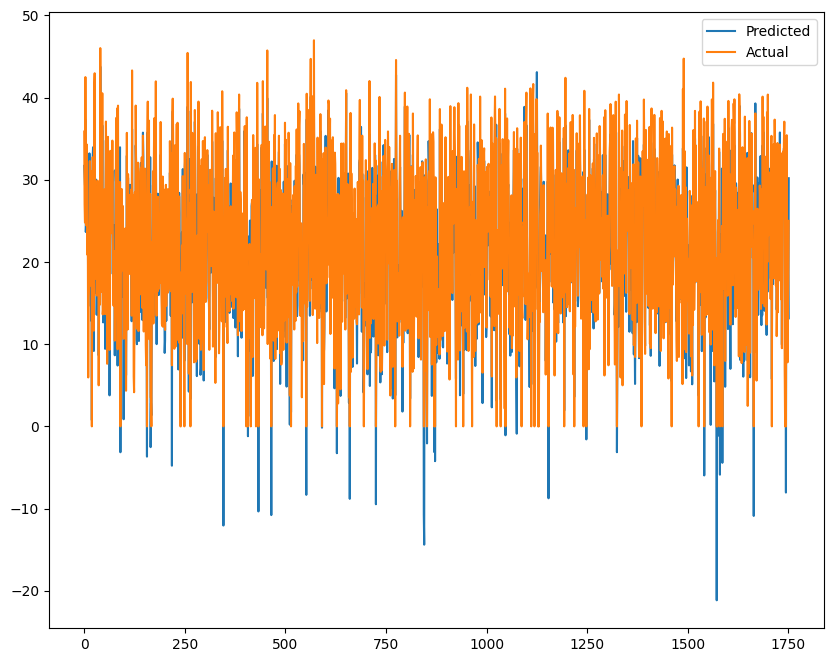

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **ELASTIC NET REGRESSION**

Elastic Net regression is a linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization penalties to overcome some of the limitations of each individual method.

The model introduces two hyperparameters, alpha and l1_ratio, which control the strength of the L1 and L2 penalties, respectively.
Elastic Net regression is particularly useful when dealing with datasets that have high dimensionality and multicollinearity between features.

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)


In [ ]:
# Define the model
model= ElasticNet(alpha=0.1, l1_ratio=0.5)

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("ElasticNet", model, X, y)

Model: ElasticNet
Mean Absolute Error (Train): 4.544471189747874
Mean Squared Error (Train): 35.59271347399791
Root Mean Squared Error (Train): 5.965962912556355
R-squared (Train): 0.641460946973807
Adjusted R-squared (Train): 0.6407945175072156
--------------------------------------------------
Mean Absolute Error (Test): 4.426389226264299
Mean Squared Error (Test): 33.46233156762182
Root Mean Squared Error (Test): 5.784663479202728
R-squared (Test): 0.6574617355488893
Adjusted R-squared (Test): 0.6548995966318212



In [ ]:
test_metrics

Model       MAE        MSE      RMSE  R-squared  Adjusted R-squared
0  ElasticNet  4.426389  33.462332  5.784663   0.657462              0.6549

In [ ]:
train_metrics

Model       MAE        MSE      RMSE  R-squared  Adjusted R-squared
0  ElasticNet  4.544471  35.592713  5.965963   0.641461            0.640795

**Looks like our train set's r2 score value is 0.64 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

**The r2_score for the test set is 0.66. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



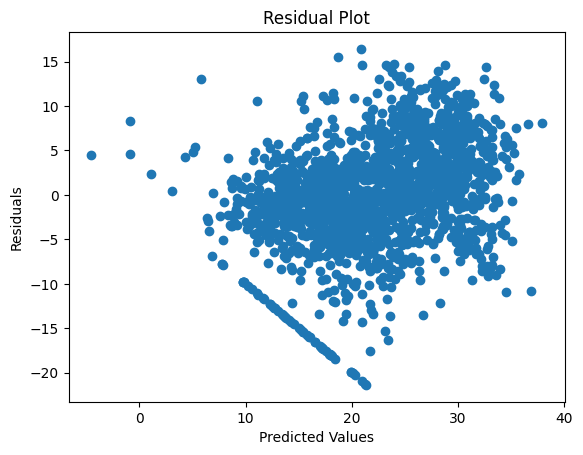

In [ ]:
### Heteroscadacity- Residual plo
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

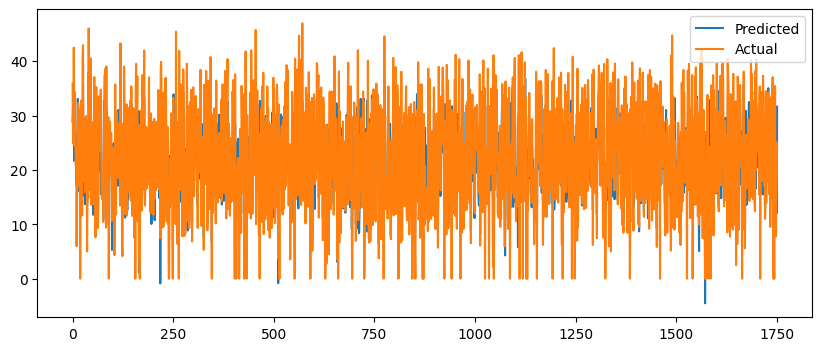

In [ ]:
#Plot the figure
plt.figure(figsize=(10,4))
plt.plot(np.array(y_pred_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##  **DECISION TREE**

---


A decision tree is a type of supervised machine learning algorithm that is commonly used for classification and regression tasks. It works by recursively splitting the data into subsets based on the values of certain attributes, ultimately arriving at a set of decision rules that can be used to classify or predict outcomes for new data.

first i tried with these parameteres

criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,

but the default one is giving the better result

letter we will do hyper parameter tunning

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor()

In [ ]:
# Define the model
model= decision_regressor

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("decision_regressor", model, X, y)

Model: decision_regressor
Mean Absolute Error (Train): 3.8021336459765633e-19
Mean Squared Error (Train): 3.3769730531721394e-34
Root Mean Squared Error (Train): 1.8376542256834226e-17
R-squared (Train): 1.0
Adjusted R-squared (Train): 1.0
--------------------------------------------------
Mean Absolute Error (Test): 2.3883258866402524
Mean Squared Error (Test): 16.027591194624463
Root Mean Squared Error (Test): 4.003447413745366
R-squared (Test): 0.8359330323398397
Adjusted R-squared (Test): 0.8347058340777096



**It seems that our decision tree model with default parameters has achieved perfect performance on the training set. The R-squared value of 1.0 indicates that the model is capable of capturing all the variance in the data**

**The r2_score for the test set is 0.84. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



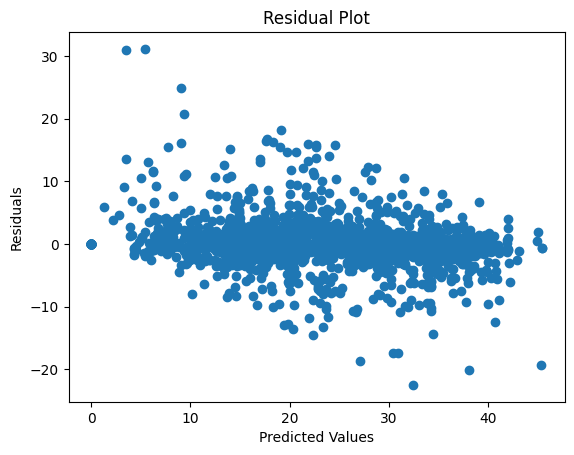

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

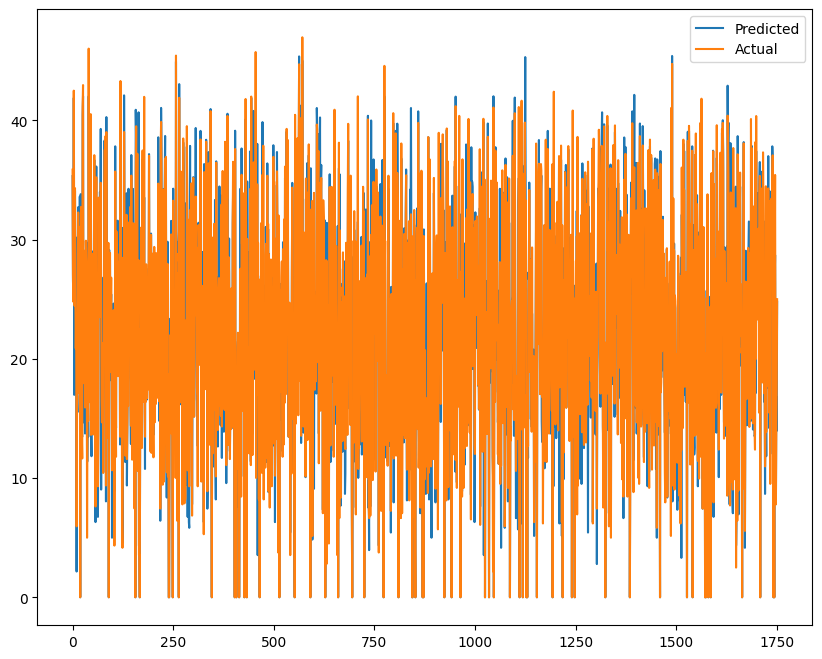

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((np.array(y_pred_test)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **RANDOM FOREST**

In [ ]:
#import the packages

from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()


In [ ]:
rf_model.fit(X_train_transformed,y_train)

RandomForestRegressor()

In [ ]:
# Define the model
rf_model = RandomForestRegressor()

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("RandomForestRegressor", rf_model, X, y)

Model: RandomForestRegressor
Mean Absolute Error (Train): 0.6365114503919654
Mean Squared Error (Train): 1.0039295075996233
Root Mean Squared Error (Train): 1.0019628274540044
R-squared (Train): 0.9898870330517852
Adjusted R-squared (Train): 0.9898682357154502
--------------------------------------------------
Mean Absolute Error (Test): 1.6416098707499691
Mean Squared Error (Test): 6.359509083770457
Root Mean Squared Error (Test): 2.521806710231864
R-squared (Test): 0.9349006748106099
Adjusted R-squared (Test): 0.9344137408477433



**Looks like our train set's r2 score value is 0.99 that means our model is  able to capture most of the data variance..**



**The r2_score for the test set is 0.93. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



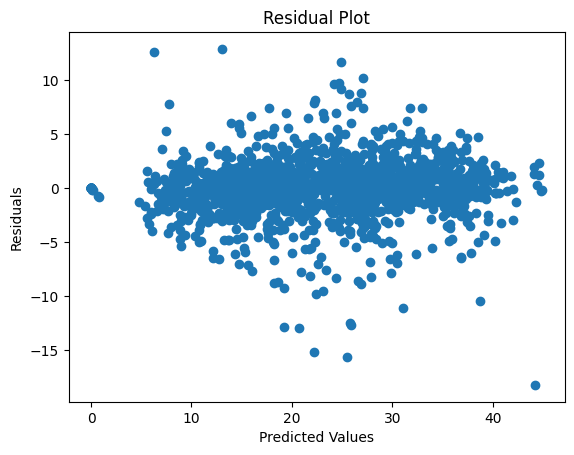

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
rf_model.feature_importances_

array([4.79202471e-03, 1.31226240e-02, 2.04001566e-02, 3.26030899e-02,
       2.86203725e-02, 1.12671110e-02, 4.03996154e-03, 1.20830600e-02,
       9.35916969e-04, 1.79833373e-03, 8.39675498e-04, 4.18150868e-04,
       2.14085354e-04, 3.81778314e-04, 9.94796121e-04, 2.78164106e-03,
       7.36642753e-03, 2.36920582e-02, 1.03845159e-02, 8.05485894e-03,
       8.32050053e-03, 5.93607106e-03, 2.37418879e-03, 3.51434673e-03,
       7.16687556e-04, 6.85337045e-03, 3.84012998e-03, 1.88913028e-01,
       3.57700168e-04, 3.28444350e-03, 1.16816996e-03, 1.40706808e-03,
       1.93819101e-03, 9.44645500e-04, 2.05110075e-03, 8.13655260e-04,
       2.55648392e-03, 6.64473687e-03, 9.22295857e-04, 1.56116685e-02,
       3.09177237e-01, 1.57769680e-01, 1.21933890e-02, 1.32841928e-02,
       2.61375583e-02, 3.67147789e-02, 1.76404354e-03])

## **Features Stored**

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train_transformed_df.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
40          Temperature                0.31
27  Functioning_Day_Yes                0.19
41             Humidity                0.16
45             Rainfall                0.04
3                Hour_4                0.03
4                Hour_5                0.03
44      Solar_Radiation                0.03
2                Hour_3                0.02
17              Hour_18                0.02
39   weekdays_weekend_1                0.02
21              Hour_22                0.01
20              Hour_21                0.01
19              Hour_20                0.01
18              Hour_19                0.01
16              Hour_17                0.01
37             month_11                0.01
25       Seasons_Winter                0.01
42           Wind_speed                0.01
43           Visibility                0.01
7                Hour_8                0.01
5                Hour_6                0.01
1                Hour_2                0.01
33              month_7                0.00
34              month_8                0.00
0                Hour_1                0.00
35              month_9                0.00
36             month_10                0.00
31              month_5                0.00
38             month_12                0.00
32              month_6                0.00
23       Seasons_Spring                0.00
30              month_4                0.00
29              month_3                0.00
28              month_2                0.00
26   Holiday_No Holiday                0.00
24       Seasons_Summer                0.00
22              Hour_23                0.00
15              Hour_16                0.00
14              Hour_15                0.00
13              Hour_14                0.00
12              Hour_13                0.00
11              Hour_12                0.00
10              Hour_11                0.00
9               Hour_10                0.00
8                Hour_9                0.00
6                Hour_7                0.00
46             Snowfall                0.00

In [ ]:
features = X_train_transformed_df.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

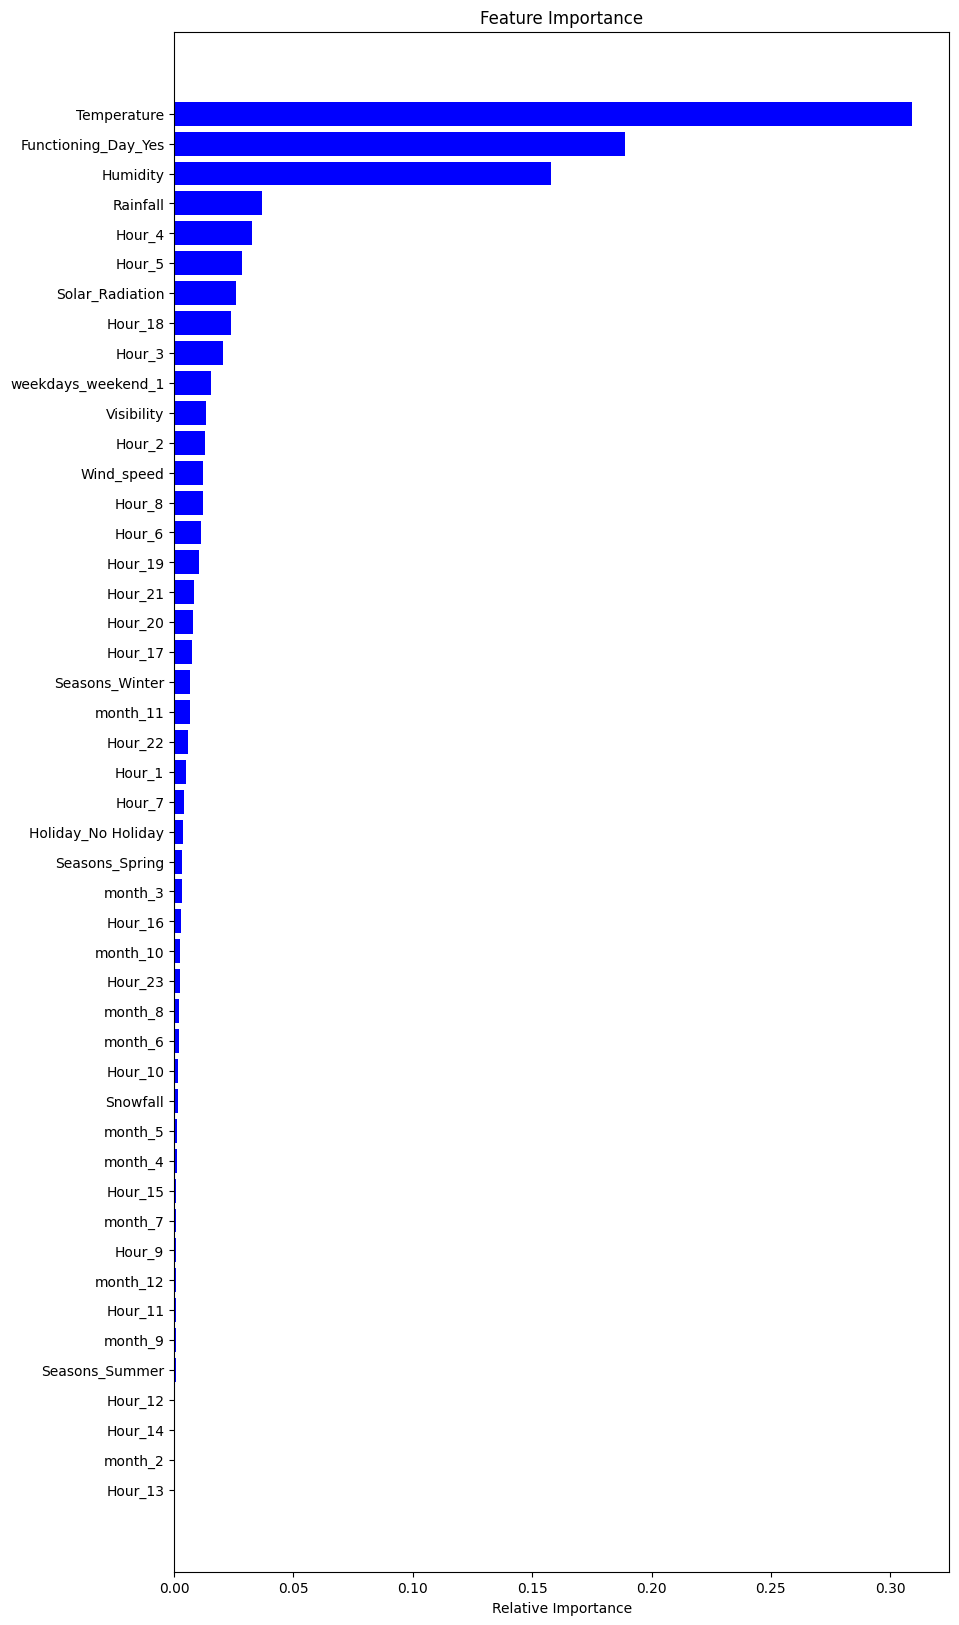

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **XGBOOST**

In [ ]:
#import the packages
import xgboost as xgb

# Create an instance of the XGBRegressor
model = xgb.XGBRegressor()

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("GradientBoostingRegressor", model, X, y)

Model: GradientBoostingRegressor
Mean Absolute Error (Train): 0.882065388447951
Mean Squared Error (Train): 1.603111302150078
Root Mean Squared Error (Train): 1.2661403169278191
R-squared (Train): 0.9838512450423771
Adjusted R-squared (Train): 0.9838212287692216
--------------------------------------------------
Mean Absolute Error (Test): 1.6125757703549672
Mean Squared Error (Test): 6.048535071440029
Root Mean Squared Error (Test): 2.4593769681445807
R-squared (Test): 0.9380839705788023
Adjusted R-squared (Test): 0.9376208472287013



**Looks like our train set's r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

**The r2_score for the test set is 0.94. This means our  is  performing well on the data.



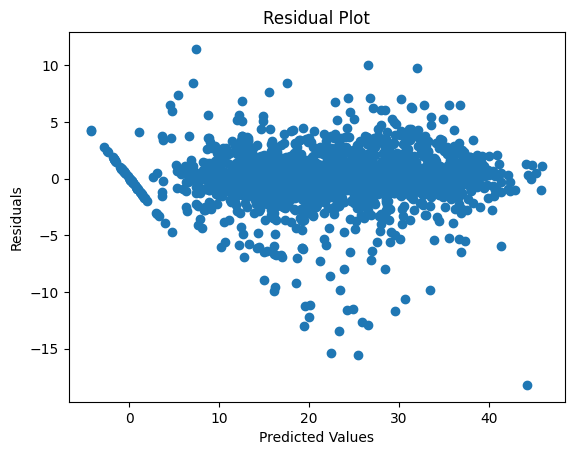

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
model.fit(X_train_transformed,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model.feature_importances_

array([0.00310921, 0.01865498, 0.04506732, 0.07303654, 0.05717413,
       0.01853186, 0.0081023 , 0.01756815, 0.00301855, 0.00946306,
       0.00484187, 0.00085395, 0.00088263, 0.0015411 , 0.00160767,
       0.0044019 , 0.01869837, 0.06219036, 0.04154974, 0.0349136 ,
       0.08986476, 0.05711414, 0.00666107, 0.00806012, 0.00159519,
       0.02011454, 0.00472354, 0.210524  , 0.00141926, 0.00258411,
       0.00149596, 0.0028059 , 0.00912727, 0.00143663, 0.01373414,
       0.00093189, 0.01182979, 0.01553928, 0.00269148, 0.0065872 ,
       0.03275518, 0.01937176, 0.00108604, 0.00157203, 0.00820129,
       0.04041139, 0.00255474], dtype=float32)

## **Features Stored**

In [ ]:
model.fit(X_train_transformed,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
importances = model.feature_importances_

importance_dict = {'Feature' : list(X_train_transformed_df.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
27  Functioning_Day_Yes                0.21
20              Hour_21                0.09
3                Hour_4                0.07
4                Hour_5                0.06
17              Hour_18                0.06
21              Hour_22                0.06
2                Hour_3                0.05
18              Hour_19                0.04
45             Rainfall                0.04
19              Hour_20                0.03
40          Temperature                0.03
41             Humidity                0.02
1                Hour_2                0.02
37             month_11                0.02
25       Seasons_Winter                0.02
7                Hour_8                0.02
5                Hour_6                0.02
16              Hour_17                0.02
36             month_10                0.01
22              Hour_23                0.01
34              month_8                0.01
23       Seasons_Spring                0.01
32              month_6                0.01
39   weekdays_weekend_1                0.01
44      Solar_Radiation                0.01
9               Hour_10                0.01
6                Hour_7                0.01
38             month_12                0.00
42           Wind_speed                0.00
43           Visibility                0.00
35              month_9                0.00
33              month_7                0.00
0                Hour_1                0.00
31              month_5                0.00
30              month_4                0.00
29              month_3                0.00
28              month_2                0.00
26   Holiday_No Holiday                0.00
24       Seasons_Summer                0.00
15              Hour_16                0.00
14              Hour_15                0.00
13              Hour_14                0.00
12              Hour_13                0.00
11              Hour_12                0.00
10              Hour_11                0.00
8                Hour_9                0.00
46             Snowfall                0.00

In [ ]:
features = X_train_transformed_df.columns
importances = model.feature_importances_
indices = np.argsort(importances)

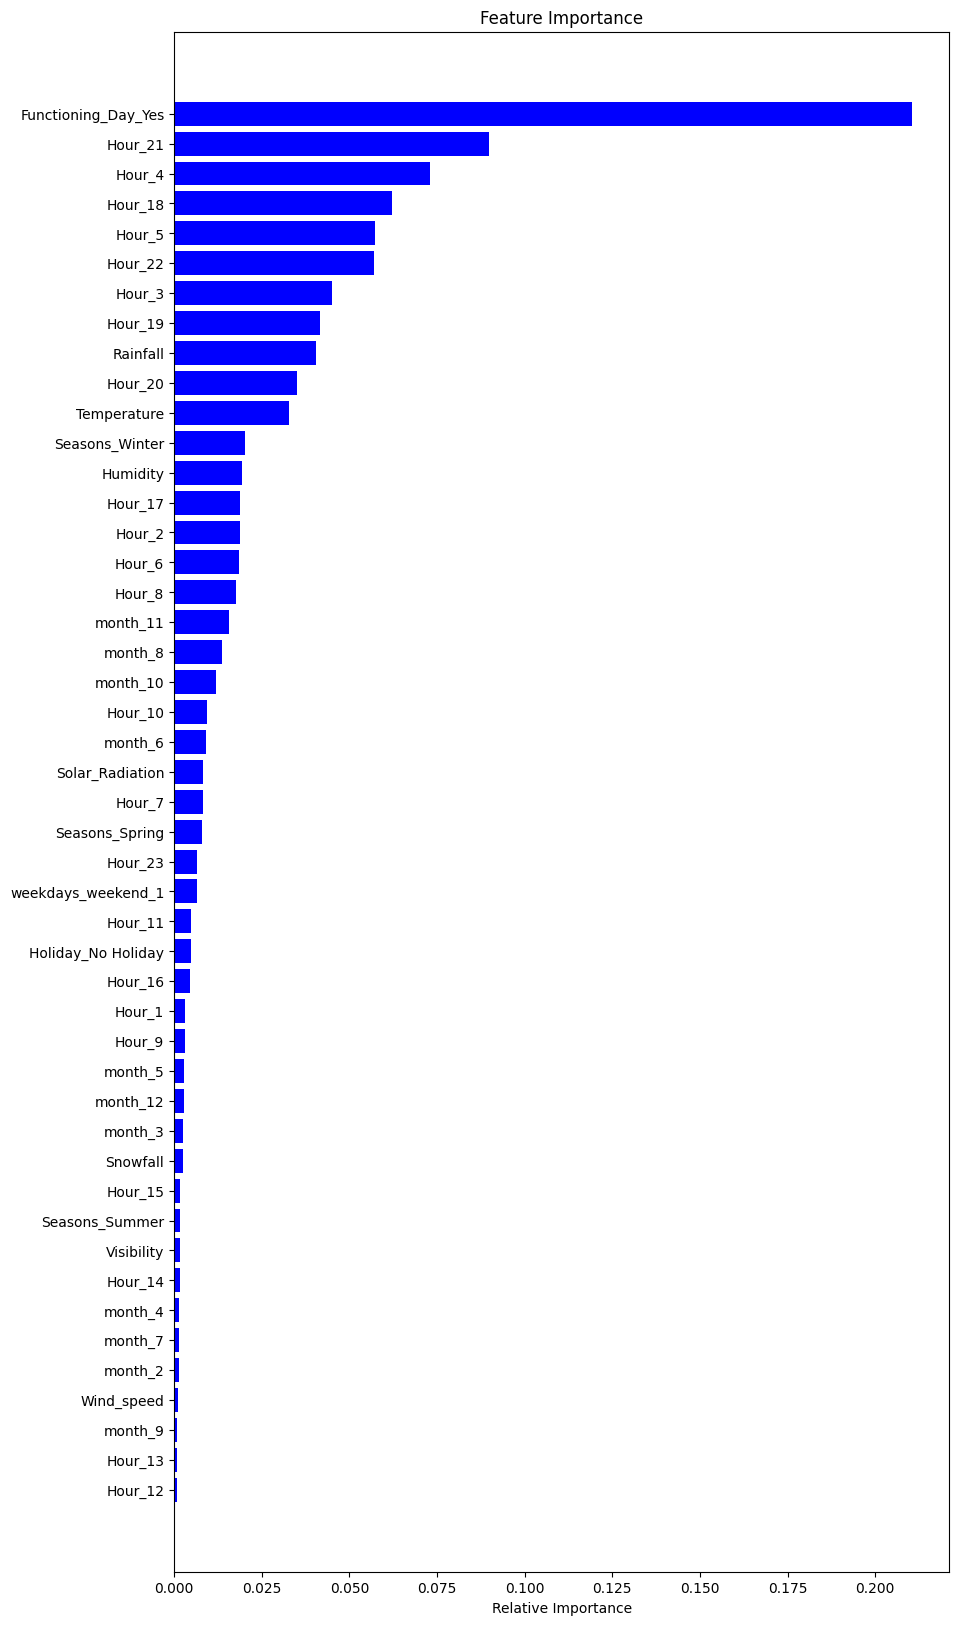

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **GRADIENT BOOSTING**

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


In [ ]:
# Define the model
model= GradientBoostingRegressor()

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("GradientBoostingRegressor", model, X, y)

Model: GradientBoostingRegressor
Mean Absolute Error (Train): 2.5403004845651385
Mean Squared Error (Train): 11.129598294439361
Root Mean Squared Error (Train): 3.33610525829737
R-squared (Train): 0.8878872880550288
Adjusted R-squared (Train): 0.8876789001146107
--------------------------------------------------
Mean Absolute Error (Test): 2.5989824056959074
Mean Squared Error (Test): 11.857527880147565
Root Mean Squared Error (Test): 3.4434761332333297
R-squared (Test): 0.8786200234571679
Adjusted R-squared (Test): 0.8777121179939592



**Looks like our train set's r2 score value is 0.89 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

**The r2_score for the test set is 0.88. This means our  model is  performing well on the data.



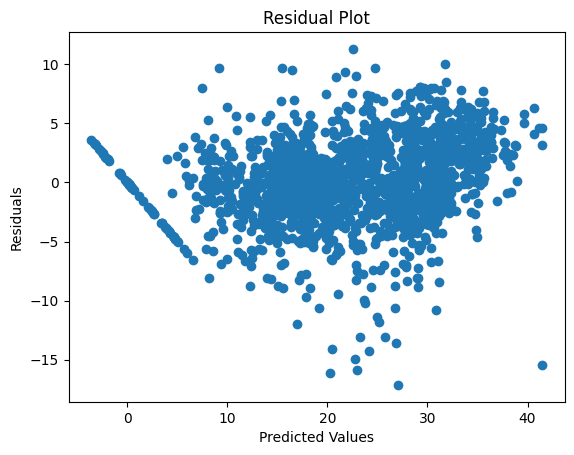

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## **Features Stored**

In [ ]:
gb_model = GradientBoostingRegressor()

In [ ]:
gb_model.fit(X_train_transformed,y_train)

GradientBoostingRegressor()

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train_transformed_df.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
40          Temperature                0.29
27  Functioning_Day_Yes                0.23
41             Humidity                0.12
45             Rainfall                0.07
44      Solar_Radiation                0.05
25       Seasons_Winter                0.04
3                Hour_4                0.03
4                Hour_5                0.03
39   weekdays_weekend_1                0.02
17              Hour_18                0.02
16              Hour_17                0.01
36             month_10                0.01
21              Hour_22                0.01
20              Hour_21                0.01
19              Hour_20                0.01
18              Hour_19                0.01
37             month_11                0.01
7                Hour_8                0.01
5                Hour_6                0.01
2                Hour_3                0.01
1                Hour_2                0.01
34              month_8                0.00
35              month_9                0.00
33              month_7                0.00
0                Hour_1                0.00
31              month_5                0.00
38             month_12                0.00
42           Wind_speed                0.00
43           Visibility                0.00
32              month_6                0.00
23       Seasons_Spring                0.00
30              month_4                0.00
29              month_3                0.00
28              month_2                0.00
26   Holiday_No Holiday                0.00
24       Seasons_Summer                0.00
22              Hour_23                0.00
15              Hour_16                0.00
14              Hour_15                0.00
13              Hour_14                0.00
12              Hour_13                0.00
11              Hour_12                0.00
10              Hour_11                0.00
9               Hour_10                0.00
8                Hour_9                0.00
6                Hour_7                0.00
46             Snowfall                0.00

In [ ]:
features = X_train_transformed_df.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

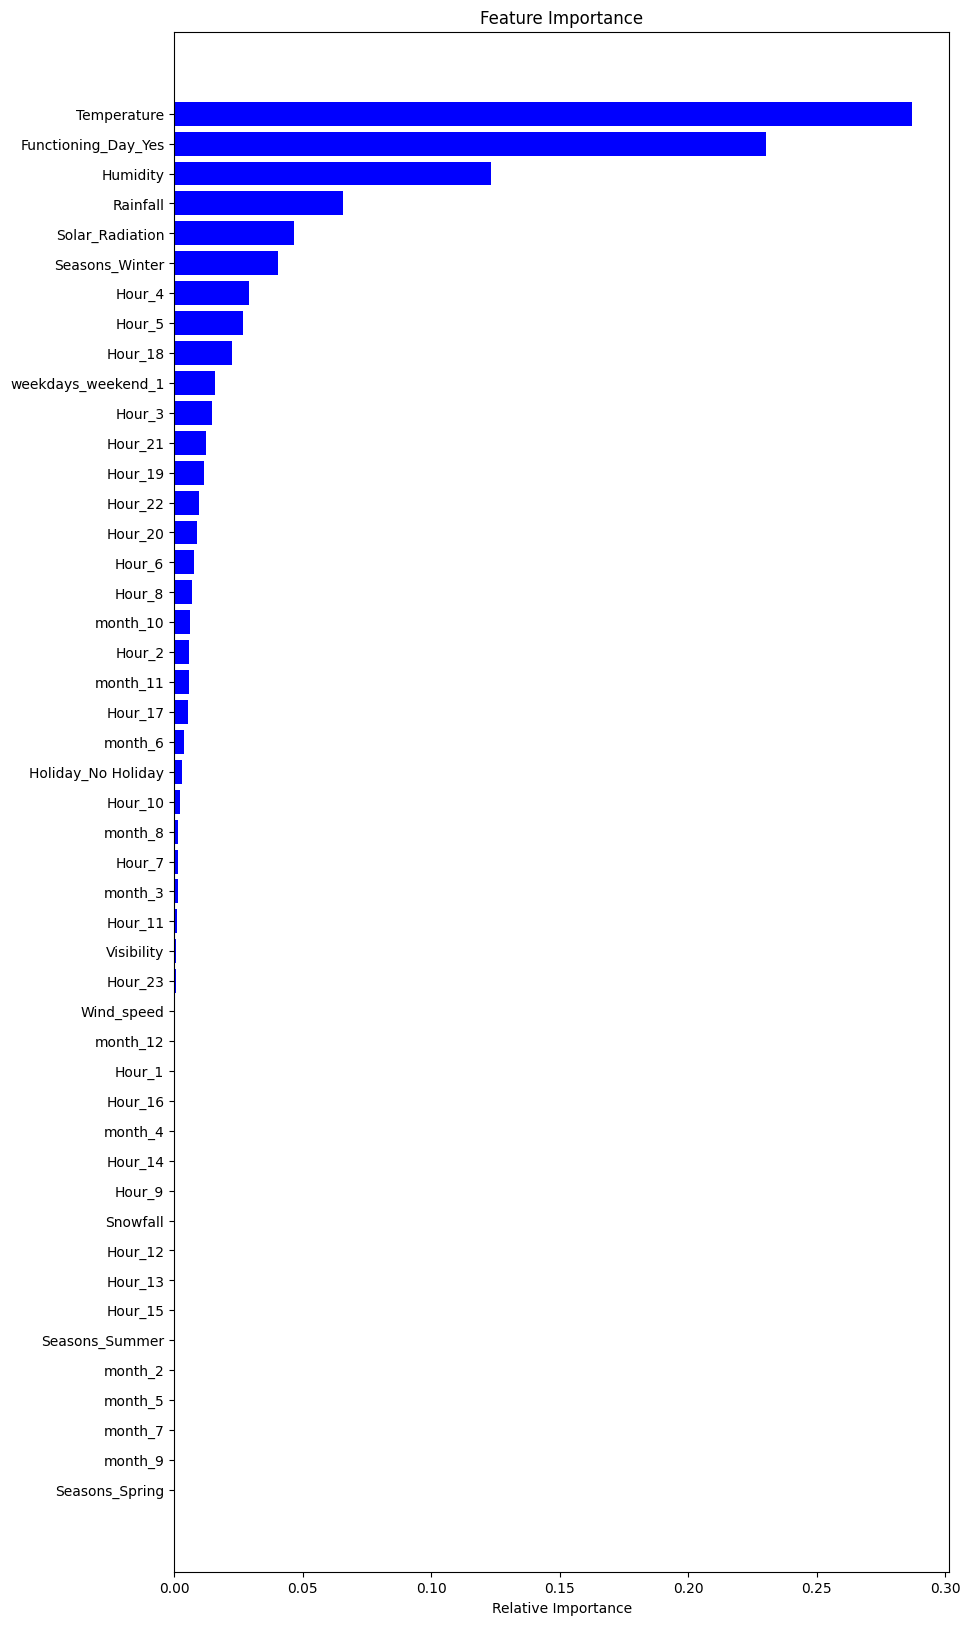

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Hyperparameter tuning**

## **Note :**

- Hyperparameter tuning has been previously conducted for this model
- Uncommenting the code below will rerun hyperparameter tuning,  which may take significant time
- For efficiency, the tuned parameters have been saved for direct use




Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

## **GridSearchCV ,RandomSearchCV and BayesSearchCV**

`BayesSearchCV` is a hyperparameter optimization technique provided by the `scikit-optimize` library, which is an efficient way to tune hyperparameters of machine learning models. Here are some notes on `BayesSearchCV`:

1. **Bayesian Optimization**: `BayesSearchCV` employs Bayesian optimization, which is a probabilistic model-based optimization approach. It builds a probabilistic model of the objective function (such as cross-validation score) and uses it to select the most promising hyperparameters for evaluation.

2. **Efficiency**: Bayesian optimization is particularly useful when the objective function is expensive to evaluate, such as when training machine learning models with large datasets or complex models. It efficiently searches the hyperparameter space by selecting the next set of hyperparameters based on the posterior distribution of the objective function.

3. **Search Space**: It allows defining a search space for hyperparameters using different types of distributions such as `Real` (continuous), `Integer` (discrete), and `Categorical` (categorical).

4. **Scalability**: `BayesSearchCV` is scalable and can handle a large number of hyperparameters and a large search space. It efficiently explores the hyperparameter space and converges to optimal or near-optimal hyperparameters relatively quickly.

5. **Cross-validation**: It performs cross-validation during the search for hyperparameters to estimate the performance of each set of hyperparameters. This ensures that the selected hyperparameters generalize well to unseen data.

6. **Parallelization**: `BayesSearchCV` supports parallelization, allowing it to explore multiple sets of hyperparameters simultaneously. This can significantly reduce the overall optimization time, especially when running on a multi-core CPU or distributed computing environment.

7. **Integration with scikit-learn**: `BayesSearchCV` is compatible with scikit-learn's API, making it easy to integrate into existing machine learning pipelines. It can be used as a drop-in replacement for other hyperparameter search techniques provided by scikit-learn, such as `GridSearchCV` and `RandomizedSearchCV`.

8. **Customization**: It provides options for customizing the optimization process, such as the number of iterations (`n_iter`), the cross-validation strategy (`cv`), verbosity level (`verbose`), and the number of parallel jobs (`n_jobs`).

9. **Best Parameters**: Once the optimization is complete, `BayesSearchCV` returns the best set of hyperparameters found during the search, which can then be used to train the final model.

Overall, `BayesSearchCV` is a powerful and efficient technique for hyperparameter tuning, especially in scenarios where traditional grid search or random search may be inefficient or impractical. It combines the advantages of probabilistic modeling, parallelization, and scikit-learn integration to provide an effective solution for optimizing machine learning models.

## **Gradient Boost Regressor with GridSearchCV**


In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingRegressor

# # Create an instance of the GradientBoostingRegressor
# gb_model = GradientBoostingRegressor()

# # Grid search
# param_dict = {'learning_rate': [0.1, 0.01],
#               'n_estimators': [50, 100],
#               'max_depth': [3, 5]}

# gb_grid = GridSearchCV(estimator=gb_model,
#                        param_grid=param_dict,
#                        cv=5, verbose=2, n_jobs=-1)

# gb_grid.fit(X_train_transformed, y_train)

In [ ]:
# gb_grid.best_estimator_

In [ ]:
# gb_optimal_model = gb_grid.best_estimator_

In [ ]:
# gb_grid.best_params_

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("GradientBoostingRegressor_GridSearchCV", model, X, y)

Model: GradientBoostingRegressor_GridSearchCV
Mean Absolute Error (Train): 1.7202748548920057
Mean Squared Error (Train): 5.72054439694179
Root Mean Squared Error (Train): 2.3917659578106276
R-squared (Train): 0.9423747623970232
Adjusted R-squared (Train): 0.9422676522899545
--------------------------------------------------
Mean Absolute Error (Test): 1.943114630464149
Mean Squared Error (Test): 7.745869217098018
Root Mean Squared Error (Test): 2.7831401720175752
R-squared (Test): 0.920709153427392
Adjusted R-squared (Test): 0.9201160688442828



## **Gradient BoostRegressor with BayesSearchCV**

In [ ]:


# # Create an instance of the GradientBoostingRegressor
# gb_model = GradientBoostingRegressor()

# # Parameter grid for grid search
# param_dict = {
#     'learning_rate': [0.1, 0.01, 0.2],  # Fixed typo here
#     'n_estimators': [50, 100, 110],     # Corrected the range here
#     'max_depth': [4, 5, 6],
#     'min_samples_split': Integer(2, 10),  # Add min_samples_split as an integer range
#     'min_samples_leaf': Integer(1, 5),     # Add min_samples_leaf as an integer range
#     'subsample': Real(0.5, 1.0, prior='uniform'),  # Add subsample as a real-valued range
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Bayesian search
# gb_bayesian = BayesSearchCV(estimator=gb_model,
#                              search_spaces=param_dict,
#                              n_iter=50, cv=5, verbose=2, n_jobs=-1)

# gb_bayesian.fit(X_train_transformed, y_train)

# # Get the best parameters
# best_params = gb_bayesian.best_params_
# print("Best parameters for GradientBoostingRegressor:", best_params)


In [ ]:
# Define hyperparameters
params = {
    'learning_rate': 0.2,
    'max_depth': 6,
    'max_features': 'auto',
    'min_samples_leaf': 5,
    'min_samples_split': 10,
    'n_estimators': 110,
    'subsample': 1.0
}

# Define the GradientBoostingRegressor model with specified hyperparameters
model_gb_B_search_cv = GradientBoostingRegressor(**params)
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("GradientBoostingRegressor_BayesSearchCV", model_gb_B_search_cv, X, y)

Model: GradientBoostingRegressor_BayesSearchCV
Mean Absolute Error (Train): 1.0423661114270695
Mean Squared Error (Train): 2.32127059750741
Root Mean Squared Error (Train): 1.5235716581465442
R-squared (Train): 0.9766169510381427
Adjusted R-squared (Train): 0.9765734881218567
--------------------------------------------------
Mean Absolute Error (Test): 1.649465075041064
Mean Squared Error (Test): 6.1679401382048065
Root Mean Squared Error (Test): 2.4835338004957386
R-squared (Test): 0.9368616766614278
Adjusted R-squared (Test): 0.9363894107216111



In [ ]:
model_gb_B_search_cv.fit(X_train_transformed,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_features='auto',
                          min_samples_leaf=5, min_samples_split=10,
                          n_estimators=110)

In [ ]:
model_gb_B_search_cv

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_features='auto',
                          min_samples_leaf=5, min_samples_split=10,
                          n_estimators=110)

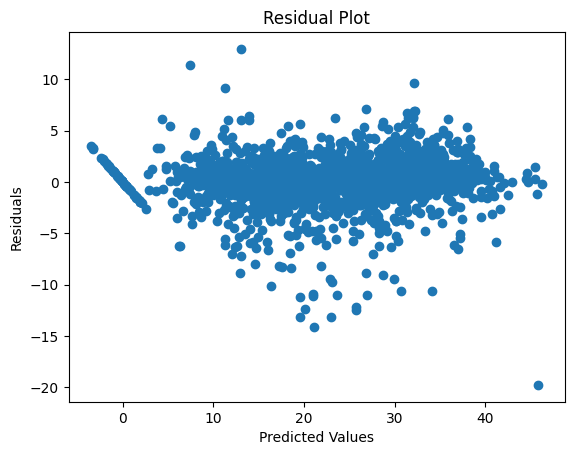

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
model_gb_B_search_cv.feature_importances_

array([7.84554389e-04, 6.11552836e-03, 1.63929388e-02, 3.07669770e-02,
       2.82687533e-02, 7.63699735e-03, 6.48862811e-03, 1.07070384e-02,
       8.70529867e-04, 2.34153026e-03, 1.72195838e-03, 2.46080780e-04,
       1.77882307e-04, 1.54612954e-04, 5.31280280e-04, 1.04715454e-03,
       6.56287701e-03, 2.37501866e-02, 1.24787662e-02, 1.04655912e-02,
       1.19918605e-02, 7.67166160e-03, 1.84395179e-03, 5.21100718e-03,
       1.78318697e-03, 1.63548613e-02, 4.11274906e-03, 2.00684386e-01,
       3.55233330e-04, 1.40678556e-03, 4.22596687e-04, 7.26716493e-04,
       3.68122733e-03, 2.01545603e-03, 4.17654789e-03, 3.61236963e-04,
       5.74465086e-03, 5.78569036e-03, 1.36722624e-03, 2.03209186e-02,
       2.92722284e-01, 1.47831982e-01, 6.35332849e-03, 7.88926493e-03,
       2.55938995e-02, 5.46677882e-02, 1.41363649e-03])

## Features Stored TunedGradientBoostingRegressor

In [ ]:
importances = model_gb_B_search_cv.feature_importances_

importance_dict = {'Feature' : list(X_train_transformed_df.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
feature_importance_df_list = []
tuned_GBR_feature_importance = importance_df
feature_importance_df_list.append(tuned_GBR_feature_importance)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
40          Temperature                0.29
27  Functioning_Day_Yes                0.20
41             Humidity                0.15
45             Rainfall                0.05
44      Solar_Radiation                0.03
4                Hour_5                0.03
3                Hour_4                0.03
25       Seasons_Winter                0.02
2                Hour_3                0.02
39   weekdays_weekend_1                0.02
17              Hour_18                0.02
36             month_10                0.01
1                Hour_2                0.01
18              Hour_19                0.01
37             month_11                0.01
21              Hour_22                0.01
20              Hour_21                0.01
19              Hour_20                0.01
23       Seasons_Spring                0.01
16              Hour_17                0.01
42           Wind_speed                0.01
43           Visibility                0.01
7                Hour_8                0.01
6                Hour_7                0.01
5                Hour_6                0.01
33              month_7                0.00
34              month_8                0.00
38             month_12                0.00
35              month_9                0.00
31              month_5                0.00
32              month_6                0.00
0                Hour_1                0.00
30              month_4                0.00
29              month_3                0.00
28              month_2                0.00
26   Holiday_No Holiday                0.00
24       Seasons_Summer                0.00
22              Hour_23                0.00
15              Hour_16                0.00
14              Hour_15                0.00
13              Hour_14                0.00
12              Hour_13                0.00
11              Hour_12                0.00
10              Hour_11                0.00
9               Hour_10                0.00
8                Hour_9                0.00
46             Snowfall                0.00

In [ ]:
features = X_train_transformed_df.columns
importances = model_gb_B_search_cv.feature_importances_
indices = np.argsort(importances)

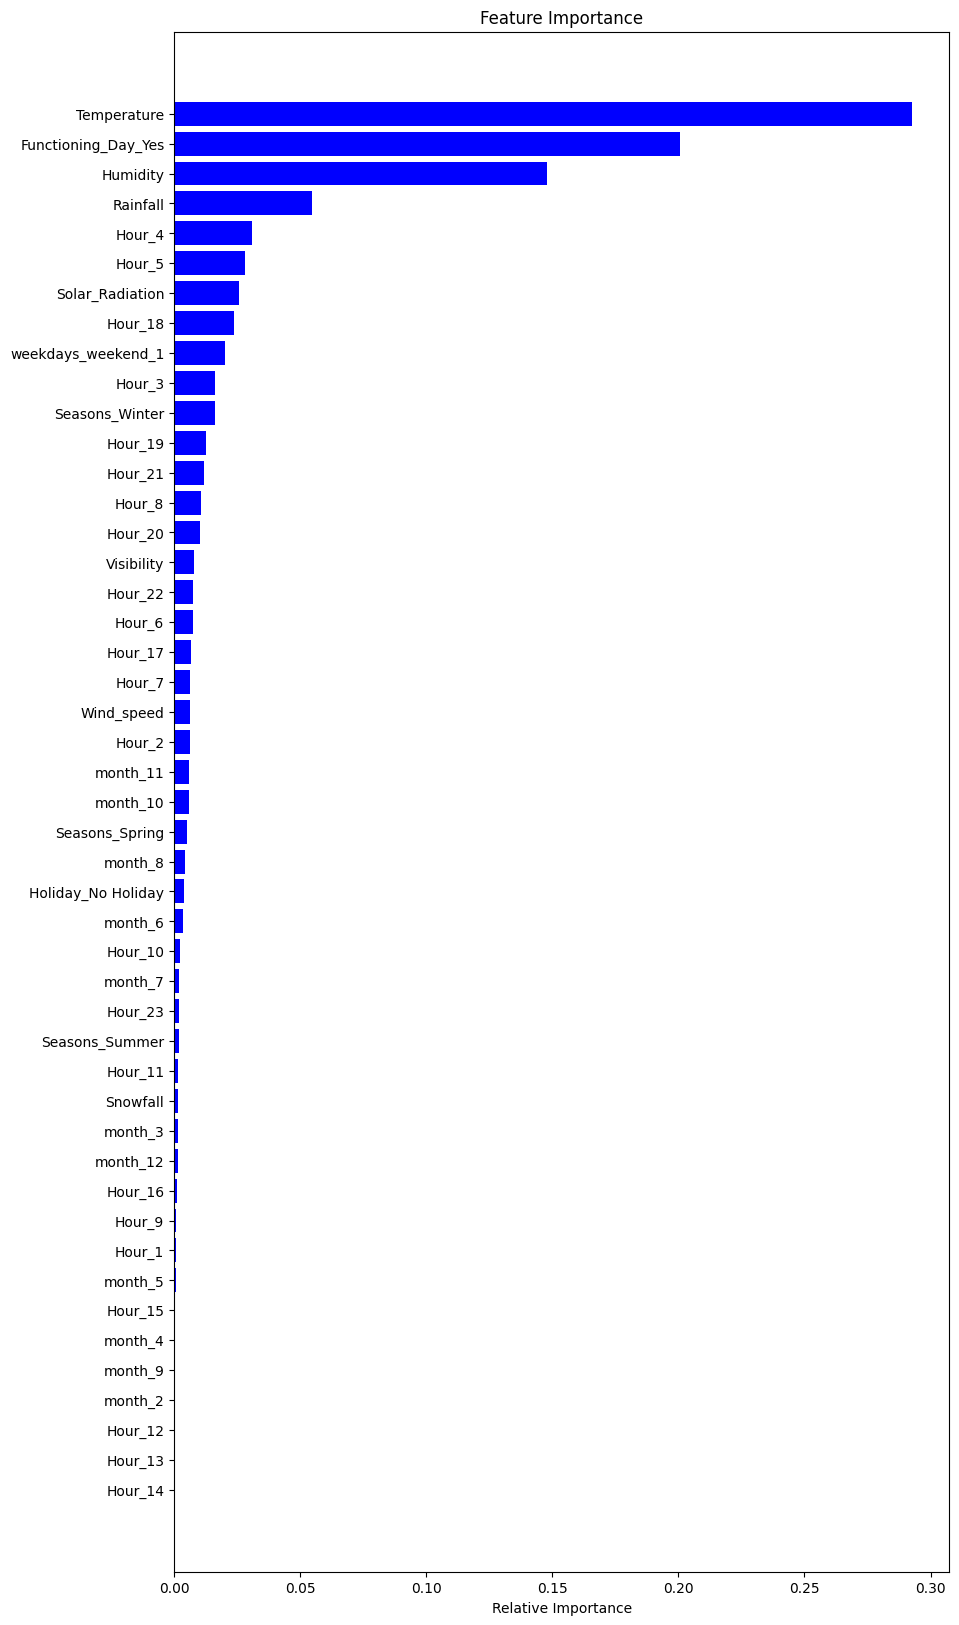

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **RandomForest with RandomSearchCV**

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # Create an instance of the RandomForestRegressor
# rf_model = RandomForestRegressor()

# # Define the hyperparameter grid
# param_dict = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Randomized search
# rf_random = RandomizedSearchCV(estimator=rf_model,
#                                param_distributions=param_dict,
#                                n_iter=100, cv=5, verbose=2,
#                                random_state=42, n_jobs=-1)

# # Fit the randomized search
# rf_random.fit(X_train_transformed, y_train)

# # Get the best parameters
# best_params = rf_random.best_params_
# print("Best parameters for RandomForestRegressor:", best_params)


In [ ]:

params = {
    'n_estimators': 500,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_features': 'auto',
    'max_depth': None
}

# Create the RandomForestRegressor instance with the specified parameters
RandomForestRegressor_RandomSearch = RandomForestRegressor(**params)
# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("RandomForestRegressor_RandomSearch", RandomForestRegressor_RandomSearch, X, y)

Model: RandomForestRegressor_RandomSearch
Mean Absolute Error (Train): 0.7726075028961082
Mean Squared Error (Train): 1.4609600261302733
Root Mean Squared Error (Train): 1.2087017937151716
R-squared (Train): 0.9852831893623244
Adjusted R-squared (Train): 0.9852558346957117
--------------------------------------------------
Mean Absolute Error (Test): 1.6411008449908955
Mean Squared Error (Test): 6.339445833091665
Root Mean Squared Error (Test): 2.517825616100461
R-squared (Test): 0.9351060529401307
Adjusted R-squared (Test): 0.9346206551773124



## Features Stored TunedRandomForest

In [ ]:
importances = RandomForestRegressor_RandomSearch.feature_importances_

importance_dict = {'Feature' : list(X_train_transformed_df.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:

tuned_RF_feature_importance = importance_df
feature_importance_df_list.append(tuned_RF_feature_importance)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
40          Temperature                0.31
27  Functioning_Day_Yes                0.19
41             Humidity                0.15
45             Rainfall                0.04
3                Hour_4                0.03
4                Hour_5                0.03
44      Solar_Radiation                0.03
2                Hour_3                0.02
17              Hour_18                0.02
39   weekdays_weekend_1                0.02
21              Hour_22                0.01
20              Hour_21                0.01
19              Hour_20                0.01
18              Hour_19                0.01
16              Hour_17                0.01
37             month_11                0.01
25       Seasons_Winter                0.01
42           Wind_speed                0.01
43           Visibility                0.01
7                Hour_8                0.01
5                Hour_6                0.01
1                Hour_2                0.01
33              month_7                0.00
34              month_8                0.00
0                Hour_1                0.00
35              month_9                0.00
36             month_10                0.00
31              month_5                0.00
38             month_12                0.00
32              month_6                0.00
23       Seasons_Spring                0.00
30              month_4                0.00
29              month_3                0.00
28              month_2                0.00
26   Holiday_No Holiday                0.00
24       Seasons_Summer                0.00
22              Hour_23                0.00
15              Hour_16                0.00
14              Hour_15                0.00
13              Hour_14                0.00
12              Hour_13                0.00
11              Hour_12                0.00
10              Hour_11                0.00
9               Hour_10                0.00
8                Hour_9                0.00
6                Hour_7                0.00
46             Snowfall                0.00

In [ ]:
features = X_train_transformed_df.columns
importances = RandomForestRegressor_RandomSearch.feature_importances_
indices = np.argsort(importances)

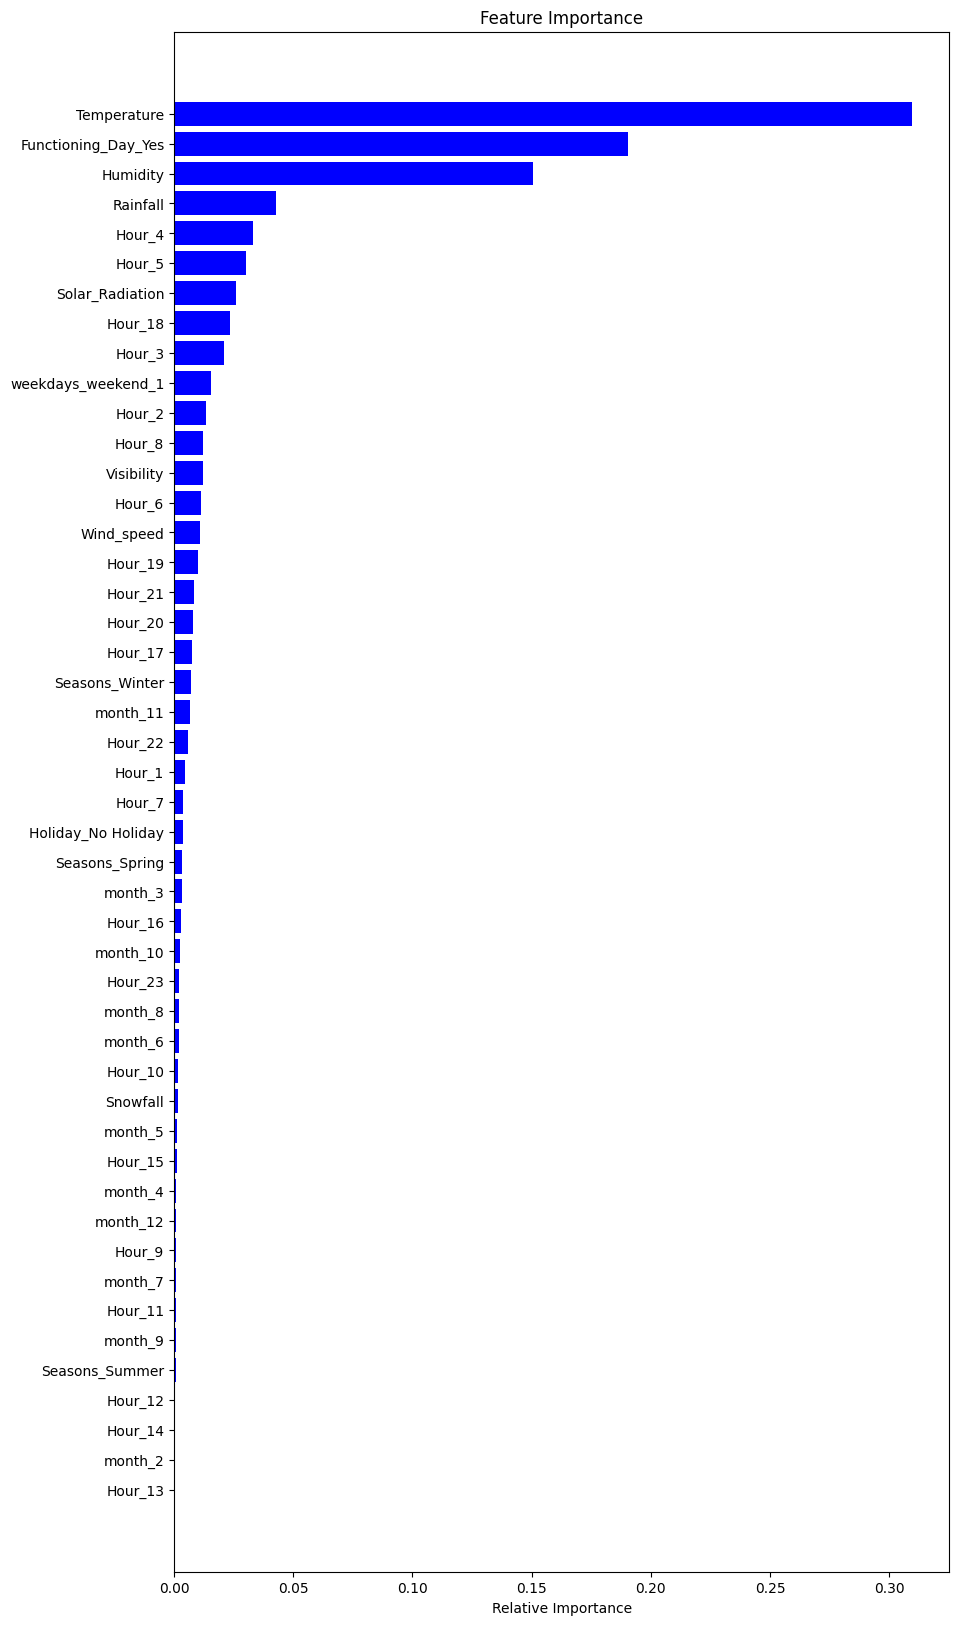

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **XGBoostRegressor with BayesSearchCV**

In [ ]:
# from skopt import BayesSearchCV
# import xgboost as xgb

# # Define the parameter search space
# param_space = {
#     'n_estimators': (100, 2000),
#     'max_depth': (3, 10),
#     'learning_rate': (0.01, 0.1, 'log-uniform'),
#     'subsample': (0.6, 0.8),
#     'colsample_bytree': (0.8, 1.0),
#     'min_child_weight': (1, 10),
#     'gamma': (0, 5),  # Add gamma
#     'reg_alpha': (0, 1),
#     'reg_lambda': (0, 1)
# }

# # Define the XGBRegressor model
# xgb_model = xgb.XGBRegressor()

# # Perform Bayesian optimization
# bayes_search = BayesSearchCV(estimator=xgb_model,
#                              search_spaces=param_space,
#                              n_iter=50,  # adjust as needed
#                              cv=5,  # cross-validation folds
#                              random_state=0,
#                              verbose=2,
#                              n_jobs=-1)

# # Fit the Bayesian search
# bayes_search.fit(X_train_transformed, y_train)

# # Get the best model and best parameters
# best_model = bayes_search.best_estimator_
# best_params = bayes_search.best_params_

# # Print the best parameters
# print("Best parameters:", best_params)


In [ ]:
import xgboost as xgb

# Define hyperparameters
params = {
    'colsample_bytree': 1.0,
    'gamma': 0,
    'learning_rate': 0.022495259692763524,
    'max_depth': 8,
    'min_child_weight': 1,
    'n_estimators': 1691,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'subsample': 0.6
}

# Define the XGBRegressor model with specified hyperparameters
model_xgb_B_search_cv = xgb.XGBRegressor(**params)

# Call the function to evaluate the model
test_metrics, train_metrics, y_pred_test, y_test, lambda__= evaluate_model("XGBRegressor_BayesSearchCV", model_xgb_B_search_cv, X, y)

Model: XGBRegressor_BayesSearchCV
Mean Absolute Error (Train): 0.3008170417117568
Mean Squared Error (Train): 0.16955327943331344
Root Mean Squared Error (Train): 0.4117684779500653
R-squared (Train): 0.9982920247906945
Adjusted R-squared (Train): 0.9982888501155842
--------------------------------------------------
Mean Absolute Error (Test): 1.4509321078707003
Mean Squared Error (Test): 5.16334926770322
Root Mean Squared Error (Test): 2.2723004351764797
R-squared (Test): 0.947145204351949
Adjusted R-squared (Test): 0.9467498577792076



**Looks like our train set's r2 score value is 0.998 that means our model is  able to capture most of the data variance..**

Hyperparameter tunning certainly showed a better result, r2 was 0.947 on test and mae and rmse was lowered. Overall model show good result.

## Features Stored TunedXGBoostRegressor

In [ ]:
importances = model_xgb_B_search_cv.feature_importances_

importance_dict = {'Feature' : list(X_train_transformed_df.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:

tuned_XGBR_feature_importance = importance_df
feature_importance_df_list.append(tuned_XGBR_feature_importance)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
27  Functioning_Day_Yes                0.29
3                Hour_4                0.07
4                Hour_5                0.06
45             Rainfall                0.06
17              Hour_18                0.05
2                Hour_3                0.04
20              Hour_21                0.03
19              Hour_20                0.03
18              Hour_19                0.03
25       Seasons_Winter                0.03
40          Temperature                0.03
41             Humidity                0.02
1                Hour_2                0.02
16              Hour_17                0.02
7                Hour_8                0.02
5                Hour_6                0.02
21              Hour_22                0.02
26   Holiday_No Holiday                0.01
22              Hour_23                0.01
37             month_11                0.01
29              month_3                0.01
36             month_10                0.01
32              month_6                0.01
34              month_8                0.01
39   weekdays_weekend_1                0.01
44      Solar_Radiation                0.01
9               Hour_10                0.01
6                Hour_7                0.01
38             month_12                0.00
42           Wind_speed                0.00
43           Visibility                0.00
35              month_9                0.00
0                Hour_1                0.00
23       Seasons_Spring                0.00
33              month_7                0.00
31              month_5                0.00
30              month_4                0.00
28              month_2                0.00
24       Seasons_Summer                0.00
15              Hour_16                0.00
14              Hour_15                0.00
13              Hour_14                0.00
12              Hour_13                0.00
11              Hour_12                0.00
10              Hour_11                0.00
8                Hour_9                0.00
46             Snowfall                0.00

In [ ]:
features = X_train_transformed_df.columns
importances = model_xgb_B_search_cv.feature_importances_
indices = np.argsort(importances)

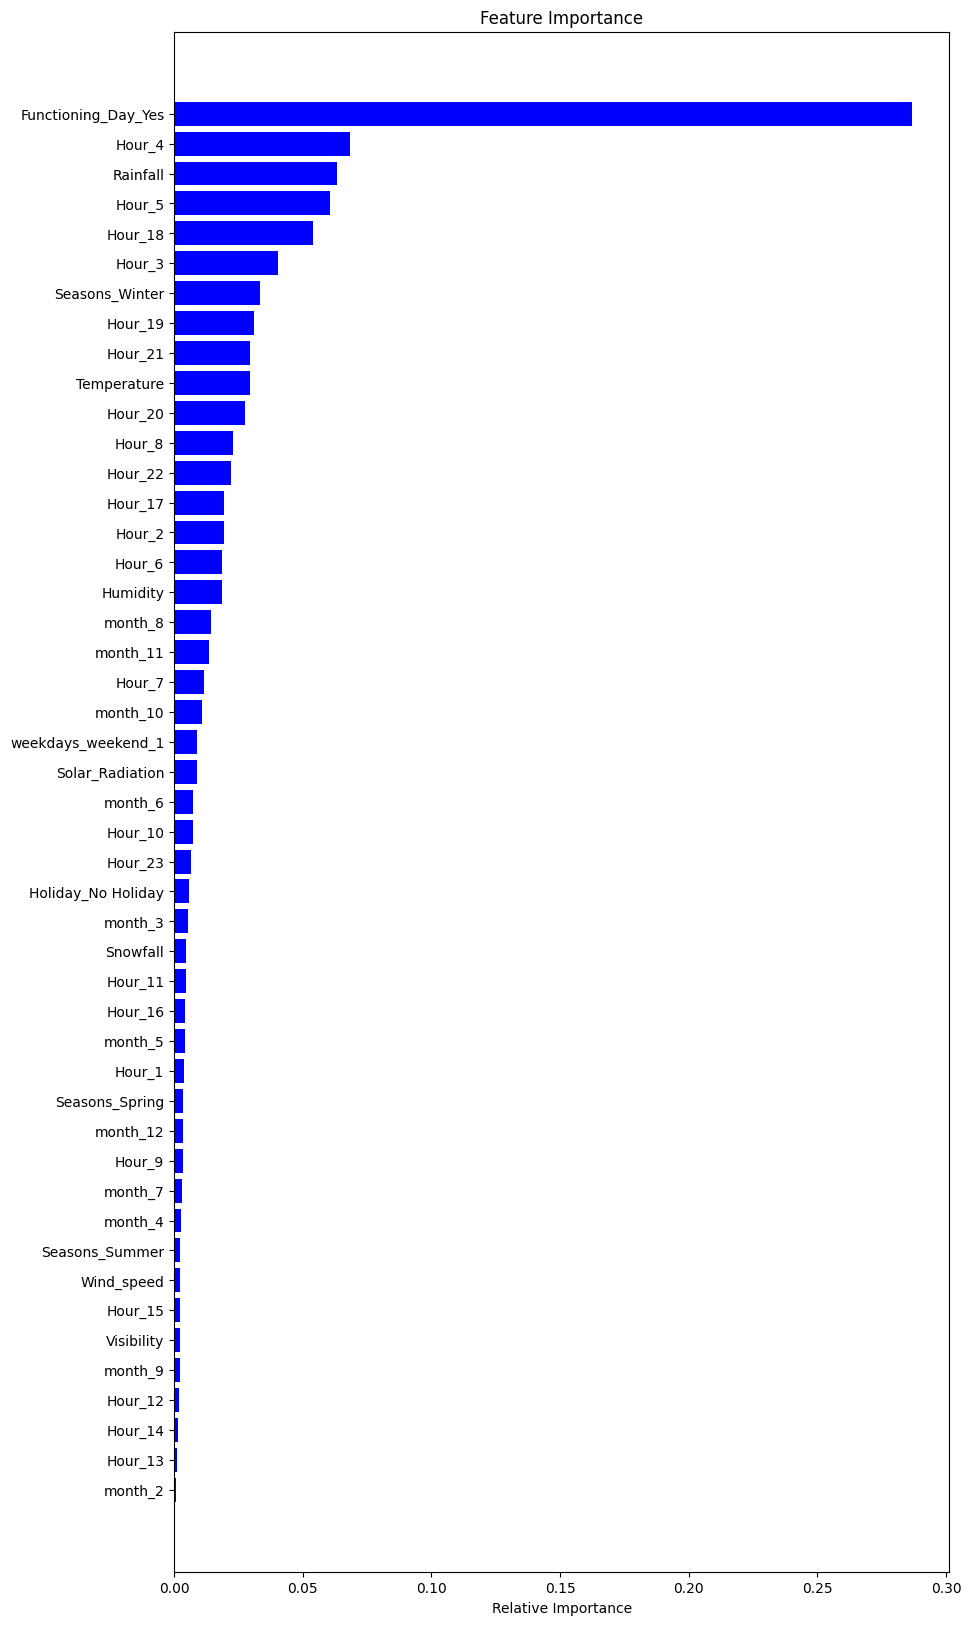

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Pickle file**

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Import pickle
import pickle

# Save the best model (XGB)
pickle.dump(model_xgb_B_search_cv, open('xgbmodel.pkl', 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
pickled_model = pickle.load(open('xgbmodel.pkl', 'rb'))

instance = X_test_transformed[50, :].reshape(1, -1)

# Testing on one instance
pickled_model.predict(instance)

array([29.858164], dtype=float32)

### **Model is successfully created and ready for deployment on a live server for a real user interaction.**

# **Conclusion**

### **Results**

In [ ]:
import pandas as pd

# Add a new column 'Set' to indicate whether it's from the training or testing set
for df_train in models_train_res_list:
    df_train['Set'] = 'Train'

for df_test in models_test_res_list:
    df_test['Set'] = 'Test'

# Concatenate DataFrames vertically within each list
train_df = pd.concat(models_train_res_list, ignore_index=True)
test_df = pd.concat(models_test_res_list, ignore_index=True)



In [ ]:
train_df.sort_values(by = 'R-squared',ascending = False)


Model           MAE           MSE  \
4                        decision_regressor  3.802134e-19  3.376973e-34   
11               XGBRegressor_BayesSearchCV  3.008170e-01  1.695533e-01   
5                     RandomForestRegressor  6.365115e-01  1.003930e+00   
10       RandomForestRegressor_RandomSearch  7.726075e-01  1.460960e+00   
6                 GradientBoostingRegressor  8.820654e-01  1.603111e+00   
9   GradientBoostingRegressor_BayesSearchCV  1.042366e+00  2.321271e+00   
8    GradientBoostingRegressor_GridSearchCV  1.720275e+00  5.720544e+00   
7                 GradientBoostingRegressor  2.540300e+00  1.112960e+01   
2                                     Ridge  3.206133e+00  1.837032e+01   
0                          LinearRegression  3.205424e+00  1.837273e+01   
3                                ElasticNet  4.544471e+00  3.559271e+01   
1                                     lasso  6.005899e+00  6.226589e+01   

            RMSE  R-squared  Adjusted R-squared    Set  
4   1.837654e-17   1.000000            1.000000  Train  
11  4.117685e-01   0.998292            0.998289  Train  
5   1.001963e+00   0.989887            0.989868  Train  
10  1.208702e+00   0.985283            0.985256  Train  
6   1.266140e+00   0.983851            0.983821  Train  
9   1.523572e+00   0.976617            0.976573  Train  
8   2.391766e+00   0.942375            0.942268  Train  
7   3.336105e+00   0.887887            0.887679  Train  
2   4.286061e+00   0.814949            0.814605  Train  
0   4.286343e+00   0.814924            0.814580  Train  
3   5.965963e+00   0.641461            0.640795  Train  
1   7.890874e+00   0.372772            0.371606  Train

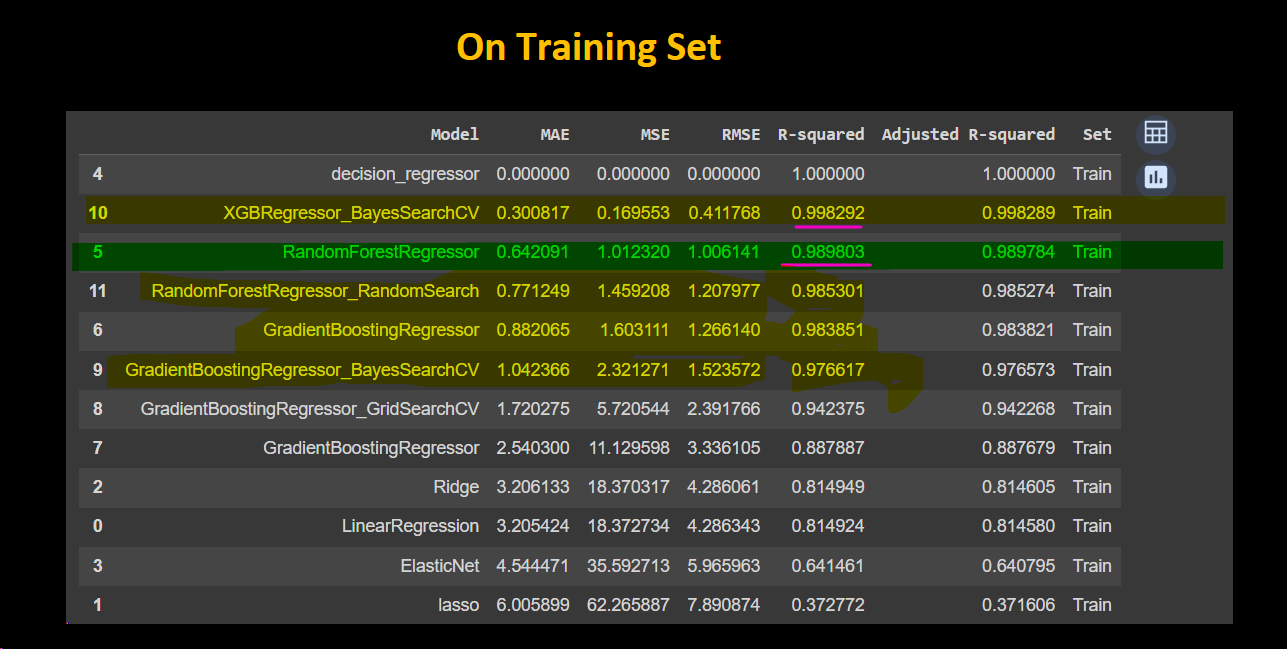

In [ ]:
test_df.sort_values(by = 'R-squared',ascending = False)


Model       MAE        MSE      RMSE  \
11               XGBRegressor_BayesSearchCV  1.450932   5.163349  2.272300   
6                 GradientBoostingRegressor  1.612576   6.048535  2.459377   
9   GradientBoostingRegressor_BayesSearchCV  1.649465   6.167940  2.483534   
10       RandomForestRegressor_RandomSearch  1.641101   6.339446  2.517826   
5                     RandomForestRegressor  1.641610   6.359509  2.521807   
8    GradientBoostingRegressor_GridSearchCV  1.943115   7.745869  2.783140   
7                 GradientBoostingRegressor  2.598982  11.857528  3.443476   
4                        decision_regressor  2.388326  16.027591  4.003447   
2                                     Ridge  3.158712  17.730352  4.210742   
0                          LinearRegression  3.160883  17.755603  4.213740   
3                                ElasticNet  4.426389  33.462332  5.784663   
1                                     lasso  5.876375  59.275839  7.699080   

    R-squared  Adjusted R-squared   Set  
11   0.947145            0.946750  Test  
6    0.938084            0.937621  Test  
9    0.936862            0.936389  Test  
10   0.935106            0.934621  Test  
5    0.934901            0.934414  Test  
8    0.920709            0.920116  Test  
7    0.878620            0.877712  Test  
4    0.835933            0.834706  Test  
2    0.818503            0.817145  Test  
0    0.818244            0.816885  Test  
3    0.657462            0.654900  Test  
1    0.393221            0.388682  Test

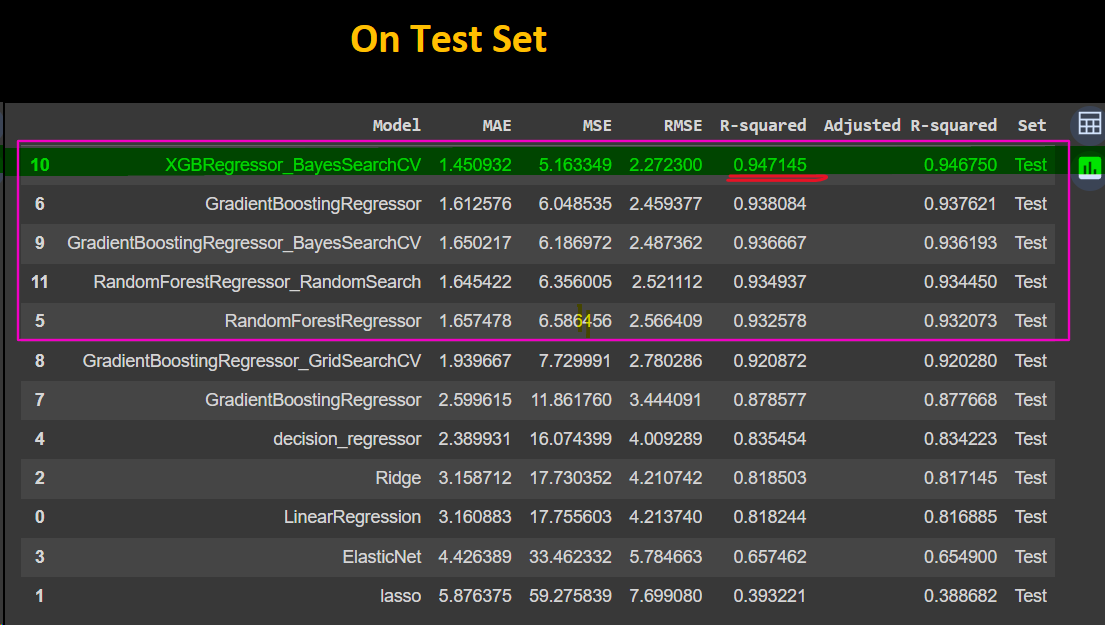

Based on the sorted R-squared values:

**For the Test Set:**
1. **XGBRegressor_BayesSearchCV** has the highest R-squared value of 0.947145, indicating a strong fit of the model to the test data.
2. Following closely is **GradientBoostingRegressor** with a slightly lower R-squared value of 0.938084.
3. The worst-performing models on the test set are **ElasticNet** and **lasso** with R-squared values of 0.657462 and 0.393221, respectively.

**For the Training Set:**
1. **decision_regressor** has a perfect R-squared value of 1.000000, which might indicate overfitting as it performed exceptionally well on the training data.
2. **XGBRegressor_BayesSearchCV** follows with a very high R-squared value of 0.998292, suggesting strong performance on the training data.
3. **ElasticNet** and **lasso** have the lowest R-squared values on the training set, indicating poor performance compared to other models.

**Conclusion:**
- **XGBRegressor_BayesSearchCV** appears to be the most promising model as it performs well on both the test and training sets, with high R-squared values indicating good fit to the data.
- Models like **GradientBoostingRegressor** and **RandomForestRegressor** also show promising performance, although they might require further optimization or regularization to avoid overfitting.
- **ElasticNet** and **lasso** seem to struggle with both the test and training data, indicating that they might not be suitable for this particular dataset without further tuning or feature engineering.

In summary, **XGBRegressor_BayesSearchCV** seems to be the best-performing model based on the provided R-squared values, exhibiting strong performance on both the training and test sets.

In [ ]:
import pandas as pd

# Assuming feature_importance_df_list is a list containing your DataFrames

# Example:
# feature_importance_df_list = [df1, df2, df3, ...]

# Initialize merged_df with the first DataFrame in the list
merged_df = feature_importance_df_list[0]

# Merge all DataFrames in feature_importance_df_list on the 'Feature' column
for df in feature_importance_df_list[1:]:
    merged_df = pd.merge(merged_df, df, on='Feature', how='outer')

# Resulting merged DataFrame will contain all features from all DataFrames


In [ ]:
# Renaming the columns
Feature_imprtance_df = merged_df.rename(columns={
    'Feature Importance_x': 'tuned_GBR_feature_importance',
    'Feature Importance_y': 'tuned_XGBR_feature_importance',
    'Feature Importance': 'tuned_RF_feature_importance'
})


In [ ]:
# Calculate mean across each row for all numeric columns except the first one
mean_values = Feature_imprtance_df.iloc[:, 1:].mean(axis=1)

# Create a new DataFrame with the first column and the mean values
avg_feature_importance = pd.DataFrame({
    'Feature': Feature_imprtance_df['Feature'],  # Keep the first column
    'Mean': mean_values  # Add a new column with mean values
})




In [ ]:
avg_feature_importance.sort_values(by='Mean',ascending = False).head()


Feature      Mean
27  Functioning_Day_Yes  0.226667
40          Temperature  0.210000
41             Humidity  0.106667
45             Rainfall  0.050000
3                Hour_4  0.043333

In [ ]:
# Sum across the specified columns and assign to a new column 'all_zero'
Feature_imprtance_df['all_zero'] = Feature_imprtance_df[['tuned_GBR_feature_importance', 'tuned_XGBR_feature_importance', 'tuned_RF_feature_importance']].sum(axis=1)


In [ ]:
Feature_imprtance_df[Feature_imprtance_df['all_zero']!=0]

Feature  tuned_GBR_feature_importance  \
1                Hour_2                          0.01   
2                Hour_3                          0.02   
3                Hour_4                          0.03   
4                Hour_5                          0.03   
5                Hour_6                          0.01   
6                Hour_7                          0.01   
7                Hour_8                          0.01   
9               Hour_10                          0.00   
16              Hour_17                          0.01   
17              Hour_18                          0.02   
18              Hour_19                          0.01   
19              Hour_20                          0.01   
20              Hour_21                          0.01   
21              Hour_22                          0.01   
22              Hour_23                          0.00   
23       Seasons_Spring                          0.01   
25       Seasons_Winter                          0.02   
26   Holiday_No Holiday                          0.00   
27  Functioning_Day_Yes                          0.20   
29              month_3                          0.00   
32              month_6                          0.00   
34              month_8                          0.00   
36             month_10                          0.01   
37             month_11                          0.01   
39   weekdays_weekend_1                          0.02   
40          Temperature                          0.29   
41             Humidity                          0.15   
42           Wind_speed                          0.01   
43           Visibility                          0.01   
44      Solar_Radiation                          0.03   
45             Rainfall                          0.05   

    tuned_XGBR_feature_importance  tuned_RF_feature_importance  all_zero  
1                            0.01                         0.02      0.04  
2                            0.02                         0.04      0.08  
3                            0.03                         0.07      0.13  
4                            0.03                         0.06      0.12  
5                            0.01                         0.02      0.04  
6                            0.00                         0.01      0.02  
7                            0.01                         0.02      0.04  
9                            0.00                         0.01      0.01  
16                           0.01                         0.02      0.04  
17                           0.02                         0.05      0.09  
18                           0.01                         0.03      0.05  
19                           0.01                         0.03      0.05  
20                           0.01                         0.03      0.05  
21                           0.01                         0.02      0.04  
22                           0.00                         0.01      0.01  
23                           0.00                         0.00      0.01  
25                           0.01                         0.03      0.06  
26                           0.00                         0.01      0.01  
27                           0.19                         0.29      0.68  
29                           0.00                         0.01      0.01  
32                           0.00                         0.01      0.01  
34                           0.00                         0.01      0.01  
36                           0.00                         0.01      0.02  
37                           0.01                         0.01      0.03  
39                           0.02                         0.01      0.05  
40                           0.31                         0.03      0.63  
41                           0.15                         0.02      0.32  
42                           0.01                         0.00      0.02  
43              

## **Conclusion**

We train a model to predict the number of rented bike count in given weather conditions. First, we do Exploratory Data Analysis on the data set. We look for null values that is not found in dataset and outliers and appropriately modify them. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering.


## Here are key insights and conclusion:

1. **Insights from Analysis:**

   - **Peak Hours:** Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.
   - **Monthly Trends:** June recorded the highest demand, likely due to favorable weather conditions.
   - **Feature Importance:** Temperatue, Functioning_Day_Yes, Humidity, Rainfall and  Solar radiation are major driving factors for the Bike rent demand.
   - **Weather Impact:** Bike demand is more on clear days than on snowy or rainy days.
   - **Seasonal Preference:** Rental activity peaked during summer months, contrasting with reduced uptake in winter.
   - **Temperature Range:** Temperature range from 22 to 25(°C) has more demand for bike.
  

2. **Model Performance:**
   - The ***XG Boost Regressor with BayesSearchCV*** exhibited outstanding performance, boasting an ***R-squared score of 0.95***, positioning it as a reliable predictor of bike demand.
   - Feature importance analysis underscored the significance of temperature, functioning day, humidity, rainfall, and solar radiation in forecasting demand.

3. **Exploratory Data Analysis (EDA):**
   - Rigorous EDA involved scrutinizing feature distributions, transforming dependent variables, and adeptly handling categorical data.
   - Correlation analysis identified critical features, with categorical variables appropriately one-hot encoded.

4. **Future Considerations:**
   - **Model Deployment:** Consider deploying the trained model for real-time predictions to optimize bike rental operations efficiently.
   - **Continuous Monitoring:** Given the dataset's temporal nature and sensitivity to weather fluctuations, ongoing model recalibration and monitoring are imperative.
   - **Further Research:** Explore advanced time-series techniques and incorporate additional external factors like events or holidays to refine predictions further.
   - **Scalability:** Extend findings to similar bike-sharing systems in other cities to enhance operational efficiency and stakeholder outcomes.



Although the current analysis may be insightful, it is important to note that the dataset is time-dependent and variables such as temperature, windspeed and solar radiation may not always remain consistent. As a result there may be situations where the model fails to perform well. As field of machine learning is constantly evolving, it is necessary to stay up-to-date with the latest developments and be prepared to handle unexpected scenarios. Maintaining a strong understanding of Machine Learning concepts will undoubtely provide an advantage in staying ahead in the future.

# <font color="green" size="5"><b>🎉 Congratulations! You've reached the end of this notebook. 🎉</b></font>

Thank you for exploring the Predicting Bike Sharing Demand project with me! If you found this notebook helpful or insightful, don't forget to give it an upvote and share your feedback. Your support motivates me to create more valuable content.

Keep learning, keep exploring, and happy coding! ✨
